In [1]:
!pwd

/home/jack/Desktop/Covid-19_Research_Notebooks


<a id = "home">*</a><br />
<a href="#California">EXAMPLE California</a>&nbsp;&nbsp;|&nbsp;&nbsp;

In [2]:
#https://www.youtube.com/watch?v=eXpbE5YmXrs days 7-9

In [129]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-2*

COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-20-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-21-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-22-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-23-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv


# Open the Last File to view the Data

# Pick a State and print the DataPoints

In [1]:
from matplotlib import pyplot as plt

import numpy as np
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-29-2020.csv"
DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
deaths = []
STate = input("What State? ")
for lines in DataIn:
    lines = lines.replace("\n","")

    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<2:
            print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
        deaths.append(int(line[8]))
LA = LAT
LO = LON

print("len(LA)",len(LA))
print("len(LO)",len(LO))
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)
print ("max(LT)",max(LT))
print ("min(LT)",min(LT))
print ('max(LG)',max(LG))
print ('min(LG)',min(LG))
print('len(LT)',len(LT))
print('len(LG)',len(LG))

print ("min(cases)",min(cases))
print("max(cases)",max(cases))
print("len(cases)",len(cases))
print("cases",cases)
print("deaths",deaths)

What State? Arkansas
Arkansas Arkansas US 2020-05-30 02:32:48 34.29145151 -91.37277296 4 0
Ashley Arkansas US 2020-05-30 02:32:48 33.19153461 -91.7698471 19 0
len(LA) 74
len(LO) 74
max(LT) 36.38177105
min(LT) 33.16887091
max(LG) -90.05194370000002
min(LG) -94.27162713
len(LT) 74
len(LG) 74
min(cases) 1
max(cases) 975
len(cases) 74
cases [4, 19, 9, 468, 6, 18, 24, 15, 39, 4, 73, 19, 21, 14, 206, 18, 341, 50, 1, 19, 19, 102, 4, 7, 136, 18, 63, 15, 32, 19, 30, 16, 1, 516, 42, 9, 82, 18, 975, 6, 5, 47, 13, 1, 42, 73, 5, 2, 5, 3, 10, 14, 19, 5, 31, 17, 136, 2, 846, 26, 110, 1, 7, 29, 162, 46, 664, 8, 166, 28, 410, 43, 2, 128]
deaths [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 4, 0, 2, 1, 0, 0, 9, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 25, 0, 1, 5, 1, 9, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 34, 0, 1, 0, 0, 0, 2, 2, 1, 0, 8, 2, 7, 1, 0, 1]


What State? Arkansas
Arkansas Arkansas US 2020-05-30 02:32:48 34.29145151 -91.37277296 4 0
Ashley Arkansas US 2020-05-30 02:32:48 33.19153461 -91.7698471 19 0
-97.27162713
-87.05194370000002
30.168870910000003
39.38177105
[-90, -75, 23, 32]


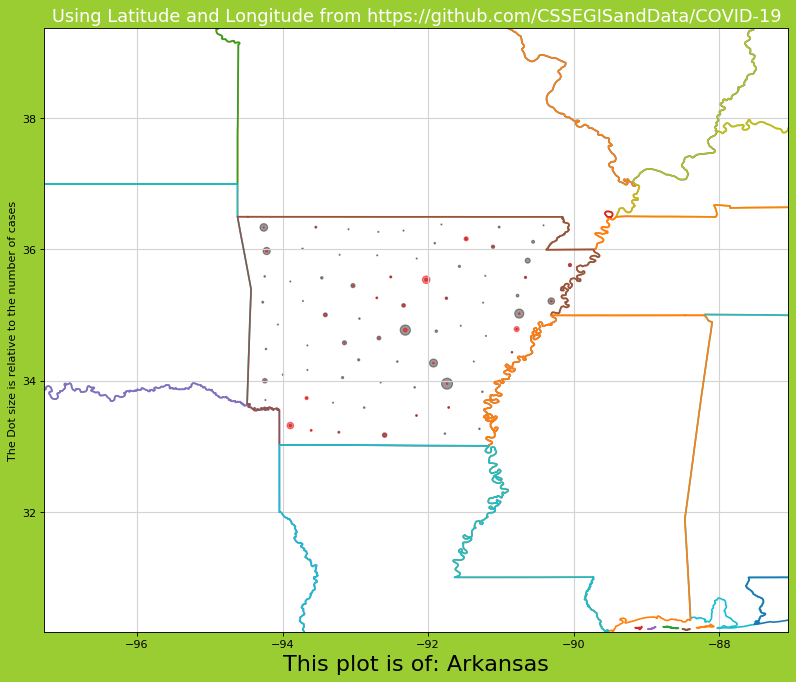

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import shapefile as shp
DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
LATd =[]
LONd =[]
cases = []
deaths = []
STate = input("What State? ")
for lines in DataIn:
    lines = lines.replace("\n","")

    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<2:
            print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
        if int(line[8])>0:
            deaths.append(int(line[8]))
            LATd.append(line[5]) 
            LONd.append(line[6])
LA = LAT
LO = LON
LAd = LATd
LOd = LONd
               
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)
               
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONd,dtype=np.float)               
               
fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='yellowgreen')
ax = fig.gca()
ax.set_facecolor(('white'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

lgmin= (min(LG))+5
lgmax= (max(LG))-5
ltmin= (min(LT))+5
ltmax= (max(LT))-5
#SHAPEfile = "ShapeFile/cb_2015_us_county_500k"
#SHAPEfile = "ShapeFiles/tl_2010_us_state10"
SHAPEfile = "ShapeFiles/st99_d00"
sf = shp.Reader(SHAPEfile)
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
print(min(LG)-3)
print(max(LG)+3)
print(min(LT)-3)
print(max(LT)+3)
print([-90,-75,23,32])


a=min(LG)-3
b=max(LG)+3
c=min(LT)-3
d=max(LT)+3

'''
-87.37284571
-80.43109784
25.20904673
30.86747479
[-90, -75, 23, 32]
'''

plt.axis([a,b,c,d])

#plt.axis([-90,-75,23,32])

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black", alpha=.4)
plt.scatter(LGd, LTd, s=s, color="red", alpha=.5)               
plt.grid(True)
#plt.text(50,50, "Verticle lines are Longitude, Horizontal lines are Latitude")
text = (50,50, "Verticle lines are Longitude, Horizontal lines are Latitude")
plt.xlabel('This plot is of: '+STate, fontsize=20)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19', fontsize=16, color="white")
plt.ylabel('The Dot size is relative to the number of cases')
plt.show()

In [5]:
print (min(cases))
print(max(cases))

1
975


In [6]:
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-09-2020.csv"
DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
for lines in DataIn:
    lines = lines.replace("\n","")
    #if cnt<10:print (lines)
    line = lines.split(",")
    if "US" in line[3]:
        cnt=cnt+1
        if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
print(cnt)            

Abbeville South Carolina US 2020-05-30 02:32:48 34.22333378 -82.46170658 39 0
Acadia Louisiana US 2020-05-30 02:32:48 30.2950649 -92.41419698 401 23
Accomack Virginia US 2020-05-30 02:32:48 37.76707161 -75.63234615 827 12
Ada Idaho US 2020-05-30 02:32:48 43.4526575 -116.24155159999998 803 22
Adair Iowa US 2020-05-30 02:32:48 41.33075609 -94.47105874 9 0
3025


In [7]:
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-09-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
latNlongNcases=[]
longitude = ""
cnt=0
for line in DataIn:
    line=line.split(",")
    if 'US' in line[3] and "Recovered" not in line:
        cnt=cnt+1
        if "-" not in line[5] and len(line[5])>5 and "-" in line[6] and len(line[6])>5 and int(line[7])>0:    
            text = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            TExt =text.split(" ")
            if len(TExt)==16:TExt = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
   
            STATES.append(TExt)
            LAT.append(line[5])
            LONG.append(line[6])
            cases.append(line[7])
            deaths.append(line[8])
            longitude = longitude+line[6]+","
            latNlongNcases.append(TExt)
print("len(STATES)",len(STATES)) 

LA = LAT[:-7]
LO = LONG[:-7]
print("len(LA)",len(LA))
print("len(LO)",len(LO))
print("len(latNlongNcases)",len(latNlongNcases))

Abbeville South Carolina US 2020-05-30 02:32:48 34.22333378 -82.46170658 39 0
Acadia Louisiana US 2020-05-30 02:32:48 30.2950649 -92.41419698 401 23
Accomack Virginia US 2020-05-30 02:32:48 37.76707161 -75.63234615 827 12
Ada Idaho US 2020-05-30 02:32:48 43.4526575 -116.24155159999998 803 22
len(STATES) 2940
len(LA) 2933
len(LO) 2933
len(latNlongNcases) 2940


69.31479216
18.2208
-64.8963
-164.0353804


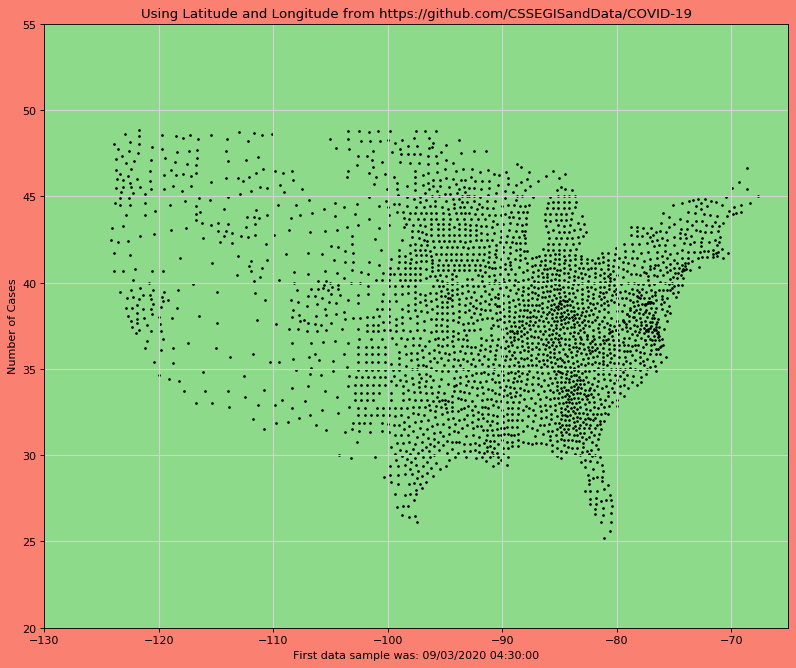

In [8]:
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=2, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

69.31479216
18.2208
-64.8963
-164.0353804


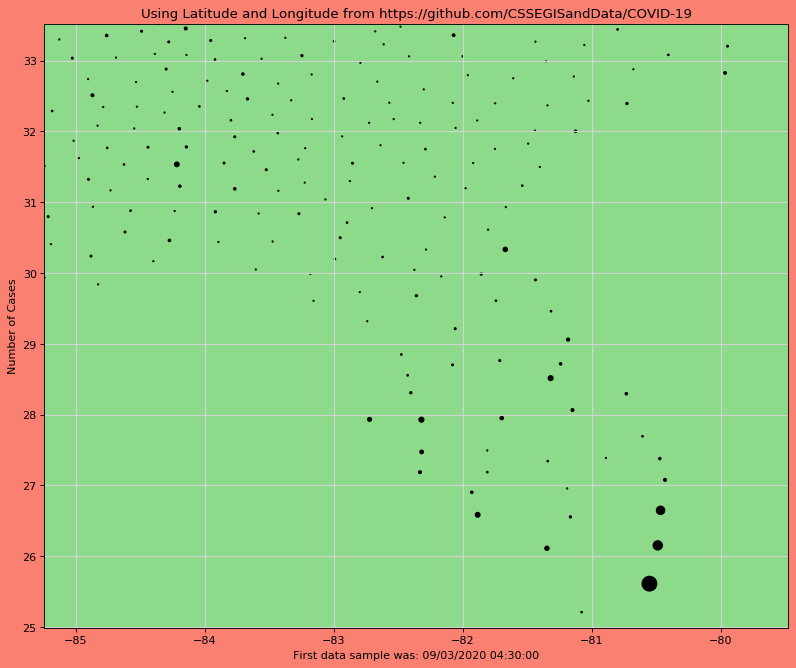

In [9]:
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

plt.axis([-85.243753, -79.473390, 24.988049, 33.518900])
 
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.01)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)
 



#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

Abbeville South Carolina US 2020-05-30 02:32:48 34.22333378 -82.46170658 39 0
Acadia Louisiana US 2020-05-30 02:32:48 30.2950649 -92.41419698 401 23
Accomack Virginia US 2020-05-30 02:32:48 37.76707161 -75.63234615 827 12
Ada Idaho US 2020-05-30 02:32:48 43.4526575 -116.24155159999998 803 22
len(STATES) 2940
len(LA) 2933
len(LO) 2933
len(latNlongNcases) 2940
69.31479216
18.2208
-64.8963
-164.0353804


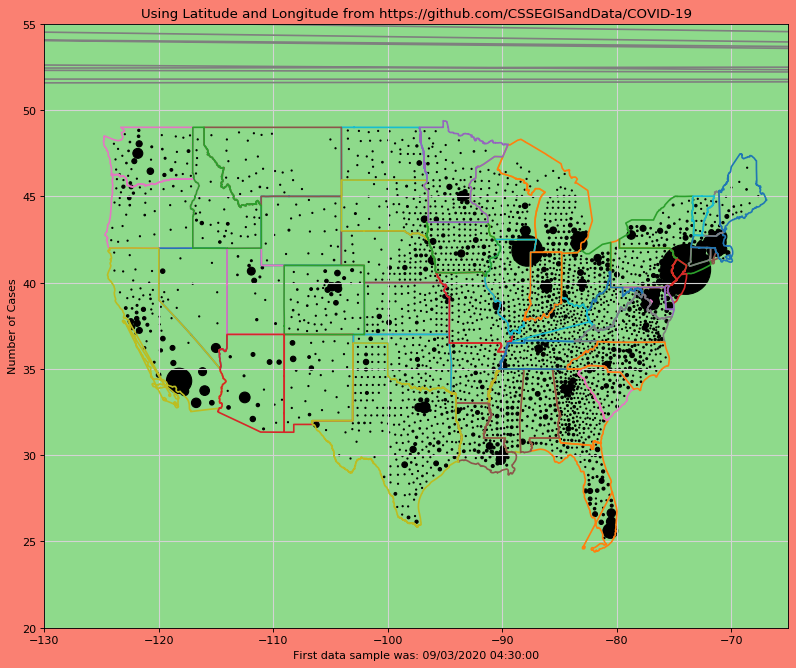

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import shapefile as shp
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-09-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
latNlongNcases=[]
longitude = ""
cnt=0
for line in DataIn:
    line=line.split(",")
    if 'US' in line[3] and "Recovered" not in line:
        cnt=cnt+1
        if "-" not in line[5] and len(line[5])>5 and "-" in line[6] and len(line[6])>5 and int(line[7])>0:    
            text = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            Text =text.split(" ")
            if len(Text)==16:TExt = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
   
            STATES.append(TExt)
            LAT.append(line[5])
            LONG.append(line[6])
            cases.append(line[7])
            longitude = longitude+line[6]+","
            latNlongNcases.append(TExt)
print("len(STATES)",len(STATES)) 

LA = LAT[:-7]
LO = LONG[:-7]
print("len(LA)",len(LA))
print("len(LO)",len(LO))
print("len(latNlongNcases)",len(latNlongNcases))

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.01)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)
sf = shp.Reader("ShapeFiles/tl_2010_us_state10")
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)






plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

Abbeville South Carolina US 2020-05-30 02:32:48 34.22333378 -82.46170658 39 0
Acadia Louisiana US 2020-05-30 02:32:48 30.2950649 -92.41419698 401 23
Accomack Virginia US 2020-05-30 02:32:48 37.76707161 -75.63234615 827 12
Ada Idaho US 2020-05-30 02:32:48 43.4526575 -116.24155159999998 803 22


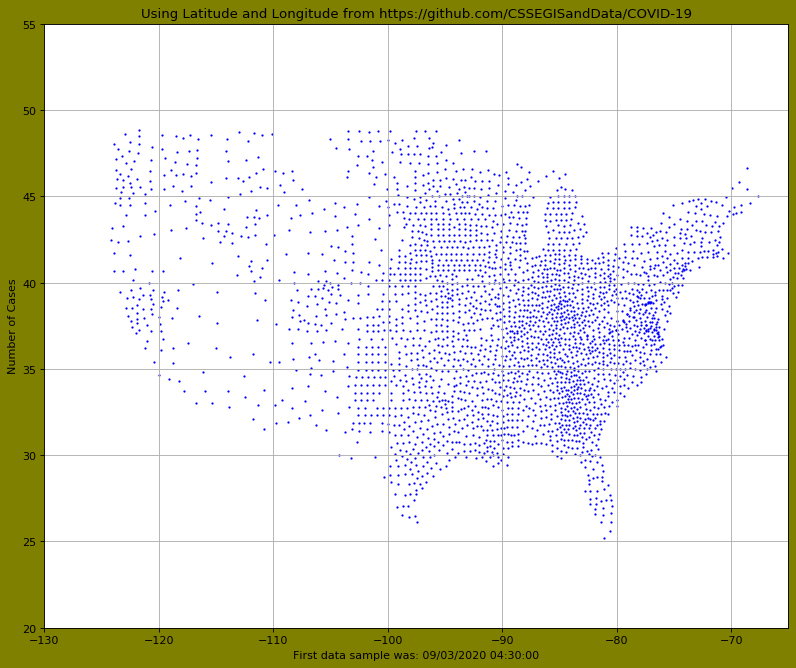

In [13]:

DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
latNlongNcases=[]
longitude = ""
cnt=0
for line in DataIn:
    line=line.split(",")
    if 'US' in line[3] and "Recovered" not in line:
        cnt=cnt+1
        if "-" not in line[5] and len(line[5])>5 and "-" in line[6] and len(line[6])>5 and int(line[7])>0:    
            text = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            Text =text.split(" ")
            if len(Text)==16:TExt = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
   
            STATES.append(TExt)
            LAT.append(line[5])
            LONG.append(line[6])
            cases.append(line[7])
            longitude = longitude+line[6]+","
            latNlongNcases.append(TExt)

LA = LAT[:-7]
LO = LONG[:-7]

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)

ffig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='olive')
ax = fig.gca()


plt.axis([-130,-65,20,55])
ax.grid(color='blue', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=1, color="blue")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

Abbeville South Carolina US 2020-05-30 02:32:48 34.22333378 -82.46170658 39 0
Acadia Louisiana US 2020-05-30 02:32:48 30.2950649 -92.41419698 401 23
Accomack Virginia US 2020-05-30 02:32:48 37.76707161 -75.63234615 827 12
Ada Idaho US 2020-05-30 02:32:48 43.4526575 -116.24155159999998 803 22
len(STATES) 2940
len(LA) 2933
len(LO) 2933
len(latNlongNcases) 2940
69.31479216
18.2208
-64.8963
-164.0353804


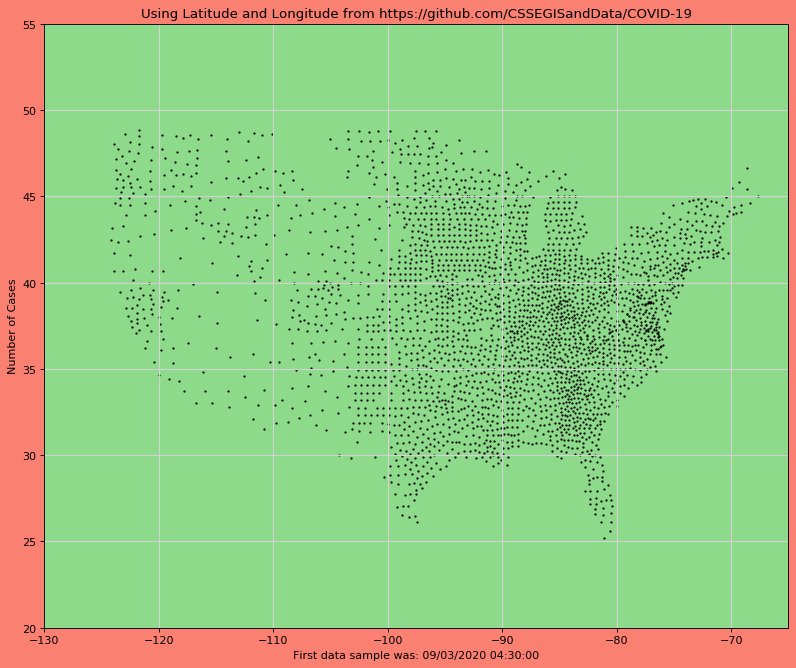

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import time

DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
latNlongNcases=[]
longitude = ""
cnt=0
for line in DataIn:
    line=line.split(",")
    if 'US' in line[3] and "Recovered" not in line:
        cnt=cnt+1
        if "-" not in line[5] and len(line[5])>5 and "-" in line[6] and len(line[6])>5 and int(line[7])>0:    
            text = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            Text =text.split(" ")
            if len(Text)==16:TExt = str(line[1]+' '+line[2]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7])
            if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
   
            STATES.append(TExt)
            LAT.append(line[5])
            LONG.append(line[6])
            cases.append(line[7])
            longitude = longitude+line[6]+","
            latNlongNcases.append(TExt)
print("len(STATES)",len(STATES)) 

LA = LAT[:-7]
LO = LONG[:-7]
print("len(LA)",len(LA))
print("len(LO)",len(LO))
print("len(latNlongNcases)",len(latNlongNcases))

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
#ax.set_facecolor(('white'))
plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=1, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()


Alachua Florida US 2020-05-30 02:32:48 29.67866525 -82.35928158 378 7
Baker Florida US 2020-05-30 02:32:48 30.33060121 -82.28467476 28 3
Bay Florida US 2020-05-30 02:32:48 30.26548745 -85.62122584 98 3
Bradford Florida US 2020-05-30 02:32:48 29.95079741 -82.16611613 51 2
Brevard Florida US 2020-05-30 02:32:48 28.29409504 -80.73091022 409 12
len(LA) 67
len(LO) 67
max(LT) 30.86747479
min(LT) 25.20904673
max(LG) -80.43109784
min(LG) -87.37284571
len(LT) 67
len(LG) 67
-87.37284571
-80.43109784
25.20904673
30.86747479


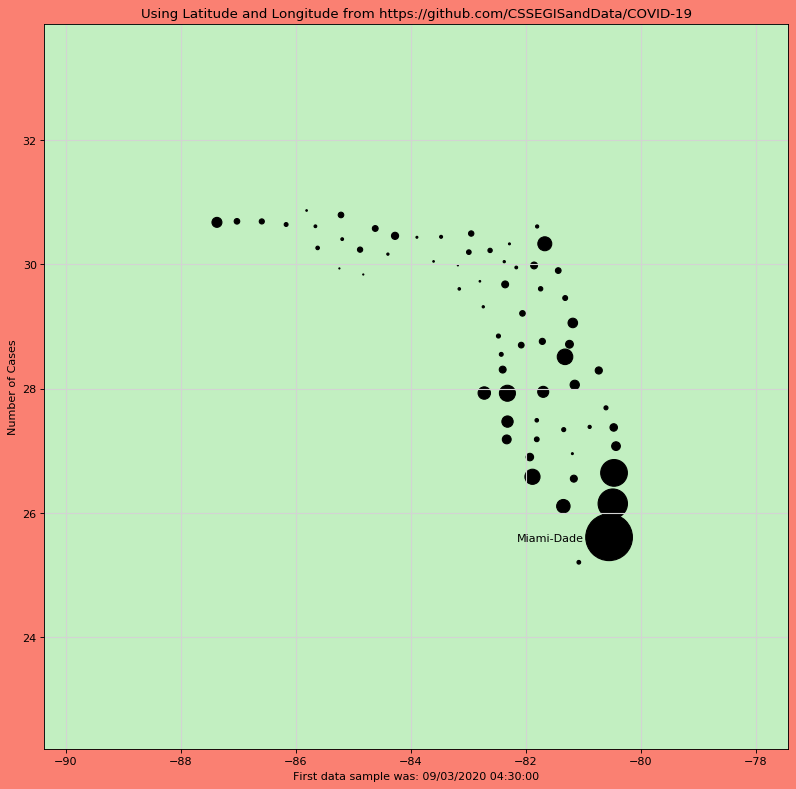

In [15]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import numpy as np
DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
#STate = input("What State? ")
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")

    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON

print("len(LA)",len(LA))
print("len(LO)",len(LO))
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)
print ("max(LT)",max(LT))
print ("min(LT)",min(LT))
print ('max(LG)',max(LG))
print ('min(LG)',min(LG))
print('len(LT)',len(LT))
print('len(LG)',len(LG))

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

print (min(LG))
print (max(LG))
print (min(LT))
print (max(LT))


longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= 'Miami-Dade'
text(0.68, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#if float(line[6])<=-87 and float(line[6])>=-89:
#                if float(line[5])>42 and float(line[5])<44:
#font="/home/jack/fonts/DancingScript-Bold.ttf"
#-90 and float(line[6])>-92 and float(line[5])<40 and float(line[5])<42
#plt.axis([-100,-70,30,45])
plt.axis([longLeft,longRight,lat1,lat2])
#plt.axis([-80,-90,40,45])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)
#plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
#text(20, 40, r'$\cos(2 \pi t) \exp(-t)$')
plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [16]:
LA = LAT
LO = LONG
print(len(LA))
print(len(LO))


67
2940


In [17]:
for lo in LO:
    if float(lo)<40:
        print(lo)

-82.46170658
-92.41419698
-75.63234615
-116.24155159999998
-94.47105874
-85.28129668
-92.60078167
-94.65859267
-104.3362578
-116.4545247
-91.18786813
-84.93671406
-94.69932645
-91.35326037
-98.50117804
-83.4718964
-77.21610347
-118.5601734
-89.76782777
-73.14130877
-81.63645384
-93.4116826
-82.35928158
-79.39976137
-121.8929271
-105.7885451
-73.97723916
-105.7235415
-78.55481085
-83.59507875
-88.57996173
-89.32910838
-81.17751948
-77.08183073
-98.32408495
-91.37860922
-85.89102866
-78.69280486
-78.02750466
-81.12857041
-80.00222498
-79.98167747
-85.06800636
-95.30030847
-86.19457544
-92.82442028
-84.10802343
-81.35321066
-83.62212411
-119.8223594
-120.65696
-77.98584649
-79.14548696
-90.80501621
-149.14269860000005
-95.29272815
-84.99171713
-82.63959517
-84.19965764
-95.65354823
-94.80163024
-102.6376548
-70.20380627
-94.60901487
-76.60329337
-93.24604565
-80.09953279
-98.0666283
-85.15503082
-109.4892383
-92.86865906
-82.28909114
-78.81340003
-96.9995047
-104.3353617
-98.68754589
-107

-122.0396884
-88.76443896
-95.7557264
-87.94579284
-86.66232561
-88.80611122
-85.79158570000001
-95.31015553
-85.194223
-92.07634971
-84.20258189
-89.89692423
-94.14550696
-78.56813762
-93.77617511
-100.4418259
-106.8862389
-101.7197624
-98.97588642
-120.6827834
-101.8933156
-84.14585902
-94.23164924
-120.52007009999998
-107.1925893
-112.6620092
-86.58047435
-89.91716179
-96.1767568
-101.0440149
-122.5407434
-135.3206587
-121.766131
-121.9164403
-103.4601547
-98.78566062
-89.50644846
-85.95411046
-95.2717568
-81.53344948
-121.7170703
-77.06840691
-106.9298354
-121.9357113
-69.95995554
-75.75118623
-74.61683016
-79.02699593
-122.8862506
-77.10642712
-143.2127643
-110.7013958
-111.4418764
-84.28013991
-81.99225984
-87.0079644
-85.32749335
-98.34626602
-117.4046494
-77.655399
-89.51887093
-90.35555967
-90.66662425
-86.31029372
-89.93063427
-82.67937954
-93.77631447
-92.45000068
-90.74828138
-90.47598685
-90.71013176
-90.80212061
-90.4753503
-81.43589967
-86.29040834
-85.52797979
-92.00135

In [18]:
import numpy as np
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

la = np.array(LA).astype(np.float)
cl = reject_outliers(la, m=3)

lo = np.array(LO).astype(np.float)
clo = reject_outliers(lo, m=1)

print(len(cl))
print(len(clo))


67
2212


In [19]:
print (min(LG))
print (max(LG))
print (min(LT))
print (max(LT))

-87.37284571
-80.43109784
25.20904673
30.86747479


In [20]:
!ls csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

ls: cannot access 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv': No such file or directory


# SEARCH by Country

# Example California
### Some data by cities
<a id = "California">*</a><br />
<a href="#home">HOME</a></a><br />

In [21]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_time_series/

Errata.csv
Philippines.data
README.md
time_series_covid19_confirmed_global.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_recovered_global.csv


In [22]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import numpy as np
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
SEARCH = "California"
cnt = 0
PHcases = [] 
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    line=line.lstrip(" ")
    if SEARCH in line:
        print(line[23:])
        entries = line[23:].split(",")
        for entry in entries:
            print (entry, end= " ")
            #PHcases.append(int(entry))

1.0,Alameda,California,US,37.64629437,-121.8929271,"Alameda, California, US",1671329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,4,4,4,6,7,7,7,8,12,12,12,13,15,16,16,20,21,23,23,23,36,39,40,41,42,42,43,43,46,48,52,52,52,55,57,60,62,63,63,63,66,66,67,70,71,71,71,74,76,79,83,83,83,83,86,88,90,90,92,93,93,93,93,94,95

1.0 Alameda California US 37.64629437 -121.8929271 "Alameda  California  US" 1671329 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 4 4 4 6 7 7 7 8 12 12 12 13 15 16 16 20 21 23 23 23 36 39 40 41 42 42 43 43 46 48 52 52 52 55 57 60 62 63 63 63 66 66 67 70 71 71 71 74 76 79 83 83 83 83 86 88 90 90 92 93 93 93 93 94 95
 3.0,Alpine,California,US,38.59678594,-119.8223594,"Alpine, California, US",1129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

5.0 Lassen California US 40.67311306 -120.59350990000002 "Lassen  California  US" 30573 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 7.0,Los Angeles,California,US,34.30828379,-118.2282411,"Los Angeles, California, US",10039107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,5,7,11,13,21,26,26,32,44,54,64,78,89,93,132,147,169,198,223,242,244,269,322,360,405,457,497,576,600,619,663,732,797,850,895,916,944,1002,1056,1111,1174,1209,1231,1257,1315,1369,1418,1470,1515,1531,1570,1616,1660,1711,1753,1793,1821,1840,1913,1973,2016,2053,2092,2106,2116,2145,2201,2241,2294

7.0 Los Angeles California US 34.30828379 -118.2282411 "Los Angeles  California  US" 10039107 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

3.0 Plumas California US 40.00355989 -120.8395236 "Plumas  California  US" 18807 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 5.0,Riverside,California,US,33.74314981,-115.9933578,"Riverside, California, US",2470546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,4,4,6,6,6,7,8,8,8,8,9,13,13,14,14,15,19,25,28,32,33,39,41,41,41,50,50,54,69,69,75,85,85,93,100,112,112,118,141,141,143,149,156,156,161,181,184,186,192,192,204,204,217,225,225,235,242,242,242,261,270,270,284,290,290,290,292,303,303,313,323

5.0 Riverside California US 33.74314981 -115.9933578 "Riverside  California  US" 2470546 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 4 4 6 6 6 

7.0 Santa Cruz California US 37.05580291 -122.0066524 "Santa Cruz  California  US" 273213 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 9.0,Shasta,California,US,40.76391419,-122.0396884,"Shasta, California, US",180080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4

9.0 Shasta California US 40.76391419 -122.0396884 "Shasta  California  US" 180080 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

 3.0,Yolo,California,US,38.68278902,-121.9018288,"Yolo, California, US",220500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,4,4,7,7,8,8,9,10,10,12,13,13,13,14,16,16,16,16,16,17,19,19,20,20,20,20,20,20,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23

3.0 Yolo California US 38.68278902 -121.9018288 "Yolo  California  US" 220500 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 3 3 3 4 4 7 7 8 8 9 10 10 12 13 13 13 14 16 16 16 16 16 17 19 19 20 20 20 20 20 20 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 23 23
 5.0,Yuba,California,US,39.26255932,-121.3535644,"Yuba, California, US",78668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,

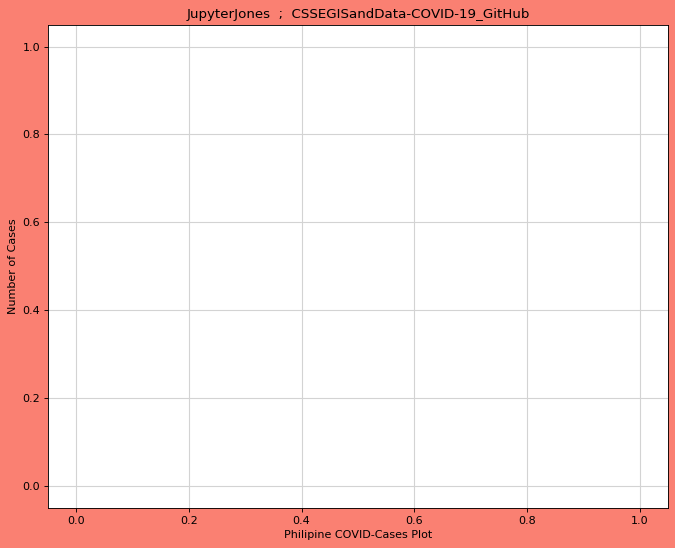

In [23]:
y=len(PHcases)
Y= range(0,y)
V = np.array(Y)
H = np.array(PHcases)

fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

S=1
Size=[]
for x in PHcases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)


ax.grid(color='lightgray', linestyle='-', linewidth=1)
#plt.scatter(V, H, s=s)
plt.scatter(V, H, s=s)
plt.grid(True)

plt.xlabel('Philipine COVID-Cases Plot')
plt.title('JupyterJones  ;  CSSEGISandData-COVID-19_GitHub')
plt.ylabel('Number of Cases')
plt.show()

# Query the data by location

In [27]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=PHcases))
fig.add_trace(go.Bar(y=PHcases))
fig.update_layout(title = 'Philippines Confirmed Cases')
fig.show()

In [28]:
print(PHcases) 

[]


In [ ]:
import numpy as np
x = np.asarray(PHcases)
print("-----------------")
print (len(x))
print("-----------------")
cntTOTAL = range(0,len(x))
print (cntTOTAL)
y = np.asarray(cntTOTAL)
print("-----------------")   
for num in cntTOTAL:
    print (num, end=" ")
print("\n-----------------")    
print (y) 
print("\n------- These bottom two number must match ----------")   
print("How many numbers to use for x co-ordinates: ",len(x))
print("How many numbers to use for y co-ordinates: ",len(y))

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import numpy as np
#LASTFILE="csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
SEARCH = "Philippine"
cnt = 0
PHcases = [] 
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print(line[23:])
        entries = line[23:].split(",")
        for entry in entries:
            print (entry, end= " ")
            PHcases.append(int(entry))


y=len(PHcases)
Y= range(0,y)
V = np.array(Y)
fig = go.Figure()
#fig.add_trace(go.Scatter(y=PHcases))
fig.add_trace(go.Bar(y=PHcases))
fig.update_layout(title = 'Plotly Bar Graph of Philippine Confirmed COVID-19 Cases')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=PHcases))
fig.add_trace(go.Bar(y=PHcases))
fig.update_layout(title = 'Philippine Confirmed COVID-19 Cases')
fig.show()

0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,6,10,20,33,49,52,64,111,140,142,187,202,217,230,307,380,462,552,636,707,803,1075,1418,1546,2084,2311,2633,3018,3094,3246,3660,3764,3870,4076,4195,4428,4648,4932,5223,5453,5660,5878,6087,6259,6459,6599,6710,6981,7192,7294,7579,7777,7958,8212,8488,8772,8928,9223,9485,9684,10004,10343,10463,10610,10794,11086,11350,11618,11876,12091,12305,12513,12718,12942,13221,13434,13597,13777,14035

0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 6 10 20 33 49 52 64 111 140 142 187 202 217 230 307 380 462 552 636 707 803 1075 1418 1546 2084 2311 2633 3018 3094 3246 3660 3764 3870 4076 4195 4428 4648 4932 5223 5453 5660 5878 6087 6259 6459 6599 6710 6981 7192 7294 7579 7777 7958 8212 8488 8772 8928 9223 9485 9684 10004 10343 10463 10610 10794 11086 11350 11618 11876 12091 12305 12513 12718 12942 13221 13434 13597 13777 14035
 

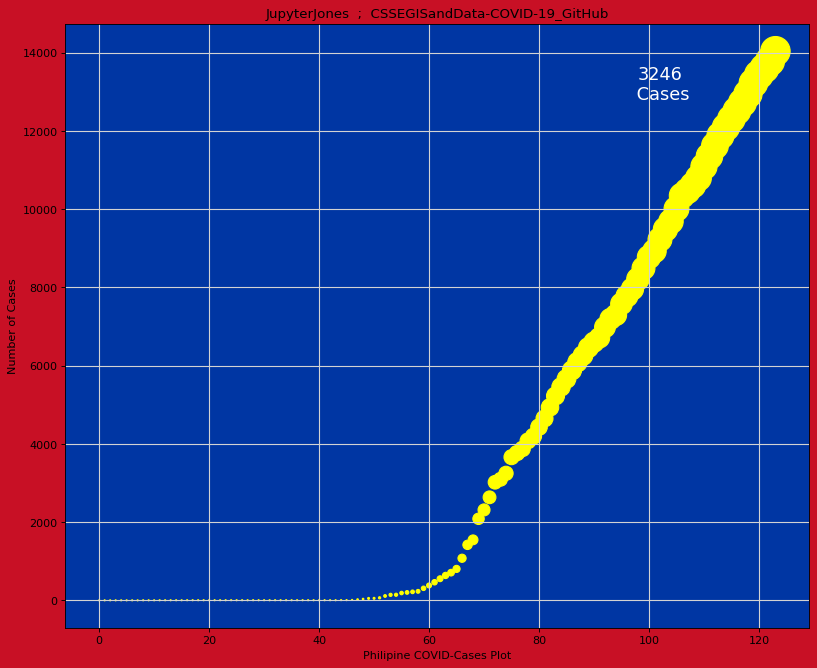

In [30]:
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
SEARCH = "Philippine"
cnt = 0
PHcases = [] 
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print(line[23:])
        entries = line[23:].split(",")
        for entry in entries:
            print (entry, end= " ")
            PHcases.append(int(entry))


y=len(PHcases)
Y= range(0,y)
V = np.array(Y)
H = np.array(PHcases)

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='#c81025')
#fig = plt.figure()
ax = fig.gca()

T= '3246\n Cases'
text(0.8, 0.9, T, fontsize= 16, color="white", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.set_facecolor(('#0036a3'))

S=1
Size=[]
for x in PHcases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(V, H, s=s, color="Yellow")
plt.grid(True)

plt.xlabel('Philipine COVID-Cases Plot')
plt.title('JupyterJones  ;  CSSEGISandData-COVID-19_GitHub')
plt.ylabel('Number of Cases')
plt.show()

# Query the data by location            

SEARCH: Brazil
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 4 4 13 13 20 25 31 38 52 151 151 162 200 321 372 621 793 1021 1546 1924 2247 2554 2985 3417 3904 4256 4579 5717 6836 8044 9056 10360 11130 12161 14034 16170 18092 19638 20727 22192 23430 25262 28320 30425 33682 36658 38654 40743 43079 45757 50036 54043 59324 63100 67446 73235 79685 87187 92202 97100 101826 108620 115455 126611 135773 146894 156061 162699 169594 178214 190137 203165 220291 233511 241080 255368 271885 291579 310087 330890 347398 

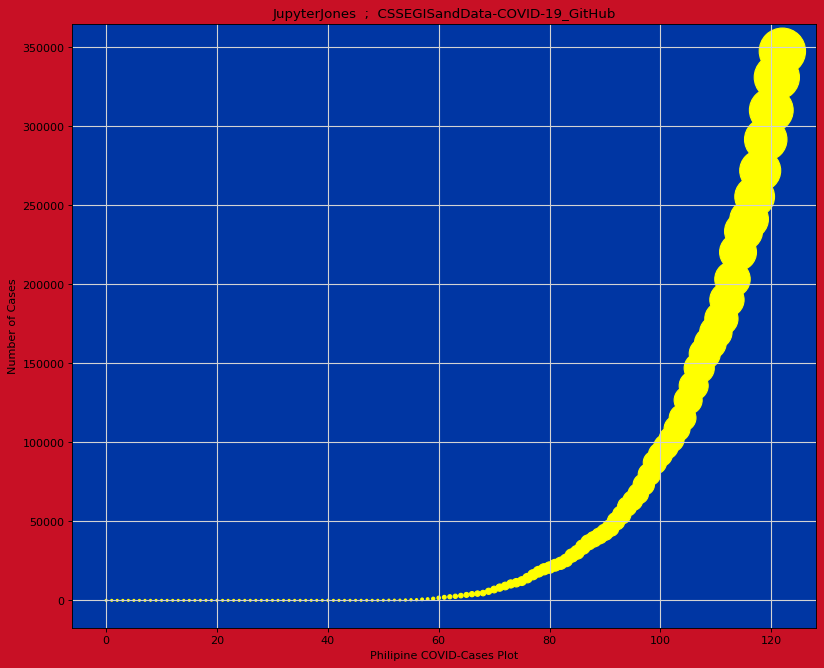

In [34]:
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
SEARCH = input("SEARCH: ")
#SEARCH = "Mexico"
cnt = 0
PHcases = [] 
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        #print(line[23:])
        entries = line[23:].split(",")
        for entry in entries:
            if entry.isdigit(): 
                print (entry, end= " ")
                PHcases.append(int(entry))


y=len(PHcases)
Y= range(0,y)
V = np.array(Y)
H = np.array(PHcases)


fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='#c81025')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#0036a3'))

S=1
Size=[]
for x in PHcases:
    S=3+(float(x)*.005)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)


ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(V, H, s=s, color="Yellow")
plt.grid(True)

plt.xlabel('Philipine COVID-Cases Plot')
plt.title('JupyterJones  ;  CSSEGISandData-COVID-19_GitHub')
plt.ylabel('Number of Cases')
plt.show()

# Query the data by location            

63 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 5 8 10 14 17 20 25 27 33 39 39 44 48 48 48 49 51 54 56 61 70 88 123 164 218 330 424 482 621 803 1012 1231 1572 1838 2144 2456 2948 3382 3772 4186 4689 4998 5416 5913 6462 7103 7667 8238 8790 9455 10143 10929 11719 12425 13134 13770 14657 15691 16660 17822 18863 20065 20995 22268 23870 25121 26738 28511 30205 32078 

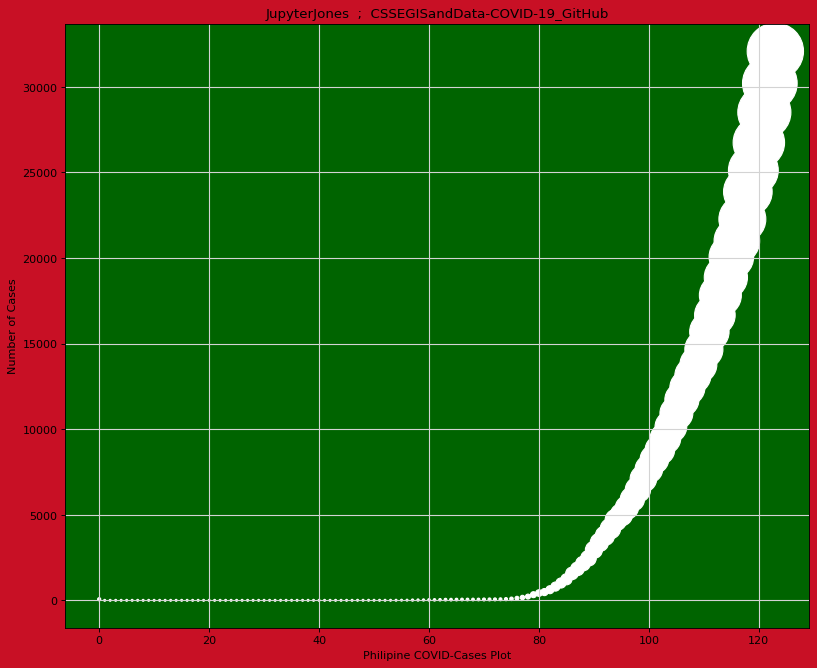

In [35]:
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
#SEARCH = "Mexico"
SEARCH = "Bangladesh"
cnt = 0
PHcases = [] 
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        #print(line[23:])
        entries = line[23:].split(",")
        for entry in entries:
            if entry.isdigit(): 
                print (entry, end= " ")
                PHcases.append(int(entry))


y=len(PHcases)
Y= range(0,y)
V = np.array(Y)
H = np.array(PHcases)


fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='#c81025')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('DarkGreen'))

S=1
Size=[]
for x in PHcases:
    S=3+(float(x)*.08)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)


ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(V, H, s=s, color="white")
plt.grid(True)

plt.xlabel('Philipine COVID-Cases Plot')
plt.title('JupyterJones  ;  CSSEGISandData-COVID-19_GitHub')
plt.ylabel('Number of Cases')
plt.show()

# Query the data by location            

In [36]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
SEARCH = "Philippine"
PHcases = ''
PHdeaths = ''
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("Cases: ",line)
        PHcases=PHcases+line   
        
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("Deaths: ",line)        
        PHdeaths=PHdeaths+line 
        
        


Cases:  Philippines,13.0,122.0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,6,10,20,33,49,52,64,111,140,142,187,202,217,230,307,380,462,552,636,707,803,1075,1418,1546,2084,2311,2633,3018,3094,3246,3660,3764,3870,4076,4195,4428,4648,4932,5223,5453,5660,5878,6087,6259,6459,6599,6710,6981,7192,7294,7579,7777,7958,8212,8488,8772,8928,9223,9485,9684,10004,10343,10463,10610,10794,11086,11350,11618,11876,12091,12305,12513,12718,12942,13221,13434,13597,13777,14035

Deaths:  Philippines,13.0,122.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,8,11,12,12,19,17,18,19,25,33,35,38,45,54,68,71,78,88,96,107,136,144,152,163,177,182,203,221,247,297,315,335,349,362,387,397,409,428,437,446,462,477,494,501,511,530,558,568,579,603,607,623,637,658,685,696,704,719,726,751,772,790,806,817,824,831,837,842,846,857,863,868



In [37]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
#SEARCH = "Canada"
SEARCH = "Philippine"
PHcases = ""
PHdeaths = ""
Pc =[]
Pd =[]
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("PHcases: ",line)
        PHcases=PHcases+line
        print("len(PHcases)",len(line))

print("\n---------------------------------------------\n")
        
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("PHdeaths: ",line)
        PHdeaths=PHdeaths+line
        print("len(PHdeaths)",len(line))
        
for entry in PHcases.split(","):
    Pc.append(entry)
print("len(Pc)",len(Pc))    

for entry in PHdeaths.split(","):
    Pd.append(entry)
print("len(Pd)",len(Pd))    

        
     

PHcases:  Philippines,13.0,122.0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,6,10,20,33,49,52,64,111,140,142,187,202,217,230,307,380,462,552,636,707,803,1075,1418,1546,2084,2311,2633,3018,3094,3246,3660,3764,3870,4076,4195,4428,4648,4932,5223,5453,5660,5878,6087,6259,6459,6599,6710,6981,7192,7294,7579,7777,7958,8212,8488,8772,8928,9223,9485,9684,10004,10343,10463,10610,10794,11086,11350,11618,11876,12091,12305,12513,12718,12942,13221,13434,13597,13777,14035

len(PHcases) 498

---------------------------------------------

PHdeaths:  Philippines,13.0,122.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,8,11,12,12,19,17,18,19,25,33,35,38,45,54,68,71,78,88,96,107,136,144,152,163,177,182,203,221,247,297,315,335,349,362,387,397,409,428,437,446,462,477,494,501,511,530,558,568,579,603,607,623,637,658,685,696,704,719,726,751,772,790,806,817,824,831,837,842,846,857,863,868

len(PHdeaths) 395
l

In [38]:
line="""Recovered,Canada,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n"""
END=len(line.split(","))
print (END)
Data=line.split(",")
print (Data)
print("\n-----  Data[:-1]  ------ Minus the \\n  ----------------")
print (Data[:-1])
print("\n---------------------------")
# Remove 'Recovered', 'Canada' and Minus the \n
print (Data[2:-1])


79
['Recovered', 'Canada', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']

-----  Data[:-1]  ------ Minus the \n  ----------------
['Recovered', 'Canada', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

---------------------------
['0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

PHcases:  Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,6,6,11,15,18,20,20,22,25,28,29,34,36,41,42,74,79,104,177,185,221,257,308,377,425,503,588,688,858,994,1144,1355,1706,1966,2392,2793,3255,3630,4354,4347,4726,5276,5759,6237,6648,7049,7470,7953,8447,9840,10456,11013,11561,12063,12715,13718,14068,14550,15012,15568,15970,16500,16978,17395,17880,18321,18574,19097,19468,19910,20388,20826,21148,21469,21817,22158,22516,22865,23258,23645,23974,24286,24755,25197,25595,26085,26560,26897

len(PHcases) 533

---------------------------------------------

PHdeaths:  Ontario,Canada,51.2538,-85.3232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,5,6,7,8,13,18,18,21,31,33,37,53,67,94,119,150,153,153,200,222,253,274,291,334,385,490,524,564,591,624,694,762,806,862,916,960,1023,1072,1153,1205,1265,1292,1326,1446,1505,1560,1607,1665,1726,1751,1788,1852,1883,1915,1939,1976,19

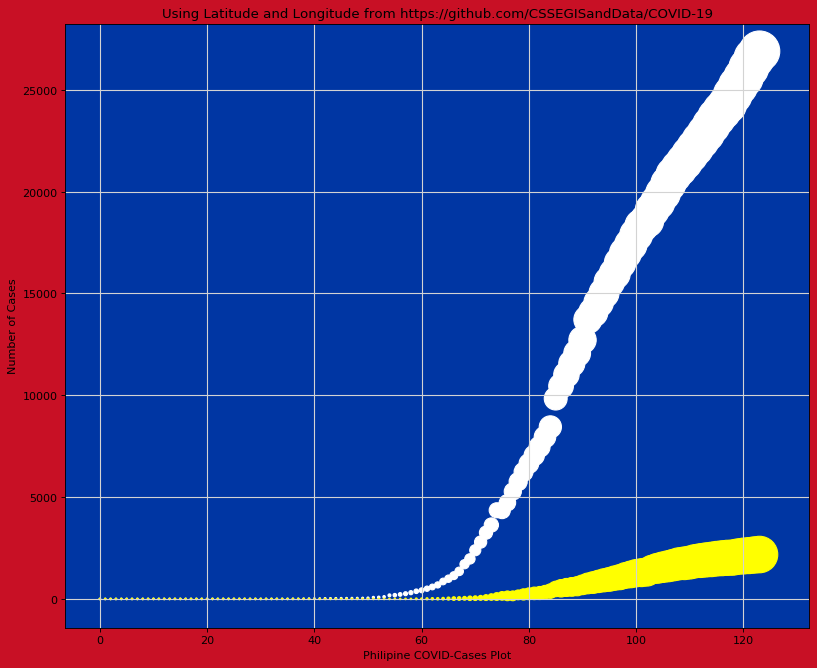

In [39]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
#SEARCH = "Canada"
SEARCH = "Ontario"
PHcases = ""
PHdeaths = ""
Pc =[]
Pd =[]
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("PHcases: ",line)
        PHcases=PHcases+line
        print("len(PHcases)",len(line))

print("\n---------------------------------------------\n")
        
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:
        print("PHdeaths: ",line)
        PHdeaths=PHdeaths+line
        print("len(PHdeaths)",len(line))
        
PHcases=PHcases[32:-1]
for entry in PHcases.split(","):
    Pc.append(int(entry))
print("len(Pc)",len(Pc))
print("Pc",Pc)

PHdeaths=PHdeaths[32:-1]
for entry in PHdeaths.split(","):
    Pd.append(int(entry))
print("len(Pd)",len(Pd))    
print("Pd",Pd)

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='#c81025')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#0036a3'))


x=range(0,len(Pc))
print (len(x))

X = np.array(Pc)
Y = np.array(Pd)


SizeC=[]
SizeC.append(2)
for sizec in X:
    Sc=2+(float(sizec))*.05
    SizeC.append(int(Sc))

SizeD=[]
SizeD.append(2)
for sized in Y:
    Sd=2+(float(sized))*.5
    SizeD.append(int(Sd))    
    

sc = np.array(SizeC)
sd = np.array(SizeD)

ax.grid(color='lightgray', linestyle='-', linewidth=1)
#plt.scatter(Y, X, s=s, color="white")
plt.scatter(x, X, s=sc, color="white")
plt.scatter(x, Y, s=sd, color="Yellow")
plt.grid(True)

plt.xlabel('Philipine COVID-Cases Plot')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [40]:
print(Pc)
print(Pd)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 6, 11, 15, 18, 20, 20, 22, 25, 28, 29, 34, 36, 41, 42, 74, 79, 104, 177, 185, 221, 257, 308, 377, 425, 503, 588, 688, 858, 994, 1144, 1355, 1706, 1966, 2392, 2793, 3255, 3630, 4354, 4347, 4726, 5276, 5759, 6237, 6648, 7049, 7470, 7953, 8447, 9840, 10456, 11013, 11561, 12063, 12715, 13718, 14068, 14550, 15012, 15568, 15970, 16500, 16978, 17395, 17880, 18321, 18574, 19097, 19468, 19910, 20388, 20826, 21148, 21469, 21817, 22158, 22516, 22865, 23258, 23645, 23974, 24286, 24755, 25197, 25595, 26085, 26560, 26897]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 5, 6, 7, 8, 13, 18, 18, 21, 31, 33, 37, 53, 67, 94, 119, 150, 153, 153, 200, 222, 253, 274, 291, 334, 385, 490, 524, 564, 591, 624, 694, 762, 806, 862, 916, 960, 1023, 1072, 1153, 1205, 1265, 1

In [41]:
print(PHcases[32:])

3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,6,6,11,15,18,20,20,22,25,28,29,34,36,41,42,74,79,104,177,185,221,257,308,377,425,503,588,688,858,994,1144,1355,1706,1966,2392,2793,3255,3630,4354,4347,4726,5276,5759,6237,6648,7049,7470,7953,8447,9840,10456,11013,11561,12063,12715,13718,14068,14550,15012,15568,15970,16500,16978,17395,17880,18321,18574,19097,19468,19910,20388,20826,21148,21469,21817,22158,22516,22865,23258,23645,23974,24286,24755,25197,25595,26085,26560,26897


In [42]:
# ESTIMATE from 895 to 1163

In [43]:
span = 6
end = span-1
span=int(span)
for x in range(span,len(PHC)-end): 

    phd = PHD[x];phc=PHC[x-span]
    phd =int(phd);phc=int(phc)
    try:
        res=phd/phc
        print(round(res,3))
    except:
        pass

NameError: name 'PHC' is not defined

In [ ]:
print(PHD[2])

In [44]:
PHD = list(map(int, PHD))

NameError: name 'PHD' is not defined

In [45]:
len(PHcases),len(PHdeaths)

(500, 385)

In [46]:
!ls csse_covid_19_data/csse_covid_19_time_series/

ls: cannot access 'csse_covid_19_data/csse_covid_19_time_series/': No such file or directory


In [49]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
SEARCH = input("SEARCH: ")
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:print(line)

SEARCH: Mexico
Mexico,23.6345,-102.5528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,4,5,6,8,12,16,20,28,29,37,50,60,79,94,125,141,174,194,233,273,296,332,406,449,486,546,650,686,712,857,970,1069,1221,1305,1351,1434,1569,1732,1859,1972,2061,2154,2271,2507,2704,2961,3160,3353,3465,3573,3926,4220,4477,4767,5045,5177,5332,5666,6090,6510,6989,7179,7394



In [50]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=counts))
fig.add_trace(go.Bar(y=counts))
fig.update_layout(title = 'Philippines CONDID-19 Cases')
fig.show()

# time_series_covid19_deaths_global.csv

In [51]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
cnt = 0
CNTS=0
deaths=[]
for line in DataIn:
    cnt=cnt+1
    if cnt ==227:
        print (cnt,line)
        
        line=line.replace("\n","")
        line = line.split(",")
        for item in line:
            CNTS=CNTS+1
            if CNTS>4:
                #print(item)
                deaths.append(item) 
print(len(counts))                 

227 ,US,37.0902,-95.7129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,7,11,12,14,17,21,22,28,36,42,50,60,74,100,134,165,259,350,442,587,786,1011,1320,1726,2269,2744,3420,4196,5367,6511,7938,9260,10870,12375,13894,16191,18270,20288,22357,24366,26086,27870,30262,32760,34844,37428,39775,40945,42686,45086,47412,49724,51493,53755,54881,56219,58355,60967,62996,64943,66369,67682,68922,71064,73455,75662,77180,78795,79526,80682,82356,84119,85898,87530,88754,89562,90347,91921,93439,94702,95979,97087,97720

0


In [52]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
#SEARCH = input("SEARCH: ")
cnt = 0
CNTS=0
cases=[]
for line in DataIn:
    cnt=cnt+1
    if cnt ==227:
        print (cnt,line)
        
        line=line.replace("\n","")
        line = line.split(",")
        for item in line:
            CNTS=CNTS+1
            if CNTS>4:
                #print(item)
                cases.append(item) 
print(len(cases))                 

227 ,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,219,267,403,519,588,962,1285,1667,2181,2729,3536,4661,6437,7781,13748,19274,25600,33280,43862,53925,65844,83836,101962,121786,140910,162147,188172,213602,244008,275798,309027,336802,366317,397121,428654,463327,496846,526776,555313,580624,607670,636674,667981,700062,732590,758809,784708,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937,1622612,1643246

124


In [53]:
print(int(cases[6]))

5


In [54]:
from __future__ import division
span = 6
num=len(cases)
print(num)
end=num-span
print(end)
increase = 0
for x in range(span,end):
    d=x+span
    mort = int(deaths[d])/int(cases[x])
    try:
        increase = int(deaths[d])/int(deaths[d+1])
    except:
        pass
    print(x,"Mortality",round(mort,3),"Deaths:",deaths[d],"Confirmed_Cases",cases[x],"Death Increase",increase)
print("\n---------------------------------------------\n")
mortt = mort
yy = x
xx = x
for y in range(yy+1,num):
    mortt=mortt-.002
    print(cases[y]," * ",int(int(cases[y])*mort),int(int(cases[y])*mortt))
for z in range(xx,num):
    #mortt=mortt-.002
    mor=.02
    print(deaths[z]," * ",float(int(deaths[z]))/float(int(deaths[z-1])))    

124
118
6 Mortality 0.0 Deaths: 0 Confirmed_Cases 5 Death Increase 0
7 Mortality 0.0 Deaths: 0 Confirmed_Cases 5 Death Increase 0
8 Mortality 0.0 Deaths: 0 Confirmed_Cases 5 Death Increase 0
9 Mortality 0.0 Deaths: 0 Confirmed_Cases 7 Death Increase 0
10 Mortality 0.0 Deaths: 0 Confirmed_Cases 8 Death Increase 0
11 Mortality 0.0 Deaths: 0 Confirmed_Cases 8 Death Increase 0
12 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
13 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
14 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
15 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
16 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
17 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
18 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
19 Mortality 0.0 Deaths: 0 Confirmed_Cases 11 Death Increase 0
20 Mortality 0.0 Deaths: 0 Confirmed_Cases 12 Death Increase 0
21 Mortality 0.0 Deaths: 0 Confirmed_Cases 12 Death Incre

In [55]:
stat_list = """(170, 'March 29, 2020 at 13:46 GMT, there have been 123828 confirmed cases and 2229 deaths due to coronavirus COVID-19 in the United States')
(171, 'March 29, 2020 at 15:47 GMT, there have been 125099 confirmed cases and 2238 deaths due to coronavirus COVID-19 in the United States')
(172, 'March 29, 2020 at 17:49 GMT, there have been 133146 confirmed cases and 2363 deaths due to coronavirus COVID-19 in the United States')
(173, 'March 29, 2020 at 19:47 GMT, there have been 137943 confirmed cases and 2431 deaths due to coronavirus COVID-19 in the United States')
(174, 'March 29, 2020 at 21:48 GMT, there have been 139904 confirmed cases and 2449 deaths due to coronavirus COVID-19 in the United States')
(175, 'March 29, 2020 at 23:49 GMT, there have been 141781 confirmed cases and 2471 deaths due to coronavirus COVID-19 in the United States')
(176, 'March 30, 2020 at 01:44 GMT, there have been 142004 confirmed cases and 2484 deaths due to coronavirus COVID-19 in the United States')
(177, 'March 30, 2020 at 03:46 GMT, there have been 142735 confirmed cases and 2488 deaths due to coronavirus COVID-19 in the United States')
(178, 'March 30, 2020 at 06:46 GMT, there have been 142735 confirmed cases and 2488 deaths due to coronavirus COVID-19 in the United States')
(179, 'March 30, 2020 at 08:50 GMT, there have been 142735 confirmed cases and 2489 deaths due to coronavirus COVID-19 in the United States')
(180, 'March 30, 2020 at 10:50 GMT, there have been 142746 confirmed cases and 2489 deaths due to coronavirus COVID-19 in the United States')
(181, 'March 30, 2020 at 12:50 GMT, there have been 142793 confirmed cases and 2490 deaths due to coronavirus COVID-19 in the United States')
(182, 'March 30, 2020 at 14:50 GMT, there have been 144410 confirmed cases and 2600 deaths due to coronavirus COVID-19 in the United States')
(183, 'March 30, 2020 at 16:50 GMT, there have been 145542 confirmed cases and 2616 deaths due to coronavirus COVID-19 in the United States')
(184, 'March 30, 2020 at 18:50 GMT, there have been 156565 confirmed cases and 2870 deaths due to coronavirus COVID-19 in the United States')
(185, 'March 30, 2020 at 20:50 GMT, there have been 159689 confirmed cases and 2951 deaths due to coronavirus COVID-19 in the United States')
(186, 'March 30, 2020 at 22:50 GMT, there have been 161358 confirmed cases and 2974 deaths due to coronavirus COVID-19 in the United States')
(187, 'March 31, 2020 at 00:50 GMT, there have been 163479 confirmed cases and 3148 deaths due to coronavirus COVID-19 in the United States')
(188, 'March 31, 2020 at 02:50 GMT, there have been 164253 confirmed cases and 3165 deaths due to coronavirus COVID-19 in the United States.')"""
stat_list = stat_list.split("\n")
for STATS in stat_list:
    STATS=str(STATS)
    STATS =STATS.replace("')","\n")
    STATS =STATS.replace(",","")
    STATS =STATS.replace("'","")
    ITEMS =STATS.replace("(","");STATS =STATS.replace(")","")
    #print(ITEMS)
    item =ITEMS.split(" ")
    print(item[1],item[2],item[3],item[5],item[10],item[14])

March 29 2020 13:46 123828 2229
March 29 2020 15:47 125099 2238
March 29 2020 17:49 133146 2363
March 29 2020 19:47 137943 2431
March 29 2020 21:48 139904 2449
March 29 2020 23:49 141781 2471
March 30 2020 01:44 142004 2484
March 30 2020 03:46 142735 2488
March 30 2020 06:46 142735 2488
March 30 2020 08:50 142735 2489
March 30 2020 10:50 142746 2489
March 30 2020 12:50 142793 2490
March 30 2020 14:50 144410 2600
March 30 2020 16:50 145542 2616
March 30 2020 18:50 156565 2870
March 30 2020 20:50 159689 2951
March 30 2020 22:50 161358 2974
March 31 2020 00:50 163479 3148
March 31 2020 02:50 164253 3165


In [58]:
var = 1.217670286278381
A=2471*var
print(int(A))
B=A*var
print(int(B))
C=B*var
print(int(C))
D=C*var
print (int(D))
print("----------------")
print(2732.3)
print(3087.7)
print(3443.2)

3008
3663
4461
5432
----------------
2732.3
3087.7
3443.2


In [59]:
A=43847*1.317676
print(int(A))
B=A*1.3
print(int(B))
C=B*1.3
print(int(C))
D=C*1.3
print (int(D))

57776
75108
97641
126934


In [60]:
942 Confirmed_Cases 13677 
1209 Confirmed_Cases 19100
1581 Confirmed_Cases 25489
2026 Confirmed_Cases 3327678
2467 

SyntaxError: invalid syntax (<ipython-input-60-d72bbe17e8fb>, line 1)

In [61]:
import numpy as np

# the given sequence
data =[
[0, 706.0],
[1, 942.0],
[2, 1209.0],
[3, 1581.0],
[4, 2026.0],
[5, 2467.0],
]


X = np.matrix(data)[:,0]
y = np.matrix(data)[:,1]

def J(X, y, theta):
    theta = np.matrix(theta).T
    m = len(y)
    predictions = X * theta
    sqError = np.power((predictions-y),[2])
    return 1/(2*m) * sum(sqError)


dataX = np.matrix(data)[:,0:1]
X = np.ones((len(dataX),2))
X[:,1:] = dataX


# gradient descent function
def gradient(X, y, alpha, theta, iters):
    J_history = np.zeros(iters)
    m = len(y)
    theta = np.matrix(theta).T
    for i in range(iters):
        h0 = X * theta
        delta = (1 / m) * (X.T * h0 - X.T * y)
        theta = theta - alpha * delta
        J_history[i] = J(X, y, theta.T)
    return J_history, theta

print('\n'+40*'=')

# theta initialization
theta = np.matrix([np.random.random(),np.random.random()])
#alpha = 0.01 # learning rate
#iters = 2000 # iterations
alpha = 0.004 # learning rate
iters = 18000 # iterations

print('\n== Model summary ==\nLearning rate: {}\nIterations: {}\nInitial theta: {}\nInitial J: {:.2f}\n'.format(alpha, iters, theta, J(X,y,theta).item()))

print('Training the model... ')
# this actually trains our model and finds the optimal theta value
J_history, theta_min = gradient(X, y, alpha, theta, iters)
print('Done.')
print('\nThe modelled prediction function is:\ny = {:.2f} * x + {:.2f}'.format(theta_min[1].item(), theta_min[0].item()))
print('Its cost equals {:.2f}'.format(J(X,y,theta_min.T).item()))


# This function will calculate the predicted profit
def predict(pop):
    return [1, pop] * theta_min

# Now
p = len(data)
print('\n'+40*'=')
print('The given sequence was:\n', *np.array(data)[:,1])
print('\nBased on learned data, next three predicted numbers in the sequence are {:,.1f} {:,.1f} {:,.1f}'.format(predict(p).item(), predict(p+1).item(), predict(p+2).item()))

print('\nNOTE: The code uses linear regression model exclusively and tries to fit a "straight" line to the data. For polynominal it ought to be added theta_2 and beyond.')



== Model summary ==
Learning rate: 0.004
Iterations: 18000
Initial theta: [[0.51649259 0.0830385 ]]
Initial J: 1293653.71

Training the model... 
Done.

The modelled prediction function is:
y = 355.11 * x + 600.71
Its cost equals 3096.31

The given sequence was:
 706.0 942.0 1209.0 1581.0 2026.0 2467.0

Based on learned data, next three predicted numbers in the sequence are 2,731.4 3,086.5 3,441.6

NOTE: The code uses linear regression model exclusively and tries to fit a "straight" line to the data. For polynominal it ought to be added theta_2 and beyond.


In [62]:
43847/33276

1.317676403413872

In [63]:
33276*1.317676403413872

43847.0

In [64]:
A=43847*1.317676
print(int(A))
B=A*1.3
print(int(B))
C=B*1.3
print(int(C))
D=C*1.3
print (int(D))

57776
75108
97641
126934


In [65]:
span = 6
num=len(cases)
print(num)
end=num-span
print(end)
for x in range(span,end):
    d=x+span
    mort = int(deaths[d])/int(cases[x])
    print(x,"  Mortality",round(mort,3),"   Deaths:",deaths[d],"    Confirmed_Cases",cases[x])
print("\n---------------------------------------------\n")
mortt = mort
for y in range(x+1,num):
    mortt=mortt-.002
    print(cases[y]," * ",int(int(cases[y])*mort),int(int(cases[y])*mortt))

124
118
6   Mortality 0.0    Deaths: 0     Confirmed_Cases 5
7   Mortality 0.0    Deaths: 0     Confirmed_Cases 5
8   Mortality 0.0    Deaths: 0     Confirmed_Cases 5
9   Mortality 0.0    Deaths: 0     Confirmed_Cases 7
10   Mortality 0.0    Deaths: 0     Confirmed_Cases 8
11   Mortality 0.0    Deaths: 0     Confirmed_Cases 8
12   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
13   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
14   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
15   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
16   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
17   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
18   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
19   Mortality 0.0    Deaths: 0     Confirmed_Cases 11
20   Mortality 0.0    Deaths: 0     Confirmed_Cases 12
21   Mortality 0.0    Deaths: 0     Confirmed_Cases 12
22   Mortality 0.0    Deaths: 0     Confirmed_Cases 13
23   Mortality 0.0    Deaths: 0     Confirmed_Cases 13
24   Mortali

In [66]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=counts))
fig.add_trace(go.Bar(y=counts))
fig.update_layout(title = 'USA CONDID-19 Cases')
fig.show()

In [69]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
SEARCH = input("SEARCH: ")
search = str(SEARCH)
for line in DataIn:
    line=line.replace("\n","")
    line = line.split(",")
    if search in line:
        print(" ".join(line))

SEARCH: Mexico
 Mexico 23.6345 -102.5528 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 5 5 5 5 5 6 6 7 7 7 8 12 26 41 53 82 93 118 164 203 251 316 367 405 475 585 717 848 993 1094 1215 1378 1510 1688 1890 2143 2439 2785 3181 3441 3844 4219 4661 5014 5399 5847 6297 6875 7497 8261 8772 9501 10544 11633 12872 13842 14677 15529 16752 17799 19224 20739 22088 23471 24905 26025 27634 29616 31522 33460 35022 36327 38324 40186 42595 45032 47144 49219 51633 54346 56594 59567 62527 65856 68620


In [72]:
import plotly.graph_objects as go
# scope ['world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america']
fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=110, scope="asia",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [73]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()

In [ ]:
!ls csse_covid_19_data/csse_covid_19_time_series/

In [ ]:
!ls csse_covid_19_data/csse_covid_19_time_series/

In [74]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
for line in DataIn:
    print(line)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20

,Afg

In [80]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv

COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv


In [81]:
import os
from pathlib import Path
count=0
bigList=[]
for x in range(1,10):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv"
    DataIn = open(dirpath).readlines()
    cnt = 0
    for line in DataIn:
        line=line.replace("\"","")
        line=line.replace("\n","")
        if line[0:1] ==",":
             bigList.append(line[1:]) 
        if line[0:1] !=",":
             if len(line[0:1])<5:
                bigList.append(line)
        
                                    
for line in bigList:
    if "US" in line and "U.S." not in line:
        line = line.split(",")
        line[1]=line[1].lstrip(" ")
        print (line[1],line[2],line[3],line[4],line[5],line[6])

Abbeville South Carolina US 2020-05-25 02:32:44 34.22333378 -82.46170658
Acadia Louisiana US 2020-05-25 02:32:44 30.2950649 -92.41419698
Accomack Virginia US 2020-05-25 02:32:44 37.76707161 -75.63234615
Ada Idaho US 2020-05-25 02:32:44 43.4526575 -116.24155159999998
Adair Iowa US 2020-05-25 02:32:44 41.33075609 -94.47105874
Adair Kentucky US 2020-05-25 02:32:44 37.10459774 -85.28129668
Adair Missouri US 2020-05-25 02:32:44 40.19058551 -92.60078167
Adair Oklahoma US 2020-05-25 02:32:44 35.88494195 -94.65859267
Adams Colorado US 2020-05-25 02:32:44 39.87432092 -104.3362578
Adams Idaho US 2020-05-25 02:32:44 44.89333571 -116.4545247
Adams Illinois US 2020-05-25 02:32:44 39.98815591 -91.18786813
Adams Indiana US 2020-05-25 02:32:44 40.7457653 -84.93671406
Adams Iowa US 2020-05-25 02:32:44 41.02903567 -94.69932645
Adams Mississippi US 2020-05-25 02:32:44 31.47669768 -91.35326037
Adams Nebraska US 2020-05-25 02:32:44 40.52449420000001 -98.50117804
Adams Ohio US 2020-05-25 02:32:44 38.8454107

Cass Indiana US 2020-05-25 02:32:44 40.76135835 -86.34830753
Cass Iowa US 2020-05-25 02:32:44 41.33149454 -94.92792482
Cass Michigan US 2020-05-25 02:32:44 41.91522292 -85.99405727
Cass Minnesota US 2020-05-25 02:32:44 46.95043611 -94.32603968
Cass Missouri US 2020-05-25 02:32:44 38.64789422 -94.353399
Cass Nebraska US 2020-05-25 02:32:44 40.90899107 -96.13971217
Cass North Dakota US 2020-05-25 02:32:44 46.93201724 -97.2444719
Cass Texas US 2020-05-25 02:32:44 33.07499881 -94.34646905
Cassia Idaho US 2020-05-25 02:32:44 42.28347888 -113.6012409
Castro Texas US 2020-05-25 02:32:44 34.53016752 -102.2617243
Caswell North Carolina US 2020-05-25 02:32:44 36.39312665 -79.33353281
Catahoula Louisiana US 2020-05-25 02:32:44 31.66778967 -91.84526385
Catawba North Carolina US 2020-05-25 02:32:44 35.66211129 -81.2132617
Catoosa Georgia US 2020-05-25 02:32:44 34.89872298 -85.13757014
Catron New Mexico US 2020-05-25 02:32:44 33.91514144 -108.4046587
Cattaraugus New York US 2020-05-25 02:32:44 42.24

Craig Oklahoma US 2020-05-25 02:32:44 36.76268118 -95.20916602
Craig Virginia US 2020-05-25 02:32:44 37.48133648 -80.21072274
Craighead Arkansas US 2020-05-25 02:32:44 35.83018283 -90.63235729
Crane Texas US 2020-05-25 02:32:44 31.43052248 -102.5143314
Craven North Carolina US 2020-05-25 02:32:44 35.11833364 -77.08398081
Crawford Arkansas US 2020-05-25 02:32:44 35.58928601 -94.2446814
Crawford Georgia US 2020-05-25 02:32:44 32.71391813 -83.98061238
Crawford Illinois US 2020-05-25 02:32:44 39.0032229 -87.75954624
Crawford Indiana US 2020-05-25 02:32:44 38.28814402 -86.44518825
Crawford Iowa US 2020-05-25 02:32:44 42.03718237 -95.3819718
Crawford Kansas US 2020-05-25 02:32:44 37.50675523 -94.85245778
Crawford Michigan US 2020-05-25 02:32:44 44.68255561 -84.61006219
Crawford Missouri US 2020-05-25 02:32:44 37.97663738 -91.30528104
Crawford Ohio US 2020-05-25 02:32:44 40.85065156 -82.91989099
Crawford Pennsylvania US 2020-05-25 02:32:44 41.68447709 -80.10760592
Crawford Wisconsin US 2020-0

Franklin Florida US 2020-05-25 02:32:44 29.83791238 -84.82731662
Franklin Georgia US 2020-05-25 02:32:44 34.37525597 -83.23159927
Franklin Illinois US 2020-05-25 02:32:44 37.99189086 -88.92567818
Franklin Indiana US 2020-05-25 02:32:44 39.4142482 -85.06062647
Franklin Iowa US 2020-05-25 02:32:44 42.73270384 -93.26256925
Franklin Kansas US 2020-05-25 02:32:44 38.56443815 -95.28644341
Franklin Kentucky US 2020-05-25 02:32:44 38.2379395 -84.87962551
Franklin Louisiana US 2020-05-25 02:32:44 32.13675181 -91.67589857
Franklin Maine US 2020-05-25 02:32:44 44.97330019 -70.44381045
Franklin Massachusetts US 2020-05-25 02:32:44 42.58119713 -72.58602547
Franklin Mississippi US 2020-05-25 02:32:44 31.47786634 -90.89672989
Franklin Missouri US 2020-05-25 02:32:44 38.41127108 -91.07522826
Franklin Nebraska US 2020-05-25 02:32:44 40.17636348 -98.95299073
Franklin New York US 2020-05-25 02:32:44 44.59040891 -74.29926032
Franklin North Carolina US 2020-05-25 02:32:44 36.081519 -78.28708884
Franklin Oh

Highland Virginia US 2020-05-25 02:32:44 38.35799465 -79.56124594
Highlands Florida US 2020-05-25 02:32:44 27.34254618 -81.34071957
Hill Montana US 2020-05-25 02:32:44 48.62879827 -110.1129252
Hill Texas US 2020-05-25 02:32:44 31.99045053 -97.13423143
Hillsborough Florida US 2020-05-25 02:32:44 27.9276559 -82.32013172
Hillsborough New Hampshire US 2020-05-25 02:32:44 42.91537785 -71.7200253
Hillsdale Michigan US 2020-05-25 02:32:44 41.88753639 -84.59312019
Hinds Mississippi US 2020-05-25 02:32:44 32.2656285 -90.44435448
Hinsdale Colorado US 2020-05-25 02:32:44 37.82247444 -107.3004345
Hitchcock Nebraska US 2020-05-25 02:32:44 40.17609175 -101.0416477
Hocking Ohio US 2020-05-25 02:32:44 39.49537927 -82.47991446
Hockley Texas US 2020-05-25 02:32:44 33.60771256 -102.3431676
Hodgeman Kansas US 2020-05-25 02:32:44 38.08780079 -99.89829881
Hoke North Carolina US 2020-05-25 02:32:44 35.01888303 -79.23651674
Holmes Florida US 2020-05-25 02:32:44 30.86747479 -85.81319222
Holmes Mississippi US 2

Kodiak Island Alaska US 2020-05-25 02:32:44 57.65529415 -153.7493579
Koochiching Minnesota US 2020-05-25 02:32:44 48.24539665 -93.78352843
Kootenai Idaho US 2020-05-25 02:32:44 47.67282258 -116.7020872
Kosciusko Indiana US 2020-05-25 02:32:44 41.24521668 -85.86312322
Kossuth Iowa US 2020-05-25 02:32:44 43.20405458 -94.20691791
La Crosse Wisconsin US 2020-05-25 02:32:44 43.90632465 -91.11451093
La Paz Arizona US 2020-05-25 02:32:44 33.72854224 -113.9810029
La Plata Colorado US 2020-05-25 02:32:44 37.28632032 -107.8429014
La Salle Texas US 2020-05-25 02:32:44 28.34453111 -99.09908775
LaGrange Indiana US 2020-05-25 02:32:44 41.64232188 -85.42674232
LaPorte Indiana US 2020-05-25 02:32:44 41.54366008 -86.74072188
LaSalle Illinois US 2020-05-25 02:32:44 41.34426129999999 -88.88633881
LaSalle Louisiana US 2020-05-25 02:32:44 31.67884782 -92.15907765
Labette Kansas US 2020-05-25 02:32:44 37.19113093 -95.29849679
Lac qui Parle Minnesota US 2020-05-25 02:32:44 44.9973857 -96.17488219
Lackawanna 

Mendocino California US 2020-05-25 02:32:44 39.4381191 -123.3911313
Menifee Kentucky US 2020-05-25 02:32:44 37.94090733 -83.59985712
Menominee Michigan US 2020-05-25 02:32:44 45.58038692 -87.55370409
Menominee Wisconsin US 2020-05-25 02:32:44 45.00422544 -88.70950714
Merced California US 2020-05-25 02:32:44 37.18922369 -120.7209035
Mercer Illinois US 2020-05-25 02:32:44 41.20596782 -90.74290052
Mercer Kentucky US 2020-05-25 02:32:44 37.81474237 -84.87488475
Mercer New Jersey US 2020-05-25 02:32:44 40.28047017 -74.70479631
Mercer North Dakota US 2020-05-25 02:32:44 47.31213126 -101.8318399
Mercer Ohio US 2020-05-25 02:32:44 40.54043046 -84.62912742
Mercer Pennsylvania US 2020-05-25 02:32:44 41.30248872 -80.25816981
Mercer West Virginia US 2020-05-25 02:32:44 37.40481169 -81.11023142
Meriwether Georgia US 2020-05-25 02:32:44 33.04163534 -84.68859732
Merrick Nebraska US 2020-05-25 02:32:44 41.16624273 -98.0374887
Merrimack New Hampshire US 2020-05-25 02:32:44 43.29662971 -71.6811573
Mesa 

Out of OK Oklahoma US 2020-05-25 02:32:44  
Out of TN Tennessee US 2020-05-25 02:32:44  
Outagamie Wisconsin US 2020-05-25 02:32:44 44.41578887 -88.46565023
Overton Tennessee US 2020-05-25 02:32:44 36.34117832 -85.28989535
Owen Indiana US 2020-05-25 02:32:44 39.31145587 -86.83900724
Owen Kentucky US 2020-05-25 02:32:44 38.51679143 -84.82404619
Owsley Kentucky US 2020-05-25 02:32:44 37.42823949 -83.68811419
Owyhee Idaho US 2020-05-25 02:32:44 42.58016894 -116.1693871
Oxford Maine US 2020-05-25 02:32:44 44.49952995 -70.75682123
Ozaukee Wisconsin US 2020-05-25 02:32:44 43.38352225 -87.94625009
Pacific Washington US 2020-05-25 02:32:44 46.55418369 -123.7285716
Page Iowa US 2020-05-25 02:32:44 40.7393172 -95.1497813
Page Virginia US 2020-05-25 02:32:44 38.61807452 -78.48797204
Palm Beach Florida US 2020-05-25 02:32:44 26.64676272 -80.46536002
Palo Alto Iowa US 2020-05-25 02:32:44 43.08193849 -94.67824621
Palo Pinto Texas US 2020-05-25 02:32:44 32.75310985 -98.31319001
Pamlico North Carolina

Rice Kansas US 2020-05-25 02:32:44 38.34616184 -98.19992118
Rice Minnesota US 2020-05-25 02:32:44 44.3543376 -93.29658715
Richardson Nebraska US 2020-05-25 02:32:44 40.1247415 -95.71755036
Richland Illinois US 2020-05-25 02:32:44 38.71240969 -88.08475366
Richland Louisiana US 2020-05-25 02:32:44 32.41391005 -91.76634876
Richland Montana US 2020-05-25 02:32:44 47.78668011 -104.5610786
Richland North Dakota US 2020-05-25 02:32:44 46.26440649 -96.94852979
Richland Ohio US 2020-05-25 02:32:44 40.77180308 -82.53799609999999
Richland South Carolina US 2020-05-25 02:32:44 34.01791263 -80.90267209
Richland Wisconsin US 2020-05-25 02:32:44 43.3762778 -90.43012729
Richmond Georgia US 2020-05-25 02:32:44 33.35777107 -82.07026432
Richmond North Carolina US 2020-05-25 02:32:44 35.00417719 -79.74491009
Richmond Virginia US 2020-05-25 02:32:44 37.937575 -76.72920628
Richmond City Virginia US 2020-05-25 02:32:44 37.53255773 -77.47966921
Riley Kansas US 2020-05-25 02:32:44 39.28935726 -96.73420026
Ring

St. Louis Missouri US 2020-05-25 02:32:44 38.63770039999999 -90.4458375
St. Louis City Missouri US 2020-05-25 02:32:44 38.63555736 -90.24349225
St. Lucie Florida US 2020-05-25 02:32:44 27.37763908 -80.47106649
St. Martin Louisiana US 2020-05-25 02:32:44 30.13112107 -91.61403569
St. Mary Louisiana US 2020-05-25 02:32:44 29.69262097 -91.44702164
St. Mary's Maryland US 2020-05-25 02:32:44 38.30058422 -76.60629279999998
St. Tammany Louisiana US 2020-05-25 02:32:44 30.40942847 -89.95642711
Stafford Kansas US 2020-05-25 02:32:44 38.03100851 -98.71762001
Stafford Virginia US 2020-05-25 02:32:44 38.41758738 -77.45917053
Stanislaus California US 2020-05-25 02:32:44 37.55862499 -120.9970722
Stanley South Dakota US 2020-05-25 02:32:44 44.41381872 -100.7349153
Stanly North Carolina US 2020-05-25 02:32:44 35.31647813 -80.25093221
Stanton Kansas US 2020-05-25 02:32:44 37.56304714 -101.7843534
Stanton Nebraska US 2020-05-25 02:32:44 41.9169835 -97.19394708
Stark Illinois US 2020-05-25 02:32:44 41.093

Union Florida US 2020-05-25 02:32:44 30.04412971 -82.37497443
Union Georgia US 2020-05-25 02:32:44 34.82995757 -83.98967069
Union Illinois US 2020-05-25 02:32:44 37.47119609 -89.25548938
Union Indiana US 2020-05-25 02:32:44 39.62550777 -84.92497066
Union Iowa US 2020-05-25 02:32:44 41.0277278 -94.24234847
Union Kentucky US 2020-05-25 02:32:44 37.66166713 -87.94300009
Union Louisiana US 2020-05-25 02:32:44 32.83121059 -92.3749373
Union Mississippi US 2020-05-25 02:32:44 34.49162015 -89.00776006
Union New Jersey US 2020-05-25 02:32:44 40.65835409 -74.30680092
Union New Mexico US 2020-05-25 02:32:44 36.48126404 -103.4709624
Union North Carolina US 2020-05-25 02:32:44 34.98960527 -80.52955873
Union Ohio US 2020-05-25 02:32:44 40.30016061 -83.37239023
Union Oregon US 2020-05-25 02:32:44 45.30915495 -118.0068979
Union Pennsylvania US 2020-05-25 02:32:44 40.96188846 -77.05996014
Union South Carolina US 2020-05-25 02:32:44 34.68835752 -81.61730349
Union South Dakota US 2020-05-25 02:32:44 42.8

Anchorage Alaska US 2020-05-25 02:32:44 61.14998174 -149.14269860000005
Anderson Kansas US 2020-05-25 02:32:44 38.21413251 -95.29272815
Anderson Kentucky US 2020-05-25 02:32:44 38.00671029 -84.99171713
Anderson South Carolina US 2020-05-25 02:32:44 34.51828081 -82.63959517
Anderson Tennessee US 2020-05-25 02:32:44 36.12684348 -84.19965764
Anderson Texas US 2020-05-25 02:32:44 31.81534745 -95.65354823
Andrew Missouri US 2020-05-25 02:32:44 39.98492163 -94.80163024
Andrews Texas US 2020-05-25 02:32:44 32.30468633 -102.6376548
Androscoggin Maine US 2020-05-25 02:32:44 44.1664747 -70.20380627
Angelina Texas US 2020-05-25 02:32:44 31.25457347 -94.60901487
Anne Arundel Maryland US 2020-05-25 02:32:44 39.00670238 -76.60329337
Anoka Minnesota US 2020-05-25 02:32:44 45.27476015 -93.24604565
Anson North Carolina US 2020-05-25 02:32:44 34.97403241 -80.09953279
Antelope Nebraska US 2020-05-25 02:32:44 42.17695516 -98.0666283
Antrim Michigan US 2020-05-25 02:32:44 44.99690221 -85.15503082
Apache Ar

Calhoun Georgia US 2020-05-25 02:32:44 31.53169785 -84.62725131
Calhoun Illinois US 2020-05-25 02:32:44 39.16840183 -90.66330078
Calhoun Iowa US 2020-05-25 02:32:44 42.38521079 -94.64046046
Calhoun Michigan US 2020-05-25 02:32:44 42.24633834 -85.00493569
Calhoun Mississippi US 2020-05-25 02:32:44 33.93683395 -89.33686647
Calhoun South Carolina US 2020-05-25 02:32:44 33.66926881 -80.77722168
Calhoun Texas US 2020-05-25 02:32:44 28.47048236 -96.61633945
Calhoun West Virginia US 2020-05-25 02:32:44 38.84315422 -81.11934872
Callahan Texas US 2020-05-25 02:32:44 32.29760619 -99.37326312
Callaway Missouri US 2020-05-25 02:32:44 38.83674754 -91.92186505
Calloway Kentucky US 2020-05-25 02:32:44 36.62093411 -88.2731593
Calumet Wisconsin US 2020-05-25 02:32:44 44.0816316 -88.21780273
Calvert Maryland US 2020-05-25 02:32:44 38.53961642 -76.56820632
Camas Idaho US 2020-05-25 02:32:44 43.46665742 -114.8065892
Cambria Pennsylvania US 2020-05-25 02:32:44 40.49527404 -78.71377428
Camden Georgia US 202

Concho Texas US 2020-05-25 02:32:44 31.32635934 -99.86473038
Concordia Louisiana US 2020-05-25 02:32:44 31.44817835 -91.63814433
Conecuh Alabama US 2020-05-25 02:32:44 31.43401703 -86.99320044
Conejos Colorado US 2020-05-25 02:32:44 37.201606 -106.19174879999998
Contra Costa California US 2020-05-25 02:32:44 37.91923498 -121.9289527
Converse Wyoming US 2020-05-25 02:32:44 42.97272268 -105.5081848
Conway Arkansas US 2020-05-25 02:32:44 35.26205537 -92.70506566
Cook Georgia US 2020-05-25 02:32:44 31.16068491 -83.42947229
Cook Illinois US 2020-05-25 02:32:44 41.84144849 -87.81658794
Cooke Texas US 2020-05-25 02:32:44 33.63979567 -97.21240912
Cooper Missouri US 2020-05-25 02:32:44 38.844478 -92.80896081
Coos New Hampshire US 2020-05-25 02:32:44 44.69063265 -71.30633239
Coos Oregon US 2020-05-25 02:32:44 43.17406868 -124.0594514
Coosa Alabama US 2020-05-25 02:32:44 32.93690146 -86.24847739
Copiah Mississippi US 2020-05-25 02:32:44 31.86977774 -90.44565118
Corson South Dakota US 2020-05-25 0

Franklin Kansas US 2020-05-25 02:32:44 38.56443815 -95.28644341
Franklin Kentucky US 2020-05-25 02:32:44 38.2379395 -84.87962551
Franklin Louisiana US 2020-05-25 02:32:44 32.13675181 -91.67589857
Franklin Maine US 2020-05-25 02:32:44 44.97330019 -70.44381045
Franklin Massachusetts US 2020-05-25 02:32:44 42.58119713 -72.58602547
Franklin Mississippi US 2020-05-25 02:32:44 31.47786634 -90.89672989
Franklin Missouri US 2020-05-25 02:32:44 38.41127108 -91.07522826
Franklin Nebraska US 2020-05-25 02:32:44 40.17636348 -98.95299073
Franklin New York US 2020-05-25 02:32:44 44.59040891 -74.29926032
Franklin North Carolina US 2020-05-25 02:32:44 36.081519 -78.28708884
Franklin Ohio US 2020-05-25 02:32:44 39.96995815 -83.01115755
Franklin Pennsylvania US 2020-05-25 02:32:44 39.92956518 -77.72157791
Franklin Tennessee US 2020-05-25 02:32:44 35.15634626 -86.09201039
Franklin Texas US 2020-05-25 02:32:44 33.17653242 -95.21917243
Franklin Vermont US 2020-05-25 02:32:44 44.85627605 -72.91249563
Frankl

Hillsborough Florida US 2020-05-25 02:32:44 27.9276559 -82.32013172
Hillsborough New Hampshire US 2020-05-25 02:32:44 42.91537785 -71.7200253
Hillsdale Michigan US 2020-05-25 02:32:44 41.88753639 -84.59312019
Hinds Mississippi US 2020-05-25 02:32:44 32.2656285 -90.44435448
Hinsdale Colorado US 2020-05-25 02:32:44 37.82247444 -107.3004345
Hitchcock Nebraska US 2020-05-25 02:32:44 40.17609175 -101.0416477
Hocking Ohio US 2020-05-25 02:32:44 39.49537927 -82.47991446
Hockley Texas US 2020-05-25 02:32:44 33.60771256 -102.3431676
Hodgeman Kansas US 2020-05-25 02:32:44 38.08780079 -99.89829881
Hoke North Carolina US 2020-05-25 02:32:44 35.01888303 -79.23651674
Holmes Florida US 2020-05-25 02:32:44 30.86747479 -85.81319222
Holmes Mississippi US 2020-05-25 02:32:44 33.12345854 -90.08923538
Holmes Ohio US 2020-05-25 02:32:44 40.56163713 -81.92635677
Holt Missouri US 2020-05-25 02:32:44 40.09799248 -95.2163888
Holt Nebraska US 2020-05-25 02:32:44 42.45522056 -98.78402558
Honolulu Hawaii US 2020-0

Lackawanna Pennsylvania US 2020-05-25 02:32:44 41.43564672 -75.60379201
Laclede Missouri US 2020-05-25 02:32:44 37.65896829 -92.5888493
Lafayette Arkansas US 2020-05-25 02:32:44 33.24116713 -93.60677071
Lafayette Florida US 2020-05-25 02:32:44 29.98484137 -83.18166636
Lafayette Louisiana US 2020-05-25 02:32:44 30.2049055 -92.06959876
Lafayette Mississippi US 2020-05-25 02:32:44 34.35687874 -89.48490961
Lafayette Missouri US 2020-05-25 02:32:44 39.06986886 -93.78076396
Lafayette Wisconsin US 2020-05-25 02:32:44 42.66005229 -90.1317729
Lafourche Louisiana US 2020-05-25 02:32:44 29.52470226 -90.40976986
Lake California US 2020-05-25 02:32:44 39.10124298 -122.7536244
Lake Colorado US 2020-05-25 02:32:44 39.20278823 -106.35556969999999
Lake Florida US 2020-05-25 02:32:44 28.76202069 -81.7125123
Lake Illinois US 2020-05-25 02:32:44 42.3224907 -88.00367925
Lake Indiana US 2020-05-25 02:32:44 41.41874274 -87.38277575
Lake Michigan US 2020-05-25 02:32:44 43.99050893 -85.802173
Lake Minnesota US

Marion Mississippi US 2020-05-25 02:32:44 31.23132643 -89.8209217
Marion Missouri US 2020-05-25 02:32:44 39.80601912 -91.62203062
Marion Ohio US 2020-05-25 02:32:44 40.58610662 -83.15736305
Marion Oregon US 2020-05-25 02:32:44 44.90287942 -122.5815117
Marion South Carolina US 2020-05-25 02:32:44 34.07859748 -79.36400756
Marion Tennessee US 2020-05-25 02:32:44 35.12997174 -85.62265895
Marion Texas US 2020-05-25 02:32:44 32.79868409 -94.3566123
Marion West Virginia US 2020-05-25 02:32:44 39.50984542 -80.24244659
Mariposa California US 2020-05-25 02:32:44 37.57978556 -119.9073334
Marlboro South Carolina US 2020-05-25 02:32:44 34.59905577 -79.67561152
Marquette Michigan US 2020-05-25 02:32:44 46.4338914 -87.64043701
Marquette Wisconsin US 2020-05-25 02:32:44 43.81911946 -89.40073763
Marshall Alabama US 2020-05-25 02:32:44 34.36975964 -86.30486727
Marshall Illinois US 2020-05-25 02:32:44 41.0327901 -89.34510444
Marshall Indiana US 2020-05-25 02:32:44 41.32467367 -86.26185087
Marshall Iowa U

Nuckolls Nebraska US 2020-05-25 02:32:44 40.17637905 -98.04743961
Nueces Texas US 2020-05-25 02:32:44 27.736286 -97.5433285
Nye Nevada US 2020-05-25 02:32:44 38.04264256 -116.4722702
O'Brien Iowa US 2020-05-25 02:32:44 43.08310673 -95.62474482
Oakland Michigan US 2020-05-25 02:32:44 42.66090111 -83.38595416
Obion Tennessee US 2020-05-25 02:32:44 36.35732446 -89.14921589
Ocean New Jersey US 2020-05-25 02:32:44 39.8895449 -74.28089251
Oceana Michigan US 2020-05-25 02:32:44 43.64124435 -86.26726673
Ochiltree Texas US 2020-05-25 02:32:44 36.27829105 -100.8158184
Oconee Georgia US 2020-05-25 02:32:44 33.83749973 -83.43679568
Oconee South Carolina US 2020-05-25 02:32:44 34.75225169 -83.06742317
Oconto Wisconsin US 2020-05-25 02:32:44 45.02715345 -88.26807503
Ogemaw Michigan US 2020-05-25 02:32:44 44.33481032 -84.12725175
Oglala Lakota South Dakota US 2020-05-25 02:32:44 43.33749164 -102.5555498
Ogle Illinois US 2020-05-25 02:32:44 42.04165196 -89.32184679
Oglethorpe Georgia US 2020-05-25 02:

Quitman Mississippi US 2020-05-25 02:32:44 34.25157572 -90.28908
Rabun Georgia US 2020-05-25 02:32:44 34.88389445 -83.40304637
Racine Wisconsin US 2020-05-25 02:32:44 42.74753117 -88.05941254
Radford Virginia US 2020-05-25 02:32:44 37.12222899 -80.56027320000003
Rains Texas US 2020-05-25 02:32:44 32.87109387 -95.79232691
Raleigh West Virginia US 2020-05-25 02:32:44 37.76936795 -81.2456041
Ralls Missouri US 2020-05-25 02:32:44 39.52817427 -91.51838643
Ramsey Minnesota US 2020-05-25 02:32:44 45.01625271 -93.09872295
Ramsey North Dakota US 2020-05-25 02:32:44 48.26886249 -98.72223879
Randall Texas US 2020-05-25 02:32:44 34.96585996 -101.8971322
Randolph Alabama US 2020-05-25 02:32:44 33.29526734 -85.45708831
Randolph Arkansas US 2020-05-25 02:32:44 36.3415714 -91.02455531
Randolph Georgia US 2020-05-25 02:32:44 31.76622818 -84.75732369
Randolph Illinois US 2020-05-25 02:32:44 38.05095369 -89.82512254
Randolph Indiana US 2020-05-25 02:32:44 40.15734772 -85.01139319
Randolph Missouri US 202

Steuben Indiana US 2020-05-25 02:32:44 41.64423868 -85.00101094
Steuben New York US 2020-05-25 02:32:44 42.2689144 -77.3829924
Stevens Kansas US 2020-05-25 02:32:44 37.1923008 -101.3118967
Stevens Washington US 2020-05-25 02:32:44 48.40035475 -117.8542701
Stewart Georgia US 2020-05-25 02:32:44 32.07996777 -84.83208037
Stewart Tennessee US 2020-05-25 02:32:44 36.50235092 -87.83920548
Stillwater Montana US 2020-05-25 02:32:44 45.67071407 -109.3950061
Stoddard Missouri US 2020-05-25 02:32:44 36.85571651 -89.9444155
Stokes North Carolina US 2020-05-25 02:32:44 36.4017975 -80.23893369
Stone Arkansas US 2020-05-25 02:32:44 35.86251946 -92.15684085
Stone Mississippi US 2020-05-25 02:32:44 30.79187949 -89.11547539
Stone Missouri US 2020-05-25 02:32:44 36.75000327 -93.45256475
Storey Nevada US 2020-05-25 02:32:44 39.44875482 -119.5250207
Story Iowa US 2020-05-25 02:32:44 42.03621213 -93.46499005
Strafford New Hampshire US 2020-05-25 02:32:44 43.291833 -71.02336013
Stutsman North Dakota US 2020-

Washington Arkansas US 2020-05-25 02:32:44 35.976844 -94.21800746
Washington Colorado US 2020-05-25 02:32:44 39.97015535 -103.202587
Washington Florida US 2020-05-25 02:32:44 30.61359259 -85.66002461
Washington Georgia US 2020-05-25 02:32:44 32.96711864 -82.79357039
Washington Idaho US 2020-05-25 02:32:44 44.45275475 -116.7847688
Washington Illinois US 2020-05-25 02:32:44 38.35309213 -89.40982703
Washington Indiana US 2020-05-25 02:32:44 38.60219804 -86.1049363
Washington Iowa US 2020-05-25 02:32:44 41.33577126 -91.71725711
Washington Kansas US 2020-05-25 02:32:44 39.78420784 -97.0875323
Washington Kentucky US 2020-05-25 02:32:44 37.75599461 -85.17407732
Washington Louisiana US 2020-05-25 02:32:44 30.85288548 -90.03866652
Washington Maine US 2020-05-25 02:32:44 45.01607142 -67.62813524
Washington Maryland US 2020-05-25 02:32:44 39.60835778 -77.82002295
Washington Minnesota US 2020-05-25 02:32:44 45.03864533 -92.88429635
Washington Mississippi US 2020-05-25 02:32:44 33.28392041 -90.9419

Baldwin Alabama US 2020-05-25 02:32:44 30.72774991 -87.72207058
Baldwin Georgia US 2020-05-25 02:32:44 33.06882326 -83.24701748
Ballard Kentucky US 2020-05-25 02:32:44 37.05842757 -88.99427697
Baltimore Maryland US 2020-05-25 02:32:44 39.45784712 -76.62911955
Baltimore City Maryland US 2020-05-25 02:32:44 39.30211911 -76.61151012
Bamberg South Carolina US 2020-05-25 02:32:44 33.21927586 -81.05659969
Bandera Texas US 2020-05-25 02:32:44 29.74619598 -99.24598147
Banks Georgia US 2020-05-25 02:32:44 34.35607081 -83.49644388
Bannock Idaho US 2020-05-25 02:32:44 42.67002716 -112.2233311
Baraga Michigan US 2020-05-25 02:32:44 46.6720582 -88.36363591
Barber Kansas US 2020-05-25 02:32:44 37.2288586 -98.68460053
Barbour Alabama US 2020-05-25 02:32:44 31.868263 -85.3871286
Barbour West Virginia US 2020-05-25 02:32:44 39.1307219 -80.00350858
Barnes North Dakota US 2020-05-25 02:32:44 46.93579637 -98.06605978
Barnstable Massachusetts US 2020-05-25 02:32:44 41.72980578 -70.28854339
Barnwell South C

Charlton Georgia US 2020-05-25 02:32:44 30.78371028 -82.13951596
Chase Kansas US 2020-05-25 02:32:44 38.30292938 -96.59563862
Chase Nebraska US 2020-05-25 02:32:44 40.5237198 -101.6978026
Chatham Georgia US 2020-05-25 02:32:44 32.00043026 -81.12489526
Chatham North Carolina US 2020-05-25 02:32:44 35.70394416 -79.25541492
Chattahoochee Georgia US 2020-05-25 02:32:44 32.34341231 -84.78809239
Chattooga Georgia US 2020-05-25 02:32:44 34.47197698 -85.34535662
Chautauqua Kansas US 2020-05-25 02:32:44 37.14994405 -96.2454192
Chautauqua New York US 2020-05-25 02:32:44 42.22769210000001 -79.36691763
Chaves New Mexico US 2020-05-25 02:32:44 33.36406072 -104.4665365
Cheatham Tennessee US 2020-05-25 02:32:44 36.26136216 -87.08903581
Cheboygan Michigan US 2020-05-25 02:32:44 45.44787015 -84.50122149
Chelan Washington US 2020-05-25 02:32:44 47.87046092 -120.6173956
Chemung New York US 2020-05-25 02:32:44 42.13891056 -76.7638805
Chenango New York US 2020-05-25 02:32:44 42.49430041 -75.60887553
Cherok

Decatur Indiana US 2020-05-25 02:32:44 39.30712658 -85.50087166
Decatur Iowa US 2020-05-25 02:32:44 40.73742757 -93.78645949
Decatur Tennessee US 2020-05-25 02:32:44 35.60048904 -88.11043779
Deer Lodge Montana US 2020-05-25 02:32:44 46.05953325 -113.073353
Defiance Ohio US 2020-05-25 02:32:44 41.32398837 -84.49076944
Del Norte California US 2020-05-25 02:32:44 41.74228275 -123.8974063
Delaware Indiana US 2020-05-25 02:32:44 40.22787247 -85.39732772
Delaware Iowa US 2020-05-25 02:32:44 42.47104597 -91.3664492
Delaware New York US 2020-05-25 02:32:44 42.19837623 -74.96709306
Delaware Ohio US 2020-05-25 02:32:44 40.27942393 -83.00457058
Delaware Oklahoma US 2020-05-25 02:32:44 36.40823634 -94.80325046
Delaware Pennsylvania US 2020-05-25 02:32:44 39.91680171 -75.40243663
Delta Colorado US 2020-05-25 02:32:44 38.86246243 -107.86313419999999
Delta Michigan US 2020-05-25 02:32:44 45.90484910000001 -86.9080745
Delta Texas US 2020-05-25 02:32:44 33.38570922 -95.66921122
Denton Texas US 2020-05-

Grady Oklahoma US 2020-05-25 02:32:44 35.0167709 -97.88339847
Grafton New Hampshire US 2020-05-25 02:32:44 43.93779815 -71.82057197
Graham Arizona US 2020-05-25 02:32:44 32.93166885 -109.8882178
Graham North Carolina US 2020-05-25 02:32:44 35.3506925 -83.83369267
Grainger Tennessee US 2020-05-25 02:32:44 36.27469206 -83.51254721
Grand Colorado US 2020-05-25 02:32:44 40.10603347 -106.11780420000001
Grand Forks North Dakota US 2020-05-25 02:32:44 47.92093639 -97.45450447
Grand Isle Vermont US 2020-05-25 02:32:44 44.7975824 -73.29679772
Grand Traverse Michigan US 2020-05-25 02:32:44 44.69565625 -85.55585247
Grant Arkansas US 2020-05-25 02:32:44 34.29017991 -92.42320562
Grant Indiana US 2020-05-25 02:32:44 40.51587228 -85.65468702
Grant Kansas US 2020-05-25 02:32:44 37.56227336 -101.3079758
Grant Kentucky US 2020-05-25 02:32:44 38.64962758 -84.62415957
Grant Louisiana US 2020-05-25 02:32:44 31.59882456 -92.56124347
Grant Minnesota US 2020-05-25 02:32:44 45.93424769 -96.01139609
Grant New M

Jefferson Montana US 2020-05-25 02:32:44 46.14907081 -112.094396
Jefferson Nebraska US 2020-05-25 02:32:44 40.17584531 -97.142601
Jefferson New York US 2020-05-25 02:32:44 44.04200959 -75.94653457
Jefferson Ohio US 2020-05-25 02:32:44 40.38614126 -80.76259514
Jefferson Oklahoma US 2020-05-25 02:32:44 34.11130184 -97.83182974
Jefferson Oregon US 2020-05-25 02:32:44 44.62806839 -121.17832
Jefferson Pennsylvania US 2020-05-25 02:32:44 41.12913106 -78.9986361
Jefferson Tennessee US 2020-05-25 02:32:44 36.04818632 -83.45148924
Jefferson Texas US 2020-05-25 02:32:44 29.8832777 -94.16434171
Jefferson Washington US 2020-05-25 02:32:44 47.75003077 -123.56097040000002
Jefferson West Virginia US 2020-05-25 02:32:44 39.30776166 -77.86014147
Jefferson Wisconsin US 2020-05-25 02:32:44 43.02054068 -88.77529134
Jefferson Davis Louisiana US 2020-05-25 02:32:44 30.26896765 -92.81210004
Jefferson Davis Mississippi US 2020-05-25 02:32:44 31.56884708 -89.82670990000004
Jenkins Georgia US 2020-05-25 02:32:4

Lonoke Arkansas US 2020-05-25 02:32:44 34.75392199 -91.88742357
Lorain Ohio US 2020-05-25 02:32:44 41.29553751 -82.15083537
Los Alamos New Mexico US 2020-05-25 02:32:44 35.86631386 -106.3134985
Los Angeles California US 2020-05-25 02:32:44 34.30828379 -118.2282411
Loudon Tennessee US 2020-05-25 02:32:44 35.73939663 -84.31145275
Loudoun Virginia US 2020-05-25 02:32:44 39.08990083 -77.63481877
Louisa Iowa US 2020-05-25 02:32:44 41.21842119 -91.26102611
Louisa Virginia US 2020-05-25 02:32:44 37.97850256 -77.96274807
Love Oklahoma US 2020-05-25 02:32:44 33.95273467 -97.23906784
Lowndes Alabama US 2020-05-25 02:32:44 32.1597283 -86.65158371
Lowndes Georgia US 2020-05-25 02:32:44 30.83568832 -83.27056716
Lowndes Mississippi US 2020-05-25 02:32:44 33.47386518 -88.44191529999998
Lubbock Texas US 2020-05-25 02:32:44 33.61008596 -101.8204789
Lucas Iowa US 2020-05-25 02:32:44 41.02958964 -93.32780803
Lucas Ohio US 2020-05-25 02:32:44 41.62101218 -83.65468618
Luce Michigan US 2020-05-25 02:32:44 4

Nassau New York US 2020-05-25 02:32:44 40.74066522 -73.58941873
Natchitoches Louisiana US 2020-05-25 02:32:44 31.72321584 -93.09816516
Natrona Wyoming US 2020-05-25 02:32:44 42.96180148 -106.797885
Navajo Arizona US 2020-05-25 02:32:44 35.3997715 -110.3218983
Navarro Texas US 2020-05-25 02:32:44 32.04620681 -96.47428766
Nelson Kentucky US 2020-05-25 02:32:44 37.80335779 -85.4657193
Nelson North Dakota US 2020-05-25 02:32:44 47.9226426 -98.19038437
Nelson Virginia US 2020-05-25 02:32:44 37.78790447 -78.88498513
Nemaha Kansas US 2020-05-25 02:32:44 39.78345387 -96.01392079
Nemaha Nebraska US 2020-05-25 02:32:44 40.38514847 -95.85433992
Neosho Kansas US 2020-05-25 02:32:44 37.55862897 -95.30670046
Neshoba Mississippi US 2020-05-25 02:32:44 32.75339664 -89.11726492
Ness Kansas US 2020-05-25 02:32:44 38.47974157 -99.91547333
Nevada Arkansas US 2020-05-25 02:32:44 33.66340119 -93.30632432
Nevada California US 2020-05-25 02:32:44 39.30394768 -120.7627281
New Castle Delaware US 2020-05-25 02:3

Quitman Mississippi US 2020-05-25 02:32:44 34.25157572 -90.28908
Rabun Georgia US 2020-05-25 02:32:44 34.88389445 -83.40304637
Racine Wisconsin US 2020-05-25 02:32:44 42.74753117 -88.05941254
Radford Virginia US 2020-05-25 02:32:44 37.12222899 -80.56027320000003
Rains Texas US 2020-05-25 02:32:44 32.87109387 -95.79232691
Raleigh West Virginia US 2020-05-25 02:32:44 37.76936795 -81.2456041
Ralls Missouri US 2020-05-25 02:32:44 39.52817427 -91.51838643
Ramsey Minnesota US 2020-05-25 02:32:44 45.01625271 -93.09872295
Ramsey North Dakota US 2020-05-25 02:32:44 48.26886249 -98.72223879
Randall Texas US 2020-05-25 02:32:44 34.96585996 -101.8971322
Randolph Alabama US 2020-05-25 02:32:44 33.29526734 -85.45708831
Randolph Arkansas US 2020-05-25 02:32:44 36.3415714 -91.02455531
Randolph Georgia US 2020-05-25 02:32:44 31.76622818 -84.75732369
Randolph Illinois US 2020-05-25 02:32:44 38.05095369 -89.82512254
Randolph Indiana US 2020-05-25 02:32:44 40.15734772 -85.01139319
Randolph Missouri US 202

Stephens Georgia US 2020-05-25 02:32:44 34.55151201 -83.29405315
Stephens Oklahoma US 2020-05-25 02:32:44 34.48556989 -97.85141892
Stephens Texas US 2020-05-25 02:32:44 32.73553157 -98.83631615
Stephenson Illinois US 2020-05-25 02:32:44 42.35129217 -89.662598
Steuben Indiana US 2020-05-25 02:32:44 41.64423868 -85.00101094
Steuben New York US 2020-05-25 02:32:44 42.2689144 -77.3829924
Stevens Kansas US 2020-05-25 02:32:44 37.1923008 -101.3118967
Stevens Washington US 2020-05-25 02:32:44 48.40035475 -117.8542701
Stewart Georgia US 2020-05-25 02:32:44 32.07996777 -84.83208037
Stewart Tennessee US 2020-05-25 02:32:44 36.50235092 -87.83920548
Stillwater Montana US 2020-05-25 02:32:44 45.67071407 -109.3950061
Stoddard Missouri US 2020-05-25 02:32:44 36.85571651 -89.9444155
Stokes North Carolina US 2020-05-25 02:32:44 36.4017975 -80.23893369
Stone Arkansas US 2020-05-25 02:32:44 35.86251946 -92.15684085
Stone Mississippi US 2020-05-25 02:32:44 30.79187949 -89.11547539
Stone Missouri US 2020-0

White Arkansas US 2020-05-25 02:32:44 35.25688493 -91.74908296
White Georgia US 2020-05-25 02:32:44 34.64624278 -83.74905525
White Illinois US 2020-05-25 02:32:44 38.08706198 -88.17657461
White Indiana US 2020-05-25 02:32:44 40.74911165 -86.86492015
White Tennessee US 2020-05-25 02:32:44 35.92929884 -85.45591799
White Pine Nevada US 2020-05-25 02:32:44 39.44157041 -114.899966
Whiteside Illinois US 2020-05-25 02:32:44 41.75509713 -89.91556058
Whitfield Georgia US 2020-05-25 02:32:44 34.80987459 -84.96093476
Whitley Indiana US 2020-05-25 02:32:44 41.13863784 -85.50791236
Whitley Kentucky US 2020-05-25 02:32:44 36.75700531 -84.14541217
Whitman Washington US 2020-05-25 02:32:44 46.90022523 -117.5241763
Wichita Texas US 2020-05-25 02:32:44 33.98842886 -98.7041034
Wicomico Maryland US 2020-05-25 02:32:44 38.37301947 -75.62705831
Wilbarger Texas US 2020-05-25 02:32:44 34.07945812 -99.24178437
Wilcox Alabama US 2020-05-25 02:32:44 31.98773215 -87.30891118
Wilcox Georgia US 2020-05-25 02:32:44 

Autauga Alabama US 2020-05-25 02:32:44 32.53952745 -86.64408227
Avery North Carolina US 2020-05-25 02:32:44 36.07569796 -81.92308483
Avoyelles Louisiana US 2020-05-25 02:32:44 31.07796211 -92.00079449
Baca Colorado US 2020-05-25 02:32:44 37.31940883 -102.5603223
Bacon Georgia US 2020-05-25 02:32:44 31.55456473 -82.45936528
Bailey Texas US 2020-05-25 02:32:44 34.06854817 -102.8299707
Baker Florida US 2020-05-25 02:32:44 30.33060121 -82.28467476
Baker Georgia US 2020-05-25 02:32:44 31.32669878 -84.44218806
Baker Oregon US 2020-05-25 02:32:44 44.70915557 -117.6749883
Baldwin Alabama US 2020-05-25 02:32:44 30.72774991 -87.72207058
Baldwin Georgia US 2020-05-25 02:32:44 33.06882326 -83.24701748
Ballard Kentucky US 2020-05-25 02:32:44 37.05842757 -88.99427697
Baltimore Maryland US 2020-05-25 02:32:44 39.45784712 -76.62911955
Baltimore City Maryland US 2020-05-25 02:32:44 39.30211911 -76.61151012
Bamberg South Carolina US 2020-05-25 02:32:44 33.21927586 -81.05659969
Bandera Texas US 2020-05-2

Carbon Wyoming US 2020-05-25 02:32:44 41.69357844 -106.9326084
Caribou Idaho US 2020-05-25 02:32:44 42.77149116 -111.5597683
Carlisle Kentucky US 2020-05-25 02:32:44 36.85372876 -88.96692220000001
Carlton Minnesota US 2020-05-25 02:32:44 46.59180601 -92.67601019
Caroline Maryland US 2020-05-25 02:32:44 38.87172293 -75.82904158
Caroline Virginia US 2020-05-25 02:32:44 38.02679129 -77.34901405
Carroll Arkansas US 2020-05-25 02:32:44 36.34038560000001 -93.54270261
Carroll Georgia US 2020-05-25 02:32:44 33.58138199 -85.07976677
Carroll Illinois US 2020-05-25 02:32:44 42.06823429 -89.93395545
Carroll Indiana US 2020-05-25 02:32:44 40.580783200000006 -86.56198812
Carroll Iowa US 2020-05-25 02:32:44 42.03617207 -94.86032705
Carroll Kentucky US 2020-05-25 02:32:44 38.66599534 -85.12601074
Carroll Maryland US 2020-05-25 02:32:44 39.56453592 -77.02373735
Carroll Mississippi US 2020-05-25 02:32:44 33.44834567 -89.91994479
Carroll Missouri US 2020-05-25 02:32:44 39.42762566 -93.50626255
Carroll Ne

Del Norte California US 2020-05-25 02:32:44 41.74228275 -123.8974063
Delaware Indiana US 2020-05-25 02:32:44 40.22787247 -85.39732772
Delaware Iowa US 2020-05-25 02:32:44 42.47104597 -91.3664492
Delaware New York US 2020-05-25 02:32:44 42.19837623 -74.96709306
Delaware Ohio US 2020-05-25 02:32:44 40.27942393 -83.00457058
Delaware Oklahoma US 2020-05-25 02:32:44 36.40823634 -94.80325046
Delaware Pennsylvania US 2020-05-25 02:32:44 39.91680171 -75.40243663
Delta Colorado US 2020-05-25 02:32:44 38.86246243 -107.86313419999999
Delta Michigan US 2020-05-25 02:32:44 45.90484910000001 -86.9080745
Delta Texas US 2020-05-25 02:32:44 33.38570922 -95.66921122
Denton Texas US 2020-05-25 02:32:44 33.20521901 -97.11691153
Denver Colorado US 2020-05-25 02:32:44 39.76018276 -104.87256950000001
Des Moines Iowa US 2020-05-25 02:32:44 40.92012606 -91.18326592
Deschutes Oregon US 2020-05-25 02:32:44 43.91570171 -121.2289121
Desha Arkansas US 2020-05-25 02:32:44 33.83011025 -91.25500948
Deuel South Dakota 

Goliad Texas US 2020-05-25 02:32:44 28.65696592 -97.42760647
Gonzales Texas US 2020-05-25 02:32:44 29.45634206 -97.49424032
Goochland Virginia US 2020-05-25 02:32:44 37.71714806 -77.90381514
Goodhue Minnesota US 2020-05-25 02:32:44 44.40849741 -92.7234195
Gooding Idaho US 2020-05-25 02:32:44 42.96927962 -114.8108306
Gordon Georgia US 2020-05-25 02:32:44 34.50487351 -84.87296253
Goshen Wyoming US 2020-05-25 02:32:44 42.08798185 -104.3534743
Gosper Nebraska US 2020-05-25 02:32:44 40.51481965 -99.83020279
Gove Kansas US 2020-05-25 02:32:44 38.91588178 -100.4829321
Grady Georgia US 2020-05-25 02:32:44 30.87454847 -84.23418364
Grady Oklahoma US 2020-05-25 02:32:44 35.0167709 -97.88339847
Grafton New Hampshire US 2020-05-25 02:32:44 43.93779815 -71.82057197
Graham Arizona US 2020-05-25 02:32:44 32.93166885 -109.8882178
Graham North Carolina US 2020-05-25 02:32:44 35.3506925 -83.83369267
Grainger Tennessee US 2020-05-25 02:32:44 36.27469206 -83.51254721
Grand Colorado US 2020-05-25 02:32:44 4

Hot Springs Wyoming US 2020-05-25 02:32:44 43.71930657 -108.4423174
Houghton Michigan US 2020-05-25 02:32:44 46.89988536 -88.68495385
Houston Alabama US 2020-05-25 02:32:44 31.15197924 -85.29939599
Houston Georgia US 2020-05-25 02:32:44 32.45802497 -83.66879087
Houston Minnesota US 2020-05-25 02:32:44 43.67129565 -91.49143057
Houston Tennessee US 2020-05-25 02:32:44 36.28872054 -87.71878828
Houston Texas US 2020-05-25 02:32:44 31.31925973 -95.42226208
Howard Arkansas US 2020-05-25 02:32:44 34.09007427 -93.9934871
Howard Indiana US 2020-05-25 02:32:44 40.48527731 -86.11351892
Howard Iowa US 2020-05-25 02:32:44 43.35671042 -92.31702714
Howard Maryland US 2020-05-25 02:32:44 39.25305293 -76.93126208
Howard Missouri US 2020-05-25 02:32:44 39.1435761 -92.69756691
Howard Nebraska US 2020-05-25 02:32:44 41.2200529 -98.5166499
Howard Texas US 2020-05-25 02:32:44 32.30621324 -101.4356444
Howell Missouri US 2020-05-25 02:32:44 36.77383887 -91.88683935
Hubbard Minnesota US 2020-05-25 02:32:44 47.

Levy Florida US 2020-05-25 02:32:44 29.31829741 -82.74007147
Lewis Idaho US 2020-05-25 02:32:44 46.23315327 -116.434146
Lewis Kentucky US 2020-05-25 02:32:44 38.53184419 -83.37735618
Lewis Missouri US 2020-05-25 02:32:44 40.09673161 -91.72070156
Lewis New York US 2020-05-25 02:32:44 43.7844157 -75.44903992
Lewis Tennessee US 2020-05-25 02:32:44 35.52853208 -87.49022694
Lewis Washington US 2020-05-25 02:32:44 46.57756476 -122.3925769
Lewis West Virginia US 2020-05-25 02:32:44 38.9947249 -80.49988181
Lewis and Clark Montana US 2020-05-25 02:32:44 47.12610041 -112.394698
Lexington South Carolina US 2020-05-25 02:32:44 33.89665987 -81.27146426
Lexington Virginia US 2020-05-25 02:32:44 37.78258621 -79.44262866
Liberty Florida US 2020-05-25 02:32:44 30.23766008 -84.8829258
Liberty Georgia US 2020-05-25 02:32:44 31.82588896 -81.49251135
Liberty Montana US 2020-05-25 02:32:44 48.56084317 -111.024307
Liberty Texas US 2020-05-25 02:32:44 30.15152688 -94.81205615
Licking Ohio US 2020-05-25 02:32:

Morgan Ohio US 2020-05-25 02:32:44 39.62081738 -81.85308173
Morgan Tennessee US 2020-05-25 02:32:44 36.13248031 -84.64880098
Morgan West Virginia US 2020-05-25 02:32:44 39.55439028 -78.26311676
Morrill Nebraska US 2020-05-25 02:32:44 41.71711774 -103.0061405
Morris Kansas US 2020-05-25 02:32:44 38.68827511 -96.65128437
Morris New Jersey US 2020-05-25 02:32:44 40.86095313 -74.54553709999998
Morris Texas US 2020-05-25 02:32:44 33.11304005 -94.73255695
Morrison Minnesota US 2020-05-25 02:32:44 46.01265363 -94.27341528
Morrow Ohio US 2020-05-25 02:32:44 40.52363560000001 -82.7892599
Morrow Oregon US 2020-05-25 02:32:44 45.41846568 -119.584546
Morton Kansas US 2020-05-25 02:32:44 37.19141121 -101.79925190000002
Morton North Dakota US 2020-05-25 02:32:44 46.71681782 -101.2822377
Motley Texas US 2020-05-25 02:32:44 34.07408766 -100.779722
Moultrie Illinois US 2020-05-25 02:32:44 39.64187451 -88.62099969
Mountrail North Dakota US 2020-05-25 02:32:44 48.20197971 -102.3555315
Mower Minnesota US 

Plaquemines Louisiana US 2020-05-25 02:32:44 29.42245447 -89.60322085
Platte Missouri US 2020-05-25 02:32:44 39.38154439 -94.77068479
Platte Nebraska US 2020-05-25 02:32:44 41.57246836 -97.52144359
Platte Wyoming US 2020-05-25 02:32:44 42.13299116 -104.966331
Pleasants West Virginia US 2020-05-25 02:32:44 39.37091679 -81.16771771
Plumas California US 2020-05-25 02:32:44 40.00355989 -120.8395236
Plymouth Iowa US 2020-05-25 02:32:44 42.737633 -96.21366621
Plymouth Massachusetts US 2020-05-25 02:32:44 41.94070556 -70.80802823
Pocahontas Iowa US 2020-05-25 02:32:44 42.73420133 -94.67862564
Pocahontas West Virginia US 2020-05-25 02:32:44 38.32758728 -80.00993811
Poinsett Arkansas US 2020-05-25 02:32:44 35.57433534 -90.66268713
Pointe Coupee Louisiana US 2020-05-25 02:32:44 30.71409502 -91.60209535
Polk Arkansas US 2020-05-25 02:32:44 34.48254879 -94.22728802
Polk Florida US 2020-05-25 02:32:44 27.95027105 -81.69732947
Polk Georgia US 2020-05-25 02:32:44 34.00267074 -85.18677781
Polk Iowa US

Stanley South Dakota US 2020-05-25 02:32:44 44.41381872 -100.7349153
Stanly North Carolina US 2020-05-25 02:32:44 35.31647813 -80.25093221
Stanton Kansas US 2020-05-25 02:32:44 37.56304714 -101.7843534
Stanton Nebraska US 2020-05-25 02:32:44 41.9169835 -97.19394708
Stark Illinois US 2020-05-25 02:32:44 41.09309773 -89.79745866
Stark North Dakota US 2020-05-25 02:32:44 46.80851182 -102.6576326
Stark Ohio US 2020-05-25 02:32:44 40.81482476 -81.36437305
Starke Indiana US 2020-05-25 02:32:44 41.27890281 -86.64686895
Starr Texas US 2020-05-25 02:32:44 26.56150059 -98.73892358
Staunton Virginia US 2020-05-25 02:32:44 38.15965544 -79.05979937
Ste. Genevieve Missouri US 2020-05-25 02:32:44 37.89090059 -90.1949941
Stearns Minnesota US 2020-05-25 02:32:44 45.55192576 -94.61078221
Steele Minnesota US 2020-05-25 02:32:44 44.02240351 -93.22627088
Steele North Dakota US 2020-05-25 02:32:44 47.45611548 -97.72728747
Stephens Georgia US 2020-05-25 02:32:44 34.55151201 -83.29405315
Stephens Oklahoma US 

Washington Rhode Island US 2020-05-25 02:32:44 41.45961631 -71.61435303
Washington Tennessee US 2020-05-25 02:32:44 36.29472368 -82.49454720000001
Washington Texas US 2020-05-25 02:32:44 30.21498498 -96.40946246
Washington Vermont US 2020-05-25 02:32:44 44.27343241 -72.61604978
Washington Virginia US 2020-05-25 02:32:44 36.72341572 -81.95666289
Washington Wisconsin US 2020-05-25 02:32:44 43.36863664 -88.22974712
Washita Oklahoma US 2020-05-25 02:32:44 35.29071824 -98.99180434
Washoe Nevada US 2020-05-25 02:32:44 40.66562265 -119.6631594
Washtenaw Michigan US 2020-05-25 02:32:44 42.253105 -83.83853204
Watauga North Carolina US 2020-05-25 02:32:44 36.23103603 -81.70033724
Watonwan Minnesota US 2020-05-25 02:32:44 43.97823903 -94.61413846
Waukesha Wisconsin US 2020-05-25 02:32:44 43.01833055 -88.30431188
Waupaca Wisconsin US 2020-05-25 02:32:44 44.47068056 -88.96534501
Waushara Wisconsin US 2020-05-25 02:32:44 44.11324419 -89.24317107
Wayne Georgia US 2020-05-25 02:32:44 31.5521809 -81.91

Utah US 2020-05-25 02:32:44 41.52106798 -113.0832816 102
Beaufort North Carolina US 2020-05-25 02:32:44 35.48531943 -76.84325809
Beaufort South Carolina US 2020-05-25 02:32:44 32.39226291 -80.72619758
Beauregard Louisiana US 2020-05-25 02:32:44 30.64836518 -93.34173616
Beaver Oklahoma US 2020-05-25 02:32:44 36.7496847 -100.4758872
Beaver Pennsylvania US 2020-05-25 02:32:44 40.6825484 -80.34921611
Beaverhead Montana US 2020-05-25 02:32:44 45.13434354 -112.8984694
Becker Minnesota US 2020-05-25 02:32:44 46.93479392 -95.67158144
Beckham Oklahoma US 2020-05-25 02:32:44 35.26862449 -99.68128023
Bedford Pennsylvania US 2020-05-25 02:32:44 40.00522157 -78.48998442
Bedford Tennessee US 2020-05-25 02:32:44 35.51123746 -86.45549096
Bedford Virginia US 2020-05-25 02:32:44 37.3080028 -79.5281964
Bee Texas US 2020-05-25 02:32:44 28.41761668 -97.74215593
Belknap New Hampshire US 2020-05-25 02:32:44 43.51637314 -71.41684235
Bell Kentucky US 2020-05-25 02:32:44 36.73355174 -83.67766671
Bell Texas US 2

Calhoun Texas US 2020-05-25 02:32:44 28.47048236 -96.61633945
Calhoun West Virginia US 2020-05-25 02:32:44 38.84315422 -81.11934872
Callahan Texas US 2020-05-25 02:32:44 32.29760619 -99.37326312
Callaway Missouri US 2020-05-25 02:32:44 38.83674754 -91.92186505
Calloway Kentucky US 2020-05-25 02:32:44 36.62093411 -88.2731593
Calumet Wisconsin US 2020-05-25 02:32:44 44.0816316 -88.21780273
Calvert Maryland US 2020-05-25 02:32:44 38.53961642 -76.56820632
Camas Idaho US 2020-05-25 02:32:44 43.46665742 -114.8065892
Cambria Pennsylvania US 2020-05-25 02:32:44 40.49527404 -78.71377428
Camden Georgia US 2020-05-25 02:32:44 30.92951916 -81.66601818
Camden Missouri US 2020-05-25 02:32:44 38.02199522 -92.76083747
Camden New Jersey US 2020-05-25 02:32:44 39.80343818 -74.96388753
Camden North Carolina US 2020-05-25 02:32:44 36.33804939 -76.15568396
Cameron Louisiana US 2020-05-25 02:32:44 29.87592238 -93.19310676
Cameron Pennsylvania US 2020-05-25 02:32:44 41.43625568 -78.20376845
Cameron Texas US 

Crittenden Kentucky US 2020-05-25 02:32:44 37.35839237 -88.08826090000002
Crockett Tennessee US 2020-05-25 02:32:44 35.81830662 -89.14916269
Crook Oregon US 2020-05-25 02:32:44 44.14230227 -120.356297
Crook Wyoming US 2020-05-25 02:32:44 44.58855102 -104.5697705
Crosby Texas US 2020-05-25 02:32:44 33.61431553 -101.3000364
Cross Arkansas US 2020-05-25 02:32:44 35.29631396 -90.77185818
Crow Wing Minnesota US 2020-05-25 02:32:44 46.48096553 -94.06755609
Crowley Colorado US 2020-05-25 02:32:44 38.32608609 -103.7844965
Cullman Alabama US 2020-05-25 02:32:44 34.13020303 -86.86888037
Culpeper Virginia US 2020-05-25 02:32:44 38.48199985 -77.95630870000002
Cumberland Illinois US 2020-05-25 02:32:44 39.27432424 -88.2401158
Cumberland Kentucky US 2020-05-25 02:32:44 36.78926125 -85.39050034
Cumberland Maine US 2020-05-25 02:32:44 43.8370751 -70.37226999
Cumberland New Jersey US 2020-05-25 02:32:44 39.37199394 -75.10712559
Cumberland North Carolina US 2020-05-25 02:32:44 35.04762133 -78.82623165
C

Ford Illinois US 2020-05-25 02:32:44 40.59706922 -88.22350769
Ford Kansas US 2020-05-25 02:32:44 37.69200114 -99.88825298
Forest Pennsylvania US 2020-05-25 02:32:44 41.51095103 -79.23229292
Forest Wisconsin US 2020-05-25 02:32:44 45.66678019 -88.77084892
Forrest Mississippi US 2020-05-25 02:32:44 31.18961454 -89.25832496
Forsyth Georgia US 2020-05-25 02:32:44 34.22604035 -84.12315129999998
Forsyth North Carolina US 2020-05-25 02:32:44 36.12859861 -80.25459052
Fort Bend Texas US 2020-05-25 02:32:44 29.52704478 -95.77219463
Foster North Dakota US 2020-05-25 02:32:44 47.4571084 -98.88279923
Fountain Indiana US 2020-05-25 02:32:44 40.12361933 -87.24217689
Franklin Alabama US 2020-05-25 02:32:44 34.44235334 -87.84289505
Franklin Arkansas US 2020-05-25 02:32:44 35.51202821 -93.89299569
Franklin Florida US 2020-05-25 02:32:44 29.83791238 -84.82731662
Franklin Georgia US 2020-05-25 02:32:44 34.37525597 -83.23159927
Franklin Illinois US 2020-05-25 02:32:44 37.99189086 -88.92567818
Franklin Indi

Hertford North Carolina US 2020-05-25 02:32:44 36.3607755 -76.98104134
Hickman Kentucky US 2020-05-25 02:32:44 36.67948079999999 -88.97875928
Hickman Tennessee US 2020-05-25 02:32:44 35.80609681 -87.47643507
Hidalgo New Mexico US 2020-05-25 02:32:44 31.91383467 -108.7151824
Hidalgo Texas US 2020-05-25 02:32:44 26.39418217 -98.18299696
Highland Ohio US 2020-05-25 02:32:44 39.1839264 -83.60331456
Highland Virginia US 2020-05-25 02:32:44 38.35799465 -79.56124594
Highlands Florida US 2020-05-25 02:32:44 27.34254618 -81.34071957
Hill Montana US 2020-05-25 02:32:44 48.62879827 -110.1129252
Hill Texas US 2020-05-25 02:32:44 31.99045053 -97.13423143
Hillsborough Florida US 2020-05-25 02:32:44 27.9276559 -82.32013172
Hillsborough New Hampshire US 2020-05-25 02:32:44 42.91537785 -71.7200253
Hillsdale Michigan US 2020-05-25 02:32:44 41.88753639 -84.59312019
Hinds Mississippi US 2020-05-25 02:32:44 32.2656285 -90.44435448
Hinsdale Colorado US 2020-05-25 02:32:44 37.82247444 -107.3004345
Hitchcock 

Lawrence Kentucky US 2020-05-25 02:32:44 38.07136018 -82.72882223
Lawrence Mississippi US 2020-05-25 02:32:44 31.55147224 -90.10841127
Lawrence Missouri US 2020-05-25 02:32:44 37.10626634 -93.83293097
Lawrence Ohio US 2020-05-25 02:32:44 38.59743452 -82.53466552
Lawrence Pennsylvania US 2020-05-25 02:32:44 40.99206278 -80.33393706
Lawrence South Dakota US 2020-05-25 02:32:44 44.35919441 -103.7929428
Lawrence Tennessee US 2020-05-25 02:32:44 35.21675201 -87.39787695
Le Flore Oklahoma US 2020-05-25 02:32:44 34.89851864 -94.70392124
Le Sueur Minnesota US 2020-05-25 02:32:44 44.37136597 -93.72844721
Lea New Mexico US 2020-05-25 02:32:44 32.79215361 -103.4123733
Leake Mississippi US 2020-05-25 02:32:44 32.7536828 -89.52402044
Leavenworth Kansas US 2020-05-25 02:32:44 39.20183497 -95.03620809
Lebanon Pennsylvania US 2020-05-25 02:32:44 40.36680311 -76.45651841
Lee Alabama US 2020-05-25 02:32:44 32.60154883 -85.35132246
Lee Arkansas US 2020-05-25 02:32:44 34.78498904 -90.78383866
Lee Florida 

Marshall Indiana US 2020-05-25 02:32:44 41.32467367 -86.26185087
Marshall Iowa US 2020-05-25 02:32:44 42.03586837 -92.9990819
Marshall Kentucky US 2020-05-25 02:32:44 36.88007070000001 -88.32803576
Marshall Minnesota US 2020-05-25 02:32:44 48.35825983 -96.37017407
Marshall Mississippi US 2020-05-25 02:32:44 34.76216286 -89.50299462
Marshall Oklahoma US 2020-05-25 02:32:44 34.02311222 -96.76855464
Marshall South Dakota US 2020-05-25 02:32:44 45.75870838 -97.59855639
Marshall Tennessee US 2020-05-25 02:32:44 35.45798777 -86.76420988
Marshall West Virginia US 2020-05-25 02:32:44 39.86064362 -80.66591062
Martin Florida US 2020-05-25 02:32:44 27.0772071 -80.43109784
Martin Indiana US 2020-05-25 02:32:44 38.7099921 -86.80373186
Martin Kentucky US 2020-05-25 02:32:44 37.79990579 -82.51247478
Martin Minnesota US 2020-05-25 02:32:44 43.67429718 -94.55099908
Martin North Carolina US 2020-05-25 02:32:44 35.84326734 -77.10860251
Martin Texas US 2020-05-25 02:32:44 32.30600051 -101.9513518
Martinsv

Okmulgee Oklahoma US 2020-05-25 02:32:44 35.64661916 -95.96432828
Oktibbeha Mississippi US 2020-05-25 02:32:44 33.42491685 -88.87905132
Oldham Kentucky US 2020-05-25 02:32:44 38.39791089 -85.448222
Oldham Texas US 2020-05-25 02:32:44 35.40425596 -102.6027606
Oliver North Dakota US 2020-05-25 02:32:44 47.11530482 -101.3406158
Olmsted Minnesota US 2020-05-25 02:32:44 44.00374114 -92.40209944
Oneida New York US 2020-05-25 02:32:44 43.24375382 -75.43710392
Oneida Wisconsin US 2020-05-25 02:32:44 45.70677897 -89.51944105
Onondaga New York US 2020-05-25 02:32:44 43.00491923 -76.19971155
Onslow North Carolina US 2020-05-25 02:32:44 34.72607366 -77.42908179
Ontario New York US 2020-05-25 02:32:44 42.85145728 -77.30874425
Ontonagon Michigan US 2020-05-25 02:32:44 46.665226200000006 -89.31390481
Orange California US 2020-05-25 02:32:44 33.70147516 -117.76459979999998
Orange Florida US 2020-05-25 02:32:44 28.51367621 -81.31799498
Orange Indiana US 2020-05-25 02:32:44 38.54118920000001 -86.4952309

Pulaski Indiana US 2020-05-25 02:32:44 41.04166107 -86.69890683
Pulaski Kentucky US 2020-05-25 02:32:44 37.10466131 -84.57629079
Pulaski Missouri US 2020-05-25 02:32:44 37.82462075 -92.20783203
Pulaski Virginia US 2020-05-25 02:32:44 37.06474963 -80.71229738
Pushmataha Oklahoma US 2020-05-25 02:32:44 34.41635232 -95.37603505
Putnam Florida US 2020-05-25 02:32:44 29.60779729 -81.74230285
Putnam Georgia US 2020-05-25 02:32:44 33.32056115 -83.37552891
Putnam Illinois US 2020-05-25 02:32:44 41.2013541 -89.2869272
Putnam Indiana US 2020-05-25 02:32:44 39.66437981 -86.84517605
Putnam New York US 2020-05-25 02:32:44 41.42630093 -73.74965532
Putnam Ohio US 2020-05-25 02:32:44 41.02094889 -84.1336111
Putnam Tennessee US 2020-05-25 02:32:44 36.14005459 -85.50646123
Putnam West Virginia US 2020-05-25 02:32:44 38.50782345 -81.9082131
Quay New Mexico US 2020-05-25 02:32:44 35.10403332 -103.5481727
Queen Anne's Maryland US 2020-05-25 02:32:44 39.06198912 -76.03530977
Quitman Georgia US 2020-05-25 02

St. Johns Florida US 2020-05-25 02:32:44 29.90096506 -81.43589967
St. Joseph Indiana US 2020-05-25 02:32:44 41.61756781 -86.29040834
St. Joseph Michigan US 2020-05-25 02:32:44 41.91441767 -85.52797979
St. Landry Louisiana US 2020-05-25 02:32:44 30.59724262 -92.00135806
St. Lawrence New York US 2020-05-25 02:32:44 44.4976179 -75.06550039
St. Louis Minnesota US 2020-05-25 02:32:44 47.6048407 -92.46879855
St. Louis Missouri US 2020-05-25 02:32:44 38.63770039999999 -90.4458375
St. Louis City Missouri US 2020-05-25 02:32:44 38.63555736 -90.24349225
St. Lucie Florida US 2020-05-25 02:32:44 27.37763908 -80.47106649
St. Martin Louisiana US 2020-05-25 02:32:44 30.13112107 -91.61403569
St. Mary Louisiana US 2020-05-25 02:32:44 29.69262097 -91.44702164
St. Mary's Maryland US 2020-05-25 02:32:44 38.30058422 -76.60629279999998
St. Tammany Louisiana US 2020-05-25 02:32:44 30.40942847 -89.95642711
Stafford Kansas US 2020-05-25 02:32:44 38.03100851 -98.71762001
Stafford Virginia US 2020-05-25 02:32:44

Wheatland Montana US 2020-05-25 02:32:44 46.46652491 -109.8464636
Wheeler Georgia US 2020-05-25 02:32:44 32.12009104 -82.72574721
Wheeler Texas US 2020-05-25 02:32:44 35.40114335 -100.2699514
White Arkansas US 2020-05-25 02:32:44 35.25688493 -91.74908296
White Georgia US 2020-05-25 02:32:44 34.64624278 -83.74905525
White Illinois US 2020-05-25 02:32:44 38.08706198 -88.17657461
White Indiana US 2020-05-25 02:32:44 40.74911165 -86.86492015
White Tennessee US 2020-05-25 02:32:44 35.92929884 -85.45591799
White Pine Nevada US 2020-05-25 02:32:44 39.44157041 -114.899966
Whiteside Illinois US 2020-05-25 02:32:44 41.75509713 -89.91556058
Whitfield Georgia US 2020-05-25 02:32:44 34.80987459 -84.96093476
Whitley Indiana US 2020-05-25 02:32:44 41.13863784 -85.50791236
Whitley Kentucky US 2020-05-25 02:32:44 36.75700531 -84.14541217
Whitman Washington US 2020-05-25 02:32:44 46.90022523 -117.5241763
Wichita Texas US 2020-05-25 02:32:44 33.98842886 -98.7041034
Wicomico Maryland US 2020-05-25 02:32:4

Barrow Georgia US 2020-05-25 02:32:44 33.99148694 -83.71436292
Barry Michigan US 2020-05-25 02:32:44 42.59513984 -85.30834519
Barry Missouri US 2020-05-25 02:32:44 36.70978521 -93.82919888
Bartholomew Indiana US 2020-05-25 02:32:44 39.20744865 -85.89558181
Barton Kansas US 2020-05-25 02:32:44 38.47889676 -98.75636726
Bartow Georgia US 2020-05-25 02:32:44 34.23732119 -84.83887523
Bastrop Texas US 2020-05-25 02:32:44 30.10370699 -97.31206354
Bates Missouri US 2020-05-25 02:32:44 38.25271289 -94.34113157
Bath Kentucky US 2020-05-25 02:32:44 38.14735938 -83.74588932
Bath Virginia US 2020-05-25 02:32:44 38.05852573 -79.73912095
Baxter Arkansas US 2020-05-25 02:32:44 36.28784385 -92.33782872
Bay Florida US 2020-05-25 02:32:44 30.26548745 -85.62122584
Bay Michigan US 2020-05-25 02:32:44 43.70639106 -83.98731479
Bayfield Wisconsin US 2020-05-25 02:32:44 46.52868768 -91.19716729
Beadle South Dakota US 2020-05-25 02:32:44 44.41464384 -98.27858469
Utah US 2020-05-25 02:32:44 41.52106798 -113.0832

Chase Kansas US 2020-05-25 02:32:44 38.30292938 -96.59563862
Chase Nebraska US 2020-05-25 02:32:44 40.5237198 -101.6978026
Chatham Georgia US 2020-05-25 02:32:44 32.00043026 -81.12489526
Chatham North Carolina US 2020-05-25 02:32:44 35.70394416 -79.25541492
Chattahoochee Georgia US 2020-05-25 02:32:44 32.34341231 -84.78809239
Chattooga Georgia US 2020-05-25 02:32:44 34.47197698 -85.34535662
Chautauqua Kansas US 2020-05-25 02:32:44 37.14994405 -96.2454192
Chautauqua New York US 2020-05-25 02:32:44 42.22769210000001 -79.36691763
Chaves New Mexico US 2020-05-25 02:32:44 33.36406072 -104.4665365
Cheatham Tennessee US 2020-05-25 02:32:44 36.26136216 -87.08903581
Cheboygan Michigan US 2020-05-25 02:32:44 45.44787015 -84.50122149
Chelan Washington US 2020-05-25 02:32:44 47.87046092 -120.6173956
Chemung New York US 2020-05-25 02:32:44 42.13891056 -76.7638805
Chenango New York US 2020-05-25 02:32:44 42.49430041 -75.60887553
Cherokee Alabama US 2020-05-25 02:32:44 34.17805983 -85.60638968
Cherok

Daviess Missouri US 2020-05-25 02:32:44 39.96145298 -93.98519678
Davis Iowa US 2020-05-25 02:32:44 40.74773536 -92.41005468
Davis Utah US 2020-05-25 02:32:44 40.99001837 -112.1139997
Davison South Dakota US 2020-05-25 02:32:44 43.67490933 -98.14458906
Dawes Nebraska US 2020-05-25 02:32:44 42.71985036 -103.1313774
Dawson Georgia US 2020-05-25 02:32:44 34.44244079 -84.16964071
Dawson Nebraska US 2020-05-25 02:32:44 40.87028216 -99.8201461
Dawson Texas US 2020-05-25 02:32:44 32.74255572 -101.9477242
Day South Dakota US 2020-05-25 02:32:44 45.367281 -97.60737498
De Baca New Mexico US 2020-05-25 02:32:44 34.34274529 -104.4117842
De Soto Louisiana US 2020-05-25 02:32:44 32.05457447 -93.74130302
De Witt Illinois US 2020-05-25 02:32:44 40.17514519 -88.90959682
DeKalb Alabama US 2020-05-25 02:32:44 34.45946862 -85.80782906
DeKalb Georgia US 2020-05-25 02:32:44 33.76944049 -84.22396017
DeKalb Illinois US 2020-05-25 02:32:44 41.89373302 -88.76958483
DeKalb Indiana US 2020-05-25 02:32:44 41.398046

Griggs North Dakota US 2020-05-25 02:32:44 47.45785838 -98.23850925
Grimes Texas US 2020-05-25 02:32:44 30.54579585 -95.98902499
Grundy Illinois US 2020-05-25 02:32:44 41.28569601 -88.41905692
Grundy Iowa US 2020-05-25 02:32:44 42.40183723 -92.78829551
Grundy Tennessee US 2020-05-25 02:32:44 35.38433717 -85.72142731
Guadalupe New Mexico US 2020-05-25 02:32:44 34.86319296 -104.790669
Guadalupe Texas US 2020-05-25 02:32:44 29.58165339 -97.94786822
Guernsey Ohio US 2020-05-25 02:32:44 40.05026529 -81.49248905
Guilford North Carolina US 2020-05-25 02:32:44 36.07959451 -79.78824948
Gulf Florida US 2020-05-25 02:32:44 29.93543004 -85.24270990000002
Gunnison Colorado US 2020-05-25 02:32:44 38.66611652 -107.0320729
Guthrie Iowa US 2020-05-25 02:32:44 41.68378965 -94.50111014
Gwinnett Georgia US 2020-05-25 02:32:44 33.96044201 -84.02137802
Habersham Georgia US 2020-05-25 02:32:44 34.63331566 -83.53094677
Hale Alabama US 2020-05-25 02:32:44 32.76039258 -87.63284988
Hale Texas US 2020-05-25 02:32

Jasper South Carolina US 2020-05-25 02:32:44 32.43171982 -81.02487495
Jasper Texas US 2020-05-25 02:32:44 30.74685667 -94.02667579
Jay Indiana US 2020-05-25 02:32:44 40.43781032 -85.00576229
Jeff Davis Georgia US 2020-05-25 02:32:44 31.80405727 -82.63724870000001
Jefferson Alabama US 2020-05-25 02:32:44 33.55554728 -86.89506300000002
Jefferson Arkansas US 2020-05-25 02:32:44 34.26767081 -91.92619839
Jefferson Colorado US 2020-05-25 02:32:44 39.58635604 -105.2517692
Jefferson Florida US 2020-05-25 02:32:44 30.43669112 -83.89442308
Jefferson Georgia US 2020-05-25 02:32:44 33.05867328 -82.41609057
Jefferson Idaho US 2020-05-25 02:32:44 43.82078483 -112.3131749
Jefferson Illinois US 2020-05-25 02:32:44 38.29980057 -88.9240025
Jefferson Indiana US 2020-05-25 02:32:44 38.78576239 -85.43633383
Jefferson Iowa US 2020-05-25 02:32:44 41.03192394 -91.94849466
Jefferson Kansas US 2020-05-25 02:32:44 39.2347941 -95.38289232
Jefferson Kentucky US 2020-05-25 02:32:44 38.18664655 -85.65931031
Jefferso

Lincoln Kentucky US 2020-05-25 02:32:44 37.45475628 -84.6565327
Lincoln Louisiana US 2020-05-25 02:32:44 32.6003154 -92.6659741
Lincoln Maine US 2020-05-25 02:32:44 44.05996956 -69.54227124
Lincoln Minnesota US 2020-05-25 02:32:44 44.41311883 -96.26688165
Lincoln Mississippi US 2020-05-25 02:32:44 31.53288662 -90.45391915
Lincoln Missouri US 2020-05-25 02:32:44 39.05345619 -90.95588181
Lincoln Montana US 2020-05-25 02:32:44 48.54265777 -115.4046155
Lincoln Nebraska US 2020-05-25 02:32:44 41.04658298 -100.7475374
Lincoln Nevada US 2020-05-25 02:32:44 37.64268459 -114.8790388
Lincoln New Mexico US 2020-05-25 02:32:44 33.74526079 -105.4586166
Lincoln North Carolina US 2020-05-25 02:32:44 35.48508185 -81.21740317
Lincoln Oklahoma US 2020-05-25 02:32:44 35.70270942 -96.8812462
Lincoln Oregon US 2020-05-25 02:32:44 44.64252874 -123.869912
Lincoln South Dakota US 2020-05-25 02:32:44 43.27841182 -96.7203905
Lincoln Tennessee US 2020-05-25 02:32:44 35.13738622 -86.58910106
Lincoln Washington US

Midland Michigan US 2020-05-25 02:32:44 43.64330771 -84.38804374
Midland Texas US 2020-05-25 02:32:44 31.86904128 -102.0315682
Mifflin Pennsylvania US 2020-05-25 02:32:44 40.61116939 -77.61070738
Milam Texas US 2020-05-25 02:32:44 30.78581830000001 -96.97718698
Mille Lacs Minnesota US 2020-05-25 02:32:44 45.93705297 -93.63236823
Miller Arkansas US 2020-05-25 02:32:44 33.31403423 -93.89285258
Miller Georgia US 2020-05-25 02:32:44 31.16568912 -84.73151117
Miller Missouri US 2020-05-25 02:32:44 38.21450288 -92.42610898
Mills Iowa US 2020-05-25 02:32:44 41.03299766 -95.61920963
Mills Texas US 2020-05-25 02:32:44 31.49557106 -98.59272068
Milwaukee Wisconsin US 2020-05-25 02:32:44 43.00486062 -87.96733172
Miner South Dakota US 2020-05-25 02:32:44 44.02197882 -97.60992207
Mineral Colorado US 2020-05-25 02:32:44 37.66954283 -106.92816979999999
Mineral Nevada US 2020-05-25 02:32:44 38.53841696 -118.4344506
Mineral West Virginia US 2020-05-25 02:32:44 39.41561583 -78.94104895
Mingo West Virginia

Pennington Minnesota US 2020-05-25 02:32:44 48.06642577 -96.0370814
Pennington South Dakota US 2020-05-25 02:32:44 44.0025835 -102.8240777
Penobscot Maine US 2020-05-25 02:32:44 45.40194593 -68.65020455
Peoria Illinois US 2020-05-25 02:32:44 40.78702156 -89.76078901
Pepin Wisconsin US 2020-05-25 02:32:44 44.58307413 -91.99949611
Perquimans North Carolina US 2020-05-25 02:32:44 36.17847453 -76.40603143
Perry Alabama US 2020-05-25 02:32:44 32.64048341 -87.29770589
Perry Arkansas US 2020-05-25 02:32:44 34.9459153 -92.94372564
Perry Illinois US 2020-05-25 02:32:44 38.08510853 -89.36856219
Perry Indiana US 2020-05-25 02:32:44 38.07809328 -86.63741946
Perry Kentucky US 2020-05-25 02:32:44 37.25023553 -83.22922731
Perry Mississippi US 2020-05-25 02:32:44 31.17161885 -88.99281835
Perry Missouri US 2020-05-25 02:32:44 37.70660776 -89.82741088
Perry Ohio US 2020-05-25 02:32:44 39.73508655 -82.23804971
Perry Pennsylvania US 2020-05-25 02:32:44 40.40206612 -77.26297447
Perry Tennessee US 2020-05-2

Seneca New York US 2020-05-25 02:32:44 42.78081007 -76.82497064
Seneca Ohio US 2020-05-25 02:32:44 41.12351311 -83.12783209
Sequatchie Tennessee US 2020-05-25 02:32:44 35.36979721 -85.41022136
Sequoyah Oklahoma US 2020-05-25 02:32:44 35.49447108 -94.75463785
Sevier Arkansas US 2020-05-25 02:32:44 33.99780401 -94.2424869
Sevier Tennessee US 2020-05-25 02:32:44 35.78077323 -83.52244332
Seward Kansas US 2020-05-25 02:32:44 37.19324632 -100.8507201
Seward Nebraska US 2020-05-25 02:32:44 40.87241834 -97.139673
Shackelford Texas US 2020-05-25 02:32:44 32.73587756 -99.35401337
Sharkey Mississippi US 2020-05-25 02:32:44 32.88149103 -90.8159538
Sharp Arkansas US 2020-05-25 02:32:44 36.16258158 -91.47819342
Shasta California US 2020-05-25 02:32:44 40.76391419 -122.0396884
Shawano Wisconsin US 2020-05-25 02:32:44 44.78902246 -88.76443896
Shawnee Kansas US 2020-05-25 02:32:44 39.04100763 -95.7557264
Sheboygan Wisconsin US 2020-05-25 02:32:44 43.72099677 -87.94579284
Shelby Alabama US 2020-05-25 02

Union Indiana US 2020-05-25 02:32:44 39.62550777 -84.92497066
Union Iowa US 2020-05-25 02:32:44 41.0277278 -94.24234847
Union Kentucky US 2020-05-25 02:32:44 37.66166713 -87.94300009
Union Louisiana US 2020-05-25 02:32:44 32.83121059 -92.3749373
Union Mississippi US 2020-05-25 02:32:44 34.49162015 -89.00776006
Union New Jersey US 2020-05-25 02:32:44 40.65835409 -74.30680092
Union New Mexico US 2020-05-25 02:32:44 36.48126404 -103.4709624
Union North Carolina US 2020-05-25 02:32:44 34.98960527 -80.52955873
Union Ohio US 2020-05-25 02:32:44 40.30016061 -83.37239023
Union Oregon US 2020-05-25 02:32:44 45.30915495 -118.0068979
Union Pennsylvania US 2020-05-25 02:32:44 40.96188846 -77.05996014
Union South Carolina US 2020-05-25 02:32:44 34.68835752 -81.61730349
Union South Dakota US 2020-05-25 02:32:44 42.83112163 -96.6557828
Union Tennessee US 2020-05-25 02:32:44 36.28590426 -83.83651902
Upshur Texas US 2020-05-25 02:32:44 32.73706798 -94.93999853
Upshur West Virginia US 2020-05-25 02:32:4

Ziebach South Dakota US 2020-05-25 02:32:44 44.97881876 -101.6654622
 Diamond Princess US 2020-05-25 02:32:44  
 Grand Princess US 2020-05-25 02:32:44  
 Guam US 2020-05-25 02:32:44 13.4443 144.7937
 Northern Mariana Islands US 2020-05-25 02:32:44 15.0979 145.6739
 Puerto Rico US 2020-05-25 02:32:44 18.2208 -66.5901
Recovered US 2020-05-25 02:32:44   0
 Virgin Islands US 2020-05-25 02:32:44 18.3358 -64.8963
Abbeville South Carolina US 2020-05-25 02:32:44 34.22333378 -82.46170658
Acadia Louisiana US 2020-05-25 02:32:44 30.2950649 -92.41419698
Accomack Virginia US 2020-05-25 02:32:44 37.76707161 -75.63234615
Ada Idaho US 2020-05-25 02:32:44 43.4526575 -116.24155159999998
Adair Iowa US 2020-05-25 02:32:44 41.33075609 -94.47105874
Adair Kentucky US 2020-05-25 02:32:44 37.10459774 -85.28129668
Adair Missouri US 2020-05-25 02:32:44 40.19058551 -92.60078167
Adair Oklahoma US 2020-05-25 02:32:44 35.88494195 -94.65859267
Adams Colorado US 2020-05-25 02:32:44 39.87432092 -104.3362578
Adams Idaho

Butler Alabama US 2020-05-25 02:32:44 31.75300095 -86.68057478
Butler Iowa US 2020-05-25 02:32:44 42.73172833 -92.79015971
Butler Kansas US 2020-05-25 02:32:44 37.78134351 -96.83878537
Butler Kentucky US 2020-05-25 02:32:44 37.20946153 -86.68748787
Butler Missouri US 2020-05-25 02:32:44 36.71462476 -90.40421163
Butler Nebraska US 2020-05-25 02:32:44 41.22703692 -97.13106306
Butler Ohio US 2020-05-25 02:32:44 39.44012838 -84.57388716
Butler Pennsylvania US 2020-05-25 02:32:44 40.91152759 -79.91351055
Butte California US 2020-05-25 02:32:44 39.66727762 -121.6005252
Butte South Dakota US 2020-05-25 02:32:44 44.90608745 -103.5079318
Butts Georgia US 2020-05-25 02:32:44 33.283094500000004 -83.95435040000002
Cabarrus North Carolina US 2020-05-25 02:32:44 35.3877799 -80.55267168
Cabell West Virginia US 2020-05-25 02:32:44 38.42424062 -82.23855912
Caddo Louisiana US 2020-05-25 02:32:44 32.57991587 -93.88375652
Caddo Oklahoma US 2020-05-25 02:32:44 35.17364557 -98.37534464
Calaveras California 

Coos Oregon US 2020-05-25 02:32:44 43.17406868 -124.0594514
Coosa Alabama US 2020-05-25 02:32:44 32.93690146 -86.24847739
Copiah Mississippi US 2020-05-25 02:32:44 31.86977774 -90.44565118
Corson South Dakota US 2020-05-25 02:32:44 45.70889983 -101.1970473
Cortland New York US 2020-05-25 02:32:44 42.59509207 -76.07048931
Coryell Texas US 2020-05-25 02:32:44 31.39078397 -97.79936155
Coshocton Ohio US 2020-05-25 02:32:44 40.30096166 -81.91729018
Costilla Colorado US 2020-05-25 02:32:44 37.27732493 -105.4276548
Cottle Texas US 2020-05-25 02:32:44 34.07783319 -100.2785062
Cotton Oklahoma US 2020-05-25 02:32:44 34.28845626 -98.37053567
Cottonwood Minnesota US 2020-05-25 02:32:44 44.00715262 -95.18138802
Covington Alabama US 2020-05-25 02:32:44 31.2477854 -86.45050893
Covington Mississippi US 2020-05-25 02:32:44 31.63225413 -89.55389939
Covington Virginia US 2020-05-25 02:32:44 37.7824656 -79.98631446
Coweta Georgia US 2020-05-25 02:32:44 33.35334302 -84.76129976
Cowley Kansas US 2020-05-25 

Franklin Ohio US 2020-05-25 02:32:44 39.96995815 -83.01115755
Franklin Pennsylvania US 2020-05-25 02:32:44 39.92956518 -77.72157791
Franklin Tennessee US 2020-05-25 02:32:44 35.15634626 -86.09201039
Franklin Texas US 2020-05-25 02:32:44 33.17653242 -95.21917243
Franklin Vermont US 2020-05-25 02:32:44 44.85627605 -72.91249563
Franklin Virginia US 2020-05-25 02:32:44 36.99536167 -79.88023649
Franklin Washington US 2020-05-25 02:32:44 46.53351425 -118.9018212
Franklin City Virginia US 2020-05-25 02:32:44 36.6831435 -76.93859681
Frederick Maryland US 2020-05-25 02:32:44 39.47296601 -77.39999394
Frederick Virginia US 2020-05-25 02:32:44 39.20172582 -78.25974949
Fredericksburg Virginia US 2020-05-25 02:32:44 38.2977863 -77.4922454
Freeborn Minnesota US 2020-05-25 02:32:44 43.67385583 -93.34884422
Freestone Texas US 2020-05-25 02:32:44 31.70422788 -96.15072516
Fremont Colorado US 2020-05-25 02:32:44 38.47362326 -105.43996670000001
Fremont Idaho US 2020-05-25 02:32:44 44.22800938 -111.4809943


Iberia Louisiana US 2020-05-25 02:32:44 29.86803617 -91.75871777
Iberville Louisiana US 2020-05-25 02:32:44 30.25734305 -91.3499598
Ida Iowa US 2020-05-25 02:32:44 42.38696136 -95.51355387
Idaho Idaho US 2020-05-25 02:32:44 45.84721541 -115.4634436
Imperial California US 2020-05-25 02:32:44 33.0393082 -115.3669042
Independence Arkansas US 2020-05-25 02:32:44 35.74242707 -91.57001641
Indian River Florida US 2020-05-25 02:32:44 27.69308961 -80.60556721
Indiana Pennsylvania US 2020-05-25 02:32:44 40.65241041 -79.08963285
Ingham Michigan US 2020-05-25 02:32:44 42.59716886 -84.37472069
Inyo California US 2020-05-25 02:32:44 36.51112084 -117.41119779999998
Ionia Michigan US 2020-05-25 02:32:44 42.94502238 -85.07413319
Iosco Michigan US 2020-05-25 02:32:44 44.35486835 -83.63484895
Iowa Iowa US 2020-05-25 02:32:44 41.68630265 -92.0643373
Iowa Wisconsin US 2020-05-25 02:32:44 43.00050278 -90.13469017
Iredell North Carolina US 2020-05-25 02:32:44 35.80950511 -80.8743128
Iron Missouri US 2020-05-

Lewis Idaho US 2020-05-25 02:32:44 46.23315327 -116.434146
Lewis Kentucky US 2020-05-25 02:32:44 38.53184419 -83.37735618
Lewis Missouri US 2020-05-25 02:32:44 40.09673161 -91.72070156
Lewis New York US 2020-05-25 02:32:44 43.7844157 -75.44903992
Lewis Tennessee US 2020-05-25 02:32:44 35.52853208 -87.49022694
Lewis Washington US 2020-05-25 02:32:44 46.57756476 -122.3925769
Lewis West Virginia US 2020-05-25 02:32:44 38.9947249 -80.49988181
Lewis and Clark Montana US 2020-05-25 02:32:44 47.12610041 -112.394698
Lexington South Carolina US 2020-05-25 02:32:44 33.89665987 -81.27146426
Lexington Virginia US 2020-05-25 02:32:44 37.78258621 -79.44262866
Liberty Florida US 2020-05-25 02:32:44 30.23766008 -84.8829258
Liberty Georgia US 2020-05-25 02:32:44 31.82588896 -81.49251135
Liberty Montana US 2020-05-25 02:32:44 48.56084317 -111.024307
Liberty Texas US 2020-05-25 02:32:44 30.15152688 -94.81205615
Licking Ohio US 2020-05-25 02:32:44 40.09136236 -82.48185785
Limestone Alabama US 2020-05-25 0

Mineral Colorado US 2020-05-25 02:32:44 37.66954283 -106.92816979999999
Mineral Nevada US 2020-05-25 02:32:44 38.53841696 -118.4344506
Mineral West Virginia US 2020-05-25 02:32:44 39.41561583 -78.94104895
Mingo West Virginia US 2020-05-25 02:32:44 37.73048351 -82.13338365
Minidoka Idaho US 2020-05-25 02:32:44 42.85518524 -113.6357257
Minnehaha South Dakota US 2020-05-25 02:32:44 43.67441641 -96.7910885
Missaukee Michigan US 2020-05-25 02:32:44 44.33772443 -85.09256478
Mississippi Arkansas US 2020-05-25 02:32:44 35.76271485 -90.05194370000002
Mississippi Missouri US 2020-05-25 02:32:44 36.82516239 -89.29505753
Missoula Montana US 2020-05-25 02:32:44 47.03728583 -113.92135079999998
Mitchell Georgia US 2020-05-25 02:32:44 31.22483255 -84.19381821
Mitchell Iowa US 2020-05-25 02:32:44 43.35638371 -92.78887719
Mitchell Kansas US 2020-05-25 02:32:44 39.39331582 -98.20906732
Mitchell North Carolina US 2020-05-25 02:32:44 36.01059309 -82.1582442
Mitchell Texas US 2020-05-25 02:32:44 32.30623474

Rains Texas US 2020-05-25 02:32:44 32.87109387 -95.79232691
Raleigh West Virginia US 2020-05-25 02:32:44 37.76936795 -81.2456041
Ralls Missouri US 2020-05-25 02:32:44 39.52817427 -91.51838643
Ramsey Minnesota US 2020-05-25 02:32:44 45.01625271 -93.09872295
Ramsey North Dakota US 2020-05-25 02:32:44 48.26886249 -98.72223879
Randall Texas US 2020-05-25 02:32:44 34.96585996 -101.8971322
Randolph Alabama US 2020-05-25 02:32:44 33.29526734 -85.45708831
Randolph Arkansas US 2020-05-25 02:32:44 36.3415714 -91.02455531
Randolph Georgia US 2020-05-25 02:32:44 31.76622818 -84.75732369
Randolph Illinois US 2020-05-25 02:32:44 38.05095369 -89.82512254
Randolph Indiana US 2020-05-25 02:32:44 40.15734772 -85.01139319
Randolph Missouri US 2020-05-25 02:32:44 39.44007257 -92.4971374
Randolph North Carolina US 2020-05-25 02:32:44 35.71015088 -79.80570339
Randolph West Virginia US 2020-05-25 02:32:44 38.769899 -79.87919615
Rankin Mississippi US 2020-05-25 02:32:44 32.26469147 -89.94537876
Ransom North D

Sussex Virginia US 2020-05-25 02:32:44 36.92432914 -77.25791182
Sutter California US 2020-05-25 02:32:44 39.03417539 -121.6945899
Suwannee Florida US 2020-05-25 02:32:44 30.19746066 -82.99099670000003
Swain North Carolina US 2020-05-25 02:32:44 35.48665845 -83.48748932
Sweetwater Wyoming US 2020-05-25 02:32:44 41.65943896 -108.8827882
Swift Minnesota US 2020-05-25 02:32:44 45.2829032 -95.68264092
Swisher Texas US 2020-05-25 02:32:44 34.53028891 -101.7349174
Switzerland Indiana US 2020-05-25 02:32:44 38.82767338 -85.03022429
Talbot Georgia US 2020-05-25 02:32:44 32.69642758 -84.53351366
Talbot Maryland US 2020-05-25 02:32:44 38.76618159 -76.10882561
Taliaferro Georgia US 2020-05-25 02:32:44 33.56543317 -82.88136816
Talladega Alabama US 2020-05-25 02:32:44 33.37823223 -86.16886178
Tallahatchie Mississippi US 2020-05-25 02:32:44 33.95339918 -90.1729398
Tallapoosa Alabama US 2020-05-25 02:32:44 32.86698258 -85.79833053
Tama Iowa US 2020-05-25 02:32:44 42.07991767 -92.53266945
Taney Missour

Ward Texas US 2020-05-25 02:32:44 31.50999644 -103.0927909
Ware Georgia US 2020-05-25 02:32:44 31.05449097 -82.42224148
Warren Georgia US 2020-05-25 02:32:44 33.41146451 -82.67795848
Warren Illinois US 2020-05-25 02:32:44 40.84925021 -90.6147432
Warren Indiana US 2020-05-25 02:32:44 40.34728141 -87.35602659
Warren Iowa US 2020-05-25 02:32:44 41.33559454 -93.56007641
Warren Kentucky US 2020-05-25 02:32:44 36.99903045 -86.42672751
Warren Mississippi US 2020-05-25 02:32:44 32.35810271 -90.83352619
Warren Missouri US 2020-05-25 02:32:44 38.76529479 -91.16124662
Warren New Jersey US 2020-05-25 02:32:44 40.85951833 -74.99556527
Warren New York US 2020-05-25 02:32:44 43.56173026 -73.8433699
Warren North Carolina US 2020-05-25 02:32:44 36.39728256 -78.10652228
Warren Ohio US 2020-05-25 02:32:44 39.42581994 -84.16557457
Warren Pennsylvania US 2020-05-25 02:32:44 41.81304978 -79.26969577
Warren Tennessee US 2020-05-25 02:32:44 35.6728299 -85.77969117
Warren Virginia US 2020-05-25 02:32:44 38.908

Ashtabula Ohio US 2020-05-25 02:32:44 41.70860332 -80.74830218
Asotin Washington US 2020-05-25 02:32:44 46.18894415 -117.2022851
Assumption Louisiana US 2020-05-25 02:32:44 29.89946234 -91.06461642
Atascosa Texas US 2020-05-25 02:32:44 28.89333001 -98.52730485
Atchison Kansas US 2020-05-25 02:32:44 39.53185661 -95.30870026
Atchison Missouri US 2020-05-25 02:32:44 40.43238737 -95.42970639
Athens Ohio US 2020-05-25 02:32:44 39.33425634 -82.04278644
Atkinson Georgia US 2020-05-25 02:32:44 31.29633502 -82.87545866
Atlantic New Jersey US 2020-05-25 02:32:44 39.47538693 -74.65848483
Atoka Oklahoma US 2020-05-25 02:32:44 34.37366573 -96.03802487
Attala Mississippi US 2020-05-25 02:32:44 33.08658803 -89.57838564
Audrain Missouri US 2020-05-25 02:32:44 39.215877 -91.84242683
Audubon Iowa US 2020-05-25 02:32:44 41.6844628 -94.90581859
Auglaize Ohio US 2020-05-25 02:32:44 40.55998859 -84.22421429999999
Augusta Virginia US 2020-05-25 02:32:44 38.16404586 -79.12461614
Aurora South Dakota US 2020-05

Carroll Illinois US 2020-05-25 02:32:44 42.06823429 -89.93395545
Carroll Indiana US 2020-05-25 02:32:44 40.580783200000006 -86.56198812
Carroll Iowa US 2020-05-25 02:32:44 42.03617207 -94.86032705
Carroll Kentucky US 2020-05-25 02:32:44 38.66599534 -85.12601074
Carroll Maryland US 2020-05-25 02:32:44 39.56453592 -77.02373735
Carroll Mississippi US 2020-05-25 02:32:44 33.44834567 -89.91994479
Carroll Missouri US 2020-05-25 02:32:44 39.42762566 -93.50626255
Carroll New Hampshire US 2020-05-25 02:32:44 43.87498583 -71.20430216
Carroll Ohio US 2020-05-25 02:32:44 40.5789686 -81.09178213
Carroll Tennessee US 2020-05-25 02:32:44 35.97366108 -88.45189331
Carroll Virginia US 2020-05-25 02:32:44 36.73066666 -80.73455942
Carson Texas US 2020-05-25 02:32:44 35.40365929 -101.3542669
Carson City Nevada US 2020-05-25 02:32:44 39.15509045 -119.7480219
Carter Kentucky US 2020-05-25 02:32:44 38.31690743 -83.05092385
Carter Missouri US 2020-05-25 02:32:44 36.94160441 -90.96051322
Carter Oklahoma US 2020

Cumberland Kentucky US 2020-05-25 02:32:44 36.78926125 -85.39050034
Cumberland Maine US 2020-05-25 02:32:44 43.8370751 -70.37226999
Cumberland New Jersey US 2020-05-25 02:32:44 39.37199394 -75.10712559
Cumberland North Carolina US 2020-05-25 02:32:44 35.04762133 -78.82623165
Cumberland Pennsylvania US 2020-05-25 02:32:44 40.1625372 -77.26130755
Cumberland Tennessee US 2020-05-25 02:32:44 35.95271721 -84.99840585
Cumberland Virginia US 2020-05-25 02:32:44 37.51328851 -78.24398086
Cuming Nebraska US 2020-05-25 02:32:44 41.91637624 -96.78730772
Currituck North Carolina US 2020-05-25 02:32:44 36.36123664 -75.95876401
Curry New Mexico US 2020-05-25 02:32:44 34.57421077 -103.3468876
Curry Oregon US 2020-05-25 02:32:44 42.45911325 -124.157282
Custer Colorado US 2020-05-25 02:32:44 38.10883162 -105.3683478
Custer Idaho US 2020-05-25 02:32:44 44.24186819 -114.2855494
Custer Nebraska US 2020-05-25 02:32:44 41.39374521 -99.72805369
Custer Oklahoma US 2020-05-25 02:32:44 35.63853802 -99.00170785
C

George Mississippi US 2020-05-25 02:32:44 30.86259065 -88.64436789
Georgetown South Carolina US 2020-05-25 02:32:44 33.43443342 -79.33202141
Gibson Indiana US 2020-05-25 02:32:44 38.30393723 -87.58054938
Gibson Tennessee US 2020-05-25 02:32:44 35.99438059 -88.93358327
Gila Arizona US 2020-05-25 02:32:44 33.80190085 -110.8132779
Gilchrist Florida US 2020-05-25 02:32:44 29.72856978 -82.79880657
Giles Tennessee US 2020-05-25 02:32:44 35.20222469 -87.03992678
Giles Virginia US 2020-05-25 02:32:44 37.31234791 -80.70636931
Gillespie Texas US 2020-05-25 02:32:44 30.31824095 -98.94676915
Gilmer Georgia US 2020-05-25 02:32:44 34.69316688 -84.45802506
Gilmer West Virginia US 2020-05-25 02:32:44 38.9251277 -80.85952723
Gilpin Colorado US 2020-05-25 02:32:44 39.85646523 -105.5252597
Glacier Montana US 2020-05-25 02:32:44 48.70513576 -112.9934235
Glades Florida US 2020-05-25 02:32:44 26.95635849 -81.18996211
Gladwin Michigan US 2020-05-25 02:32:44 43.98901072 -84.38774817
Glascock Georgia US 2020-0

Hopkins Kentucky US 2020-05-25 02:32:44 37.30939025 -87.54670406
Hopkins Texas US 2020-05-25 02:32:44 33.14875072 -95.56351139
Horry South Carolina US 2020-05-25 02:32:44 33.9212828 -78.99555293
Hot Spring Arkansas US 2020-05-25 02:32:44 34.31709259 -92.95396325
Hot Springs Wyoming US 2020-05-25 02:32:44 43.71930657 -108.4423174
Houghton Michigan US 2020-05-25 02:32:44 46.89988536 -88.68495385
Houston Alabama US 2020-05-25 02:32:44 31.15197924 -85.29939599
Houston Georgia US 2020-05-25 02:32:44 32.45802497 -83.66879087
Houston Minnesota US 2020-05-25 02:32:44 43.67129565 -91.49143057
Houston Tennessee US 2020-05-25 02:32:44 36.28872054 -87.71878828
Houston Texas US 2020-05-25 02:32:44 31.31925973 -95.42226208
Howard Arkansas US 2020-05-25 02:32:44 34.09007427 -93.9934871
Howard Indiana US 2020-05-25 02:32:44 40.48527731 -86.11351892
Howard Iowa US 2020-05-25 02:32:44 43.35671042 -92.31702714
Howard Maryland US 2020-05-25 02:32:44 39.25305293 -76.93126208
Howard Missouri US 2020-05-25 0

Lawrence Ohio US 2020-05-25 02:32:44 38.59743452 -82.53466552
Lawrence Pennsylvania US 2020-05-25 02:32:44 40.99206278 -80.33393706
Lawrence South Dakota US 2020-05-25 02:32:44 44.35919441 -103.7929428
Lawrence Tennessee US 2020-05-25 02:32:44 35.21675201 -87.39787695
Le Flore Oklahoma US 2020-05-25 02:32:44 34.89851864 -94.70392124
Le Sueur Minnesota US 2020-05-25 02:32:44 44.37136597 -93.72844721
Lea New Mexico US 2020-05-25 02:32:44 32.79215361 -103.4123733
Leake Mississippi US 2020-05-25 02:32:44 32.7536828 -89.52402044
Leavenworth Kansas US 2020-05-25 02:32:44 39.20183497 -95.03620809
Lebanon Pennsylvania US 2020-05-25 02:32:44 40.36680311 -76.45651841
Lee Alabama US 2020-05-25 02:32:44 32.60154883 -85.35132246
Lee Arkansas US 2020-05-25 02:32:44 34.78498904 -90.78383866
Lee Florida US 2020-05-25 02:32:44 26.58410348 -81.88399313
Lee Georgia US 2020-05-25 02:32:44 31.779330600000005 -84.14324253
Lee Illinois US 2020-05-25 02:32:44 41.74583951 -89.29977132
Lee Iowa US 2020-05-25 02

Meade Kansas US 2020-05-25 02:32:44 37.23859987 -100.364831
Meade Kentucky US 2020-05-25 02:32:44 37.96163597 -86.21028219
Meade South Dakota US 2020-05-25 02:32:44 44.56676791 -102.7162741
Meagher Montana US 2020-05-25 02:32:44 46.59907074 -110.8898557
Mecklenburg North Carolina US 2020-05-25 02:32:44 35.24469268 -80.8317671
Mecklenburg Virginia US 2020-05-25 02:32:44 36.67882005 -78.36131056
Mecosta Michigan US 2020-05-25 02:32:44 43.64064262 -85.32463223
Medina Ohio US 2020-05-25 02:32:44 41.11770589 -81.89986209999998
Medina Texas US 2020-05-25 02:32:44 29.3557301 -99.11030298
Meeker Minnesota US 2020-05-25 02:32:44 45.12328869 -94.52839455
Meigs Ohio US 2020-05-25 02:32:44 39.09224872 -82.0305041
Meigs Tennessee US 2020-05-25 02:32:44 35.51558739 -84.81482914
Menard Illinois US 2020-05-25 02:32:44 40.02742725 -89.80246001
Mendocino California US 2020-05-25 02:32:44 39.4381191 -123.3911313
Menifee Kentucky US 2020-05-25 02:32:44 37.94090733 -83.59985712
Menominee Michigan US 2020-0

Peoria Illinois US 2020-05-25 02:32:44 40.78702156 -89.76078901
Pepin Wisconsin US 2020-05-25 02:32:44 44.58307413 -91.99949611
Perquimans North Carolina US 2020-05-25 02:32:44 36.17847453 -76.40603143
Perry Alabama US 2020-05-25 02:32:44 32.64048341 -87.29770589
Perry Arkansas US 2020-05-25 02:32:44 34.9459153 -92.94372564
Perry Illinois US 2020-05-25 02:32:44 38.08510853 -89.36856219
Perry Indiana US 2020-05-25 02:32:44 38.07809328 -86.63741946
Perry Kentucky US 2020-05-25 02:32:44 37.25023553 -83.22922731
Perry Mississippi US 2020-05-25 02:32:44 31.17161885 -88.99281835
Perry Missouri US 2020-05-25 02:32:44 37.70660776 -89.82741088
Perry Ohio US 2020-05-25 02:32:44 39.73508655 -82.23804971
Perry Pennsylvania US 2020-05-25 02:32:44 40.40206612 -77.26297447
Perry Tennessee US 2020-05-25 02:32:44 35.63708728 -87.86139634
Pershing Nevada US 2020-05-25 02:32:44 40.44003782 -118.40056409999998
Person North Carolina US 2020-05-25 02:32:44 36.38989032 -78.97217358
Petersburg Alaska US 2020-

Shackelford Texas US 2020-05-25 02:32:44 32.73587756 -99.35401337
Sharkey Mississippi US 2020-05-25 02:32:44 32.88149103 -90.8159538
Sharp Arkansas US 2020-05-25 02:32:44 36.16258158 -91.47819342
Shasta California US 2020-05-25 02:32:44 40.76391419 -122.0396884
Shawano Wisconsin US 2020-05-25 02:32:44 44.78902246 -88.76443896
Shawnee Kansas US 2020-05-25 02:32:44 39.04100763 -95.7557264
Sheboygan Wisconsin US 2020-05-25 02:32:44 43.72099677 -87.94579284
Shelby Alabama US 2020-05-25 02:32:44 33.26879845 -86.66232561
Shelby Illinois US 2020-05-25 02:32:44 39.39133527 -88.80611122
Shelby Indiana US 2020-05-25 02:32:44 39.52305623 -85.79158570000001
Shelby Iowa US 2020-05-25 02:32:44 41.6850066 -95.31015553
Shelby Kentucky US 2020-05-25 02:32:44 38.21476019 -85.194223
Shelby Missouri US 2020-05-25 02:32:44 39.79742518 -92.07634971
Shelby Ohio US 2020-05-25 02:32:44 40.33163494 -84.20258189
Shelby Tennessee US 2020-05-25 02:32:44 35.1864775 -89.89692423
Shelby Texas US 2020-05-25 02:32:44 3

Tunica Mississippi US 2020-05-25 02:32:44 34.64967704 -90.37481167
Tuolumne California US 2020-05-25 02:32:44 38.02644018 -119.9525093
Turner Georgia US 2020-05-25 02:32:44 31.71612656 -83.62069378
Turner South Dakota US 2020-05-25 02:32:44 43.3109081 -97.14865776
Tuscaloosa Alabama US 2020-05-25 02:32:44 33.28726072 -87.52556818
Tuscarawas Ohio US 2020-05-25 02:32:44 40.44214695 -81.47226262
Tuscola Michigan US 2020-05-25 02:32:44 43.46606813 -83.41897025
Twiggs Georgia US 2020-05-25 02:32:44 32.67435595 -83.43078662
Twin Falls Idaho US 2020-05-25 02:32:44 42.35440512 -114.6685381
Tyler Texas US 2020-05-25 02:32:44 30.77031716 -94.37690895
Tyler West Virginia US 2020-05-25 02:32:44 39.46811972 -80.88772676
Tyrrell North Carolina US 2020-05-25 02:32:44 35.87147226 -76.17055253
Uinta Wyoming US 2020-05-25 02:32:44 41.2878183 -110.54757820000002
Ulster New York US 2020-05-25 02:32:44 41.89027881 -74.26252104
Umatilla Oregon US 2020-05-25 02:32:44 45.59073056 -118.7353826
Unassigned Alaba

Windsor Vermont US 2020-05-25 02:32:44 43.58010937 -72.58595157
Winkler Texas US 2020-05-25 02:32:44 31.85008651 -103.0485163
Winn Louisiana US 2020-05-25 02:32:44 31.94449367 -92.63789413
Winnebago Illinois US 2020-05-25 02:32:44 42.33641854 -89.16085327
Winnebago Iowa US 2020-05-25 02:32:44 43.37751174 -93.73407298
Winnebago Wisconsin US 2020-05-25 02:32:44 44.06886922 -88.64477096
Winneshiek Iowa US 2020-05-25 02:32:44 43.29094334 -91.84422722
Winona Minnesota US 2020-05-25 02:32:44 43.98772283 -91.78081305
Winston Alabama US 2020-05-25 02:32:44 34.15030532 -87.37325922
Winston Mississippi US 2020-05-25 02:32:44 33.08747908 -89.03391385
Wirt West Virginia US 2020-05-25 02:32:44 39.02775007 -81.37473928
Wise Texas US 2020-05-25 02:32:44 33.21570665 -97.65460265
Wise Virginia US 2020-05-25 02:32:44 36.9746148 -82.62410519
Wolfe Kentucky US 2020-05-25 02:32:44 37.73941626 -83.49303612
Wood Ohio US 2020-05-25 02:32:44 41.36224827 -83.62285108
Wood Texas US 2020-05-25 02:32:44 32.7872238

Bourbon Kentucky US 2020-05-25 02:32:44 38.2054607 -84.21827874
Bowie Texas US 2020-05-25 02:32:44 33.44626922 -94.41834132
Bowman North Dakota US 2020-05-25 02:32:44 46.11285362 -103.5203343
Box Butte Nebraska US 2020-05-25 02:32:44 42.22079243 -103.0878834
Boyd Kentucky US 2020-05-25 02:32:44 38.36176608 -82.68652187
Boyle Kentucky US 2020-05-25 02:32:44 37.62680923 -84.8633779
Bracken Kentucky US 2020-05-25 02:32:44 38.69158994 -84.08532444
Bradford Florida US 2020-05-25 02:32:44 29.95079741 -82.16611613
Bradford Pennsylvania US 2020-05-25 02:32:44 41.78869215 -76.51570822
Bradley Arkansas US 2020-05-25 02:32:44 33.46755808 -92.15980837
Bradley Tennessee US 2020-05-25 02:32:44 35.15739424 -84.857186
Branch Michigan US 2020-05-25 02:32:44 41.91600556 -85.05929476
Brantley Georgia US 2020-05-25 02:32:44 31.19576557 -81.97743999
Braxton West Virginia US 2020-05-25 02:32:44 38.70036159 -80.72011184
Brazoria Texas US 2020-05-25 02:32:44 29.18757369 -95.44563172
Brazos Texas US 2020-05-25

Cleveland Arkansas US 2020-05-25 02:32:44 33.89723187 -92.18537045
Cleveland North Carolina US 2020-05-25 02:32:44 35.33553364 -81.55204486
Cleveland Oklahoma US 2020-05-25 02:32:44 35.20413532 -97.32519562
Clinch Georgia US 2020-05-25 02:32:44 30.91395822 -82.70432472
Clinton Illinois US 2020-05-25 02:32:44 38.60704876 -89.42385254
Clinton Indiana US 2020-05-25 02:32:44 40.30319754 -86.47277257
Clinton Iowa US 2020-05-25 02:32:44 41.89981633 -90.53275096
Clinton Kentucky US 2020-05-25 02:32:44 36.72581156 -85.13377529
Clinton Michigan US 2020-05-25 02:32:44 42.94400871 -84.60145248
Clinton Missouri US 2020-05-25 02:32:44 39.6013098 -94.40465394
Clinton New York US 2020-05-25 02:32:44 44.74530905 -73.67875352
Clinton Ohio US 2020-05-25 02:32:44 39.41485808 -83.80852286
Clinton Pennsylvania US 2020-05-25 02:32:44 41.23255967 -77.63785995
Cloud Kansas US 2020-05-25 02:32:44 39.48028352 -97.64925343
Coahoma Mississippi US 2020-05-25 02:32:44 34.22772299 -90.60415045
Coal Oklahoma US 2020-

Essex Virginia US 2020-05-25 02:32:44 37.93357639 -76.94230311
Etowah Alabama US 2020-05-25 02:32:44 34.04567266 -86.04051873
Eureka Nevada US 2020-05-25 02:32:44 39.98100864 -116.2683204
Evangeline Louisiana US 2020-05-25 02:32:44 30.72985248 -92.39915924
Evans Georgia US 2020-05-25 02:32:44 32.15328841 -81.8870105
Fairbanks North Star Alaska US 2020-05-25 02:32:44 64.80726247 -146.5692662
Fairfax Virginia US 2020-05-25 02:32:44 38.83677558 -77.27565836
Fairfax City Virginia US 2020-05-25 02:32:44 38.85157547 -77.29779640000002
Fairfield Connecticut US 2020-05-25 02:32:44 41.26809896 -73.3881171
Fairfield Ohio US 2020-05-25 02:32:44 39.75107189 -82.63088163
Fairfield South Carolina US 2020-05-25 02:32:44 34.39287073 -81.1195624
Fall River South Dakota US 2020-05-25 02:32:44 43.23929297 -103.5275691
Falls Texas US 2020-05-25 02:32:44 31.25350609 -96.93630086
Falls Church Virginia US 2020-05-25 02:32:44 38.88485255 -77.17560759
Fannin Georgia US 2020-05-25 02:32:44 34.86430205 -84.31696

Hamilton Tennessee US 2020-05-25 02:32:44 35.17670231 -85.16652245
Hamilton Texas US 2020-05-25 02:32:44 31.70470573 -98.11083887
Hamlin South Dakota US 2020-05-25 02:32:44 44.67385954 -97.18829593
Hampden Massachusetts US 2020-05-25 02:32:44 42.13440424 -72.63235561
Hampshire Massachusetts US 2020-05-25 02:32:44 42.33997957 -72.65898478
Hampshire West Virginia US 2020-05-25 02:32:44 39.32103553 -78.60826476
Hampton South Carolina US 2020-05-25 02:32:44 32.77419582 -81.13845571
Hampton Virginia US 2020-05-25 02:32:44 37.03513786 -76.35879121
Hancock Georgia US 2020-05-25 02:32:44 33.2721566 -82.99766919
Hancock Illinois US 2020-05-25 02:32:44 40.40423981 -91.16313899
Hancock Indiana US 2020-05-25 02:32:44 39.82304555 -85.77566351
Hancock Iowa US 2020-05-25 02:32:44 43.08178477 -93.73454884
Hancock Kentucky US 2020-05-25 02:32:44 37.83766422 -86.78280584
Hancock Maine US 2020-05-25 02:32:44 44.59816444 -68.38401854
Hancock Mississippi US 2020-05-25 02:32:44 30.41830223 -89.48851033
Hanc

Juneau Alaska US 2020-05-25 02:32:44 58.45031811 -134.200436
Juneau Wisconsin US 2020-05-25 02:32:44 43.92456975 -90.11120239
Juniata Pennsylvania US 2020-05-25 02:32:44 40.53358749 -77.39975129999998
Kalamazoo Michigan US 2020-05-25 02:32:44 42.24542231 -85.53038622
Kalkaska Michigan US 2020-05-25 02:32:44 44.68512729 -85.09085699
Kanabec Minnesota US 2020-05-25 02:32:44 45.9459309 -93.29275192
Kanawha West Virginia US 2020-05-25 02:32:44 38.33860077 -81.52857054
Kandiyohi Minnesota US 2020-05-25 02:32:44 45.1526059 -95.00586446
Kane Illinois US 2020-05-25 02:32:44 41.93842729 -88.42861412
Kankakee Illinois US 2020-05-25 02:32:44 41.13746989 -87.86205334
Missouri US 2020-05-25 02:32:44 39.0997 -94.5786 1024
Karnes Texas US 2020-05-25 02:32:44 28.90705334 -97.85960149
Kauai Hawaii US 2020-05-25 02:32:44 22.03935037 -159.5966786
Kaufman Texas US 2020-05-25 02:32:44 32.599141700000004 -96.28734728
Kay Oklahoma US 2020-05-25 02:32:44 36.81799745 -97.14421435
Kearney Nebraska US 2020-05-25

Madison Missouri US 2020-05-25 02:32:44 37.47865134 -90.3467143
Madison Montana US 2020-05-25 02:32:44 45.30080065 -111.9173017
Madison Nebraska US 2020-05-25 02:32:44 41.91676024 -97.6005481
Madison New York US 2020-05-25 02:32:44 42.91653905 -75.67266639
Madison North Carolina US 2020-05-25 02:32:44 35.85402722 -82.71346418
Madison Ohio US 2020-05-25 02:32:44 39.89381073 -83.40178317
Madison Tennessee US 2020-05-25 02:32:44 35.61181957 -88.84076036
Madison Texas US 2020-05-25 02:32:44 30.96694679 -95.93003775
Madison Virginia US 2020-05-25 02:32:44 38.41531222 -78.28220331
Magoffin Kentucky US 2020-05-25 02:32:44 37.70820545 -83.0657714
Mahaska Iowa US 2020-05-25 02:32:44 41.33521503 -92.64083907
Mahnomen Minnesota US 2020-05-25 02:32:44 47.32557075 -95.80921485
Mahoning Ohio US 2020-05-25 02:32:44 41.01631101 -80.77287029
Major Oklahoma US 2020-05-25 02:32:44 36.31149996 -98.53467076
Malheur Oregon US 2020-05-25 02:32:44 43.1937027 -117.6227395
Manassas Virginia US 2020-05-25 02:32:

Nez Perce Idaho US 2020-05-25 02:32:44 46.32638236 -116.7500975
Niagara New York US 2020-05-25 02:32:44 43.19898042 -78.74777412
Nicholas Kentucky US 2020-05-25 02:32:44 38.33342292 -84.01889177
Nicholas West Virginia US 2020-05-25 02:32:44 38.29617706 -80.79759588
Nicollet Minnesota US 2020-05-25 02:32:44 44.35291112 -94.24710352
Niobrara Wyoming US 2020-05-25 02:32:44 43.05607708 -104.4758896
Noble Indiana US 2020-05-25 02:32:44 41.39672484 -85.41966713
Noble Ohio US 2020-05-25 02:32:44 39.76818851 -81.45937183
Noble Oklahoma US 2020-05-25 02:32:44 36.38953329 -97.22928674
Nobles Minnesota US 2020-05-25 02:32:44 43.67434621 -95.75329576
Nodaway Missouri US 2020-05-25 02:32:44 40.36079813 -94.88133008
Nolan Texas US 2020-05-25 02:32:44 32.30365282 -100.4060208
Nome Alaska US 2020-05-25 02:32:44 64.90320724 -164.0353804
Norfolk Massachusetts US 2020-05-25 02:32:44 42.16073095 -71.20530408
Norfolk Virginia US 2020-05-25 02:32:44 36.89934014 -76.26420872
Norman Minnesota US 2020-05-25 02

Rice Kansas US 2020-05-25 02:32:44 38.34616184 -98.19992118
Rice Minnesota US 2020-05-25 02:32:44 44.3543376 -93.29658715
Richardson Nebraska US 2020-05-25 02:32:44 40.1247415 -95.71755036
Richland Illinois US 2020-05-25 02:32:44 38.71240969 -88.08475366
Richland Louisiana US 2020-05-25 02:32:44 32.41391005 -91.76634876
Richland Montana US 2020-05-25 02:32:44 47.78668011 -104.5610786
Richland North Dakota US 2020-05-25 02:32:44 46.26440649 -96.94852979
Richland Ohio US 2020-05-25 02:32:44 40.77180308 -82.53799609999999
Richland South Carolina US 2020-05-25 02:32:44 34.01791263 -80.90267209
Richland Wisconsin US 2020-05-25 02:32:44 43.3762778 -90.43012729
Richmond Georgia US 2020-05-25 02:32:44 33.35777107 -82.07026432
Richmond North Carolina US 2020-05-25 02:32:44 35.00417719 -79.74491009
Richmond Virginia US 2020-05-25 02:32:44 37.937575 -76.72920628
Richmond City Virginia US 2020-05-25 02:32:44 37.53255773 -77.47966921
Riley Kansas US 2020-05-25 02:32:44 39.28935726 -96.73420026
Ring

Stephens Texas US 2020-05-25 02:32:44 32.73553157 -98.83631615
Stephenson Illinois US 2020-05-25 02:32:44 42.35129217 -89.662598
Steuben Indiana US 2020-05-25 02:32:44 41.64423868 -85.00101094
Steuben New York US 2020-05-25 02:32:44 42.2689144 -77.3829924
Stevens Kansas US 2020-05-25 02:32:44 37.1923008 -101.3118967
Stevens Washington US 2020-05-25 02:32:44 48.40035475 -117.8542701
Stewart Georgia US 2020-05-25 02:32:44 32.07996777 -84.83208037
Stewart Tennessee US 2020-05-25 02:32:44 36.50235092 -87.83920548
Stillwater Montana US 2020-05-25 02:32:44 45.67071407 -109.3950061
Stoddard Missouri US 2020-05-25 02:32:44 36.85571651 -89.9444155
Stokes North Carolina US 2020-05-25 02:32:44 36.4017975 -80.23893369
Stone Arkansas US 2020-05-25 02:32:44 35.86251946 -92.15684085
Stone Mississippi US 2020-05-25 02:32:44 30.79187949 -89.11547539
Stone Missouri US 2020-05-25 02:32:44 36.75000327 -93.45256475
Storey Nevada US 2020-05-25 02:32:44 39.44875482 -119.5250207
Story Iowa US 2020-05-25 02:32

Washington Maryland US 2020-05-25 02:32:44 39.60835778 -77.82002295
Washington Minnesota US 2020-05-25 02:32:44 45.03864533 -92.88429635
Washington Mississippi US 2020-05-25 02:32:44 33.28392041 -90.94196237
Washington Missouri US 2020-05-25 02:32:44 37.96130078 -90.87948158
Washington Nebraska US 2020-05-25 02:32:44 41.52815707 -96.22019892
Washington New York US 2020-05-25 02:32:44 43.31153794 -73.43043448
Washington North Carolina US 2020-05-25 02:32:44 35.83810081 -76.57299037
Washington Ohio US 2020-05-25 02:32:44 39.45690571 -81.49121382
Washington Oklahoma US 2020-05-25 02:32:44 36.71380786 -95.90514104
Washington Oregon US 2020-05-25 02:32:44 45.55972701 -123.0955257
Washington Pennsylvania US 2020-05-25 02:32:44 40.19208869 -80.24582867
Washington Rhode Island US 2020-05-25 02:32:44 41.45961631 -71.61435303
Washington Tennessee US 2020-05-25 02:32:44 36.29472368 -82.49454720000001
Washington Texas US 2020-05-25 02:32:44 30.21498498 -96.40946246
Washington Vermont US 2020-05-25

In [ ]:
                #print(WORDS)                                                      
#bigList.append(WORDS+"\n")
#print(len(bigList)) 

In [ ]:
import time
from shutil import copyfile
filename = "DATA/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z_', time.gmtime())+"covid192.db.db")
copyfile("DATA/covid192.db",filename)


In [ ]:
!ls DATA/*.db

In [ ]:
from shutil import copyfile

In [ ]:
!ls csse_covid_19_data/csse_covid_19_daily_reports/

In [ ]:
for x in range(10,31):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"

In [ ]:
!ls 

In [ ]:
import sqlite3
import os
from pathlib import Path
import time
import shutil
import sqlite3


conn=sqlite3.connect("DATA/covid19.db")
c = conn.cursor()
c.execute("CREATE TABLE IF NOT EXISTS covid19(data TEXT UNIQUE)")
conn.commit()
conn.close()
#DataBack = "DATA/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z_', time.gmtime())+"covid192.db")
#shutil.move("DATA/covid192.db",DataBack)

def GetEpoch(TIMe):
    pattern = '%Y-%m-%dT%H:%M:%S'
    epochs = int(time.mktime(time.strptime(TIMe, pattern)))
    return epochs


count=0
BigList=[]
for x in range(10,31):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"
    DataIn = open(dirpath).readlines()
    cnt = 0
    for line in DataIn:
        line=line.replace("\"","")
        line=line.replace("\n","")
        if line[0:1] ==",":
             BigList.append(line[1:]+"\n") 
        if line[0:1] !=",":    
             BigList.append(line+"\n")
cnt=0
total=0

conn=sqlite3.connect("DATA/covid192.db")
c = conn.cursor()
c.execute("CREATE TABLE IF NOT EXISTS covid19(data TEXT UNIQUE)")
conn.commit()


for line in BigList:
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        cnt = cnt+1
        if len(line)>5:
            TXT = line.split(",")
            TIME = (TXT[2])
            if len(TIME)==19:
                cnt=cnt+1
                TIMe = TIME
                epoc=GetEpoch(TIMe)
                if cnt<5:print(TIMe,epoc)
                ENTRY = line+","+str(epoc)
                c.execute("INSERT OR IGNORE into covid19 values (?)",(ENTRY,)) 
print (cnt)        
conn.commit()
conn.close()     

In [ ]:
import sqlite3
conn=sqlite3.connect("DATA/covid192.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from covid19'):
     print(row[0],row[1])
conn.close()   

In [ ]:
!ls -t csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
DataIn = open(LASTFILE).readlines()
cnt=0
for Sample in DataIn:
    cnt=cnt+1
    if cnt<5:
        print(Sample.lstrip(","))
cnt = 0
LIST=[]
for line in DataIn:
    line=line.replace("\"","")
    line=line.replace("\n","")
    if line[0:1] ==",":
         LIST.append(line[1:]+"\n") 
    if line[0:1] !=",":    
         LIST.append(line+"\n")
cnt=0
total=0

In [ ]:
cnt=0
for line in LIST:
    if cnt==0:
        print (line)
        cnt=cnt+1
    if "US" in line:
        print (line)

# Required Packages

In [ ]:
import sqlite3
from datetime import datetime
from time import gmtime, strftime
import time
import os
import requests
import glob

### USING data from:
# https://github.com/CSSEGISandData/COVID-19

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19

## To update 

In [ ]:
!git pull

In [ ]:
!ls csse_covid_19_data/csse_covid_19_daily_reports

In [ ]:
conn=sqlite3.connect("DATA/COVID19.db")
c = conn.cursor()
c.execute("CREATE TABLE IF NOT EXISTS CORONA(date TEXT, data TEXT UNIQUE)")
# INSERT OR IGNORE into CORONA values (?)",(data,))    
conn.commit()
conn.close()

In [ ]:
#['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered', 'Latitude', 'Longitude']
import csv
cnt = 0
LIST =[]
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-24-2024.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv"
with open(LASTFILE, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
         LIST.append(lines[0]+","+lines[1]+","+lines[3]+","+lines[4])
         #print (lines)

cases=0
deaths=0
CASES = []
DEATHS = []
count=0
for line in LIST:
    if count==0:print ('{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[2],"Deaths:",line[3]))
    if "US" in line and "Virgin Islands" not in line and "Diamond Princess" not in line and 'US,US' not in line:
        line = line.lstrip(" ")
        line = line.split(",")
        count=count+1
        
    
        print ('{:<1} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[2],"Deaths:",line[3]))
        ENTRY = '{:<1} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[2],"Deaths:",line[3])
        #print ("ENTRY:",ENTRY)
        cases  = cases  + int(line[2])
        deaths = deaths + int(line[3])
        CASES.append(line[2])
        DEATHS.append(line[3])
        
        
print ("Cases:",  cases)
print ("Deaths:", deaths)

In [ ]:
#['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered', 'Latitude', 'Longitude']
import csv
cnt = 0
All =[]
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-24-2020.csv"
with open(LASTFILE, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
         All.append(lines[0]+","+lines[1]+","+lines[2]+","+lines[3]+","+\
                    lines[4]+","+lines[5]+","+lines[6]+","+lines[7])

cases=0
deaths=0
CASES = []
DEATHS = []

for line in LIST:
    if "US" in line and "Virgin Islands" not in line and "Diamond Princess" not in line and 'US,US' not in line:
        line = line.lstrip(" ")
        line = line.split(",")
    
        #print ('{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[2],"Deaths:",line[3]))
    
        print ('{:<1} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[2],"Deaths:",line[3]))
        cases  = cases  + int(line[2])
        deaths = deaths + int(line[3])
        CASES.append(line[2])
        DEATHS.append(line[3])
print ("Cases:",  cases)
print ("Deaths:", deaths)


In [ ]:
for line in All:
    print (line.lstrip(","))

In [ ]:
#['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered', 'Latitude', 'Longitude']
import csv
cnt = 0
LIST =[]
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-20-2020.csv"
with open(LASTFILE, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
         LIST.append(lines[0]+","+lines[1]+",   "+lines[3]+",  "+lines[4])
         #print (lines)
for line in LIST:
    print (line.lstrip(","))        

# Create a "LIST" to work with

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-20-2020.csv"
DataIn = open(LASTFILE).readlines()
cnt = 0
LIST=[]
for line in DataIn:
    line=line.replace("\"","")
    line=line.replace("\n","")
    cnt=cnt+1
    if cnt <5:
        #if line[0:1] ==",":line.replace(line[0:1],"")
        if line[0:1] ==",":
            LIST.append(line[1:]+"\n") 
        if line[0:1] !=",":    
            LIST.append(line+"\n")
for item in LIST:
    item = item.replace("\n","")
    print (item)

In [ ]:
cnt=0
total=0
Total=0
for line in LIST:

    line = line.replace("\n","")
    if "US" in line:
        cnt=cnt+1
        line = line.split(",")
        print (cnt,":",line[0],line[1],"---",line[3],line[4])
        total=total+int(line[4])
        Total=Total+int(line[3])
print ("Confirmed:",Total) 
print ("Deaths:",total)        

In [ ]:
!ls -t csse_covid_19_data/csse_covid_19_daily_reports/

In [ ]:
files.sort(key=os.path.getctime)

In [ ]:
import os
from pathlib import Path
count=0
BigList=[]
for x in range(10,21):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"
    DataIn = open(dirpath).readlines()
    cnt = 0
    for line in DataIn:
        line=line.replace("\"","")
        line=line.replace("\n","")
        if line[0:1] ==",":
             BigList.append(line[1:]+"\n") 
        if line[0:1] !=",":    
             BigList.append(line+"\n")
print(len(BigList)) 

#total=0
#for line in BigList:
#    line = line.replace("\n","")
#    if "US" in line:
#        count = count+1
        #print (count,": ",line)
cnt=0
total=0
for line in BigList:
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        cnt=cnt+1
        line = line.split(",")        
        print ('{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4]))
        #ENTRY = '{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4])
print ("====================================================================")        
        #total = total + int(line[3])
#print ("Total Cases: ",total)
#print ("Total Cases Minus Cruise Ships: ",total-67)   

# List files by date ( they are not in a time sequence by date of edit )
so `files.sort(key=os.path.getctime)` will not work. They must be sorted by `file-name`

In [ ]:
import os
from pathlib import Path
for x in range(1,21):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"
    print (dirpath)

In [ ]:
LASTFILE

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv"
DataIn = open(LASTFILE).readlines()
cnt = 0
LIST=[]
for line in DataIn:
    line=line.replace("\"","")
    line=line.replace("\n","")
    if line[0:1] ==",":
         LIST.append(line[1:]+"\n") 
    if line[0:1] !=",":    
         LIST.append(line+"\n")

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv"
DataIn = open(LASTFILE).readlines()
for Sample in DataIn:
     s=1 
print (Sample.lstrip(","))
cnt = 0
LIST=[]
for line in DataIn:
    line=line.replace("\"","")
    line=line.replace("\n","")
    if line[0:1] ==",":
         LIST.append(line[1:]+"\n") 
    if line[0:1] !=",":    
         LIST.append(line+"\n")
cnt=0
total=0
for line in LIST:
    line = line.replace("\n","")
    if "US" in line:
        cnt = cnt+1
        print (line)            

In [ ]:
print (len(LIST))
print (LIST)

In [ ]:
import time
def GetEpoch(line):
    TXT = line.split(",")
    text = (TXT[2])
    pattern = '%Y-%m-%dT%H:%M:%S'
    epochs = int(time.mktime(time.strptime(text, pattern)))
    return epochs

line = "New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481"
GetEpoch(line)

In [ ]:
import time
FullData = []
def GetEpoch(line):
    TXT = line.split(",")
    text = (TXT[2])
    pattern = '%Y-%m-%dT%H:%M:%S'
    epochs = int(time.mktime(time.strptime(text, pattern)))
    return epochs

cnt=0
total=0
for line in LIST:
    line = line.replace("\n","")
    if "US" in line:
        cnt = cnt+1
        #print (cnt,": ",line)
        TXT = line.split(",")
        text = (TXT[2])
        #print (text)
        epoc=GetEpoch(line)
        pattern = '%Y-%m-%dT%H:%M:%S'
        #print (epoc)
        epochs = line+","+str(epoc)
        FullData.append(epochs)
        print (epochs)

In [ ]:
# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCHa=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCHa.append(int(epochs))    

In [ ]:
import os
from pathlib import Path
count=0
BigList=[]
TOTAL = []
for x in range(10,20):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"
    DataIn = open(dirpath).readlines()
    cnt = 0
    for line in DataIn:
        line=line.replace("\"","")
        line=line.replace("\n","")
        if line[0:1] ==",":
             BigList.append(line[1:]+"\n") 
        if line[0:1] !=",":    
             BigList.append(line+"\n")
print(len(BigList)) 

#total=0
#for line in BigList:
#    line = line.replace("\n","")
#    if "US" in line:
#        count = count+1
        #print (count,": ",line)
cnt=0
total=0
for line in BigList:
    Subtotal = 0
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        cnt=cnt+1
        line = line.split(",")
        print ('{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4]))
        ENTRY = '{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4])
        TOTAL.append(ENTRY)

In [ ]:
def Sort(Item): 
    l = len(Item) 
    for i in range(0, l): 
        for j in range(0, l-i-1): 
            if (Item[j][1] > Item[j + 1][1]): 
                tempo = Item[j] 
                Item[j]= Item[j + 1] 
                Item[j + 1]= tempo 
    return Item 

#Sort(TOTAL).reverse()    
for item in Sort(TOTAL):
    print (item)
    
  

In [ ]:
for num in TOTAL.sort():
    print (num)

In [ ]:
COUNTS=[]
cnt=0
total=0
Total=0
for line in BigList:

    line = line.replace("\n","")
    if "US" in line:
        cnt=cnt+1
        line = line.split(",")
        print (cnt,":",line[0],line[1],"---",line[3],line[4])
        if cnt>525 and "Virgin Islands" not in line:
            entry = str(line[3])+"  "+str(line[4])
            COUNTS.append(entry)
            total=total+int(line[4])
            Total=Total+int(line[3])
print ("Confirmed:",Total) 
print ("Deaths:",total)        

In [ ]:
cnt=0
total=0
for line in LIST:
    line = line.replace("\n","")
    if "US" in line:
        line=line.split(",")
        cnt = cnt+1
        print (cnt,"; ",line[0],line[1],"   Cases:",line[3],"   Deaths:",line[4])

In [ ]:
cnt=0
total=0
for line in LIST:
    line = line.replace("\n","")
    if "US" in line:
        line=line.split(",")
        cnt = cnt+1
        print (cnt,": ",line[0],line[1],"   Cases:",line[3],"   Deaths:",line[4])

In [ ]:
#['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered', 'Latitude', 'Longitude']
import csv

LIST =[]
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv"
with open(LASTFILE, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
        LIST.append(lines[0]+","+lines[1]+","+lines[3]+","+lines[4]+","+lines[5]+","+lines[6]+","+lines[7]+","+lines[8])
    cnt=cnt+1
    print(lines[8])
    if cnt>1 and int(lines[8]) >0:print (line.lstrip(","))
    if cnt==2:print(lines)    
    #if int(line[8]) >0:print (line)
    #if int(line[8]) >0:print (line)
#for line in LIST:
#    print (line)

In [ ]:
#['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered', 'Latitude', 'Longitude']
import csv
cnt = 0
LIST =[]
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv"
with open(LASTFILE, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
         LIST.append(lines[0]+","+lines[1]+","+lines[3]+","+lines[4])
         #print (lines)
cnt=0
total=0
US = []
for line in LIST:
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        cnt=cnt+1
        if len(line)>5:
            print (cnt,line)
            US.append(line)
print ("\n-----------------------------------\n")            
cnt=0
for line in LIST:
    line = line.replace("\n","")
print(line)
print ("\n-----------------------------------\n")  
for line in US:
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        print (line)
        cnt=cnt+1
        if len(line)>5:
            Line = line.split(",") 
            #print ("Line: ",Line)
            #print (Line[0],Line[1],Line[2],Line[3])
            print ('{:<2} {:<23} {} {:<6} {} {}'.format(Line[1],Line[0],"Cases:",Line[2],"Deaths:",Line[3]))
            total = total + int(Line[2])
print ("Total Cases: ",total)
print ("Total Cases Minus Cruise Ships: ",total-67)

In [ ]:
import os
from pathlib import Path
count=0
BigList=[]
for x in range(10,20):
    X=str(x)
    if len(X)<2:X="0"+X 
    dirpath= "csse_covid_19_data/csse_covid_19_daily_reports/03-"+X+"-2020.csv"
    DataIn = open(dirpath).readlines()
    cnt = 0
    for line in DataIn:
        line=line.replace("\"","")
        line=line.replace("\n","")
        if line[0:1] ==",":
             BigList.append(line[1:]+"\n") 
        if line[0:1] !=",":    
             BigList.append(line+"\n")
print(len(BigList)) 

#total=0
#for line in BigList:
#    line = line.replace("\n","")
#    if "US" in line:
#        count = count+1
        #print (count,": ",line)
cnt=0
total=0
for line in BigList:
    line = line.replace("\n","")
    if "US" in line and "U.S." not in line:
        cnt=cnt+1
        line = line.split(",")        
        print ('{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4]))
        ENTRY = '{:<2} {:<23} {} {:<6} {} {}'.format(line[1],line[0],"Cases:",line[3],"Deaths:",line[4])
print ("====================================================================")        
        #total = total + int(line[3])
#print ("Total Cases: ",total)
#print ("Total Cases Minus Cruise Ships: ",total-67)   

In [ ]:
cnt=0
total=0
for line in LIST:
    line = line.replace("\n","")
    if "US" in line:
        cnt=cnt+1
        line = line.split(",")
        print (cnt,":",line[0],line[1],"---",line[2],line[3])
        total=total+ int(line[2])
print ("Total Confirmed: ",total)

In [ ]:
cnt=0
total=0
Total=0
for line in LIST:

    line = line.replace("\n","")
    if "US" in line:
        cnt=cnt+1
        line = line.split(",")
        print (cnt,":",line[0],line[1],"---",line[2],line[3])
        total=total+int(line[2])
        Total=Total+int(line[3])
print ("Confirmed:",Total) 
print ("Deaths:",total)        

In [ ]:
!ls csse_covid_19_data/csse_covid_19_daily_reports/

In [ ]:
DataIn = open("csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv").readlines()
cnt = 0
LIST=[]
for line in DataIn:
    line=line.replace("\"","")
    line=line.replace("\n","")
    cnt=cnt+1
    if cnt <20:
        #if line[0:1] ==",":line.replace(line[0:1],"")
        if line[0:1] ==",":
            print(line[1:]) 
        if line[0:1] !=",":    
            print (line)

In [ ]:
print (TEXT)

In [ ]:
Taa = TEXT
Ta = LAST

# Creating the time sequence

In [ ]:
import sqlite3
TEXT = ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    print (DATAout(row[1]))
    TEXT=TEXT+DATAout(row[1]+"\n")

# Looking at Datetime conversions

In [ ]:
import datetime
import calendar
cnt =0
text =TEXT.split("\n")
for line in TEXT:
    cnt=cnt+1
    print (cnt,":",line)

In [ ]:
import datetime
import calendar
# "28/12/2015 "
text =TEXT.split("\n")
EPOCH=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split(",")
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2]+" ")))
    ti = str(line[3]+":00")
    dt_ti = dt + ti
    #print (dt_ti)
    pattern = '%d/%m/%Y %H:%M:%S'
    epoch = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (epoch)
    EPOCH.append(epoch)
print (EPOCH)    

In [ ]:
import datetime
import calendar
dt = time.strftime("08/03/2020 ")
ti = "23:30:00"
dt_ti = dt + ti
pattern = '%d/%m/%Y %H:%M:%S'

epoch = int(time.mktime(time.strptime(dt_ti, pattern)))
print (epoch)
# 1450224000

utc_epoch = int(calendar.timegm(time.strptime(dt_ti, pattern)))
print (utc_epoch)

In [ ]:
from datetime import datetime

timestamp = 1583681400
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

In [ ]:
import datetime
import calendar
import time
import datetime
import calendar
import time
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+":00"
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",");OUT = OUT.replace(",","") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329
# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCH=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCH.append(int(epochs))
    

# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCHa=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCHa.append(int(epochs))    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
LAST.reverse()
t = np.array(EPOCH)
#t = np.delete(t, 0)
#t = np.delete(t, 0)
print ('EPOCH',len(t))
#T = np.array(LAST[:-1])
T = np.array(LAST)
#T = np.delete(T,1)
print ('LAST',len(T))
# nearest neighbor
nn_fun = interp1d(t, T, kind='nearest')
# linear
lin_fun = interp1d(t, T, kind='linear')
# cubic spline (uses not-a-knot conditions)
cs_fun = interp1d(t, T, kind='cubic')
# cubic spline (defaults to not-a-knot conditions)
cs_fun2 = CubicSpline(t, T)

tmodel = np.linspace(t.min(), t.max(), 1000)
#fig, ax = plt.subplots(figsize=(10, 6))
fig = plt.figure(figsize=(10, 6),num=1, clear=True)
ax = fig.add_subplot(1,1,1)
ax.plot(t, T, 'ko', label='Data')
ax.plot(tmodel, nn_fun(tmodel), 'r.', label='Nearest', ms=1)
ax.plot(tmodel, lin_fun(tmodel), 'b-', label='Linear')
ax.plot(tmodel, cs_fun(tmodel), 'm-', label='Cubic Spline (nak)')
ax.plot(tmodel, cs_fun2(tmodel), 'y--', label='Cubic Spline* (nak)')
ax.legend()
ax.set(title = 'Generally Using interp1')
fig.savefig('interps1.png')

# cubic spline (defaults to not-a-knot conditions)
cs_fun2_nak = CubicSpline(t, T)
# cubic spline (clamped end conditions: first and last f'=0)
cs_fun2_cla = CubicSpline(t, T, bc_type='clamped')
# cubic spline (clamps first f' to -5 and last f' to 5)
cs_fun2_cla5 = CubicSpline(t, T, bc_type=((1, -5), (1, 5)))
# cubic spline (natural end conditions)
cs_fun2_nat = CubicSpline(t, T, bc_type='natural')
# cubic spline (sets first f'' to -5 and last f'' to 5)
cs_fun2_nat5 = CubicSpline(t, T, bc_type=((2, -5), (2, 5)))
fig = plt.figure(num=2, clear=True)
ax = fig.add_subplot(1,1,1)
ax.plot(t, T, 'ko', label='Data')
ax.plot(tmodel, cs_fun2_nak(tmodel), 'y--', label='Not-a-Knot', ms=1)
ax.plot(tmodel, cs_fun2_cla(tmodel), 'b-', label='Clamped at 0')
ax.plot(tmodel, cs_fun2_cla5(tmodel), 'g--', label='Clamped at $\mp$ 5')
ax.plot(tmodel, cs_fun2_nat(tmodel), 'c--', label='Natural at 0')
ax.plot(tmodel, cs_fun2_nat5(tmodel), 'k--', label='2nd Derivatives at $\mp$ 5')
ax.legend()
ax.set(title = 'Generally Using CubicSpline')
fig.savefig('interps2.png')

# Month to Number converter  -  "March" yields 03   "April" yields 04

In [ ]:
%%writefile M2D.py
def Month2Num(month):
    months=["January","February","March","April","May","June","July",\
            "August","September","October","November","December"]
    Numbers=["01","02","03","04","05","06","07","08","09","10","11","12"]
    if month==months[0]:number=Numbers[0]
    if month==months[1]:number=Numbers[1]
    if month==months[2]:number=Numbers[2]
    if month==months[3]:number=Numbers[3]
    if month==months[4]:number=Numbers[4]
    if month==months[5]:number=Numbers[5]
    if month==months[6]:number=Numbers[6]
    if month==months[7]:number=Numbers[7]
    if month==months[8]:number=Numbers[8]
    if month==months[9]:number=Numbers[9]
    if month==months[10]:number=Numbers[10]
    if month==months[11]:number=Numbers[11]    
    return number

In [ ]:
from M2D import Month2Num
month = 'June'
Month2Num(month)

In [ ]:
https://github.com/CSSEGISandData/COVID-19.git

<a id="home">*</a><br /><br />

<a href="#OPEN">Open LAST PAGE</a><br />
<a href="#DATABASE2DATA">DATABASE2DATA</a><br />
<a href="#locked">LOCKED DATABASE</a><br />


# Manual Operation:
## Save to file, Parse data, Save to database and print

In [ ]:
import datetime
import calendar
import time
import datetime
import calendar
import time
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
print ('\nThis is frome the current database history. These are the dates of data entry.')
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+":00"
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",");OUT = OUT.replace(",","") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329
# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
print ("\nThe date is converted to an Epoch / timestamp.")
print("A timestamp is easy to put in sequential order.\n")
EPOCH=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCH.append(int(epochs))
    

# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCHa=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCHa.append(int(epochs))    

In [ ]:
import sqlite3
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
     print (row[0],row[1])
conn.close()        

In [ ]:
%%writefile M2D.py
def Month2Num(month):
    number=""
    months=["January","February","March","April","May","June","July",\
            "August","September","October","November","December"]
    Numbers=["01","02","03","04","05","06","07","08","09","10","11","12"]
    if month==months[0]:number=Numbers[0]
    if month==months[1]:number=Numbers[1]
    if month==months[2]:number=Numbers[2]
    if month==months[3]:number=Numbers[3]
    if month==months[4]:number=Numbers[4]
    if month==months[5]:number=Numbers[5]
    if month==months[6]:number=Numbers[6]
    if month==months[7]:number=Numbers[7]
    if month==months[8]:number=Numbers[8]
    if month==months[9]:number=Numbers[9]
    if month==months[10]:number=Numbers[10]
    if month==months[11]:number=Numbers[11]    
    return number


# Database to Data

In [ ]:
from M2D import Month2Num

def DATAout(DATAin):
    data = DATAin.replace(",","")
    data = data.split(" ")
    OutPut = Month2Num(data[0]),data[1],data[2],data[4],data[5],data[9],data[13]
    Output =  ','.join(OutPut)
    return Output
    
    
DATAin ="March 14, 2020 at 16:45 GMT, there have been 2499 confirmed cases and 51 deaths due to coronavirus COVID-19 in the United States."
    
DATAout(DATAin)

In [ ]:
import sqlite3
from M2D import Month2Num

def DATAout(DATAin):
    data = DATAin.replace(",","")
    data = data.split(" ")
    OutPut = Month2Num(data[0]),data[1],data[2],data[4],data[5],data[9],data[13]
    Output =  ','.join(OutPut)
    return Output
TEXT = ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    if len(row[1])>3:
        print (DATAout(row[1]))
        TEXT=TEXT+DATAout(row[1]+"\n")        
conn.close() 

#print (TEXT)

In [ ]:
import sqlite3
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    #if len(row[1])>5:
    print (row[0],row[1])
    #print (row[1])   
conn.close()        

# Use to delete data

<a id="locked">*</a><a href="#home">Top of Page</a><br />

# Unlock a locked database

from time import gmtime, strftime
import time
print (time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".html")
filename = "DATA/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".html")
DataIn = open(filename,"w")
listTEXT = []
stringTEXT = ""
import requests
#response = requests.get('https://www.worldometers.info/coronavirus/usa-coronavirus/')
DATA = str(response.content)
listTEXT.append(DATA)
stringTEXT = stringTEXT+DATA
DataIn.write(str(listTEXT))
DataIn.close()
print(filename)

In [ ]:
!ls DATA

<a id="OPEN">*</a><br />
<a href="#home">HOME</a>
# Open the last html page saved
## Using ` ls -t ` will list the last entry on top

In [ ]:
!ls -t DATA/*.html

# Open the Last html page entered into the directory 'DATA'

In [ ]:
import glob
import os
files = glob.glob('DATA/*.html')
File = max(files, key=os.path.getctime)

print (File)

# Read the pertinent data from the last page

In [ ]:
from time import gmtime, strftime
import time
import os
import glob
files = glob.glob('DATA/*.html') # * means format then *.html
File = max(files, key=os.path.getctime)
print ("Opening: ",File)
print("\n")
DataO = open(File, "r").read()
ndata = DataO.split("<p>")
par = ndata[1]
par=par.replace("<strong>", "")
par=par.replace("</strong>", "")
par=par.replace("</p>", "")
print (par)


#   DATA/Sun_15_Mar_2020_04_47_07_AM_GMT.html

In [ ]:
dataout = DataO
dataout = str(dataout)
dataout = dataout.replace("March","\n\n\nXXXXXXXXMarch")
dataout = dataout.replace("<strong>","")
dataout = dataout.replace("</strong>","")
dataout = dataout.replace(">","")
dataout= dataout.split("XXXXXXXX")
data = (dataout[1][0:129])
print (data)

# The basic data is returned now 'format it'

In [ ]:
MISC = "March 16, 2020 at 02:48 GMT, there have been 3777 confirmed cases and 69 deaths due to coronavirus COVID-19 in the United States."
print (MISC)
print ("-----------------------")
Str = MISC.split(",")
print (Str)
print ("-----------------------")
print (Str[0][0:5])
print ("-----------------------")

#module to change word-month to number-month   March to 03  April to 04 etc. 
from M2D import Month2Num
month = Str[0][0:5]
OUT = Month2Num(month)+","+MISC[5:15]+MISC[18:24]+MISC[45:50]
OUT = OUT.replace(", ",",")
print (OUT)

In [ ]:
conn=sqlite3.connect("DATA/CoronaData.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    print (row[0],row[1],row[2])
    print (row[3])
    print("----------------------")


In [ ]:
import sqlite3
from M2D import Month2Num
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+MISC[18:24]+MISC[45:50]
    OUT = OUT.replace(", ",",")
    OUT = OUT.replace("c","")
    print (OUT) 
conn.close()       

!rm DATA/CoronaData.db

In [ ]:
dataout = DataO
dataout = dataout.replace("<p>","XXXX<p>")
dataout =dataout.replace("</p>","</p>XXXX")
paragraph = dataout.split("XXXX")
for line in paragraph:
    if "<p>" in line:
        print (line)
        print ("--------------------")


# Collecting the Data 
[worldometers.info](https://www.worldometers.info/coronavirus/usa-coronavirus/)<br />
## https://www.worldometers.info/coronavirus/usa-coronavirus/

In [ ]:
# c.execute("CREATE TABLE IF NOT EXISTS CORONA(Id integer primary key autoincrement, data TEXT UNIQUE)")

In [ ]:
data2="""March 08, 2020 at 23:30 GMT, there have been 537 confirmed cases and 21 deaths due to coronavirus COVID-19 in the United States.
March 09, 2020 at 04:30 GMT, there have been 589 confirmed cases and 22 deaths due to coronavirus COVID-19 in the United States.
March 10, 2020 at 05:30 GMT, there have been 708 confirmed cases and 27 deaths due to coronavirus COVID-19 in the United States.
March 10, 2020 at 23:35 GMT, there have been 975 confirmed cases and 30 deaths due to coronavirus COVID-19 in the United States.
March 11, 2020 at 04:25 GMT, there have been 1010 confirmed cases and 31 deaths due to coronavirus COVID-19 in the United States.
March 11, 2020 at 15:17 GMT, there have been 1016 confirmed cases and 31 deaths due to coronavirus COVID-19 in the United States.
March 11, 2020 at 23:35 GMT, there have been 1301 confirmed cases and 38 deaths due to coronavirus COVID-19 in the United States.
March 12, 2020 at 03:25 GMT, there have been 1327 confirmed cases and 38 deaths due to coronavirus COVID-19 in the United States.
March 12, 2020 at 11:37 GMT, there have been 1336 confirmed cases and 38 deaths due to coronavirus COVID-19 in the United States.
March 12, 2020 at 22:00 GMT, there have been 1639 confirmed cases and 40 deaths due to coronavirus COVID-19 in the United States.
March 13, 2020 at 00:05 GMT, there have been 1715 confirmed cases and 41 deaths due to coronavirus COVID-19 in the United States.
March 13, 2020 at 01:35 GMT, there have been 1725 confirmed cases and 41 deaths due to coronavirus COVID-19 in the United States. 
March 13, 2020 at 03:45 GMT, there have been 1747 confirmed cases and 41 deaths due to coronavirus COVID-19 in the United States.
March 13, 2020 at 06:00 GMT, there have been 1762 confirmed cases and 41 deaths due to coronavirus COVID-19 in the United States.
March 13, 2020 at 15:25 GMT, there have been 1832 confirmed cases and 41 deaths due to coronavirus COVID-19 in the United States.
March 13, 2020 at 22:25 GMT, there have been 2269 confirmed cases and 48 deaths due to coronavirus COVID-19 in the United States.
March 14, 2020 at 02:40 GMT, there have been 2291 confirmed cases and 50 deaths due to coronavirus COVID-19 in the United States.
March 14, 2020 at 16:15 GMT, there have been 2329 confirmed cases and 50 deaths due to coronavirus COVID-19 in the United States.
March 14, 2020 at 16:45 GMT, there have been 2499 confirmed cases and 51 deaths due to coronavirus COVID-19 in the United States.
March 14, 2020 at 23:03 GMT, there have been 2836 confirmed cases and 57 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 05:00 GMT, there have been 2982 confirmed cases and 60 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 05:40 GMT, there have been 2995 confirmed cases and 60 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 07:05 GMT, there have been 3043 confirmed cases and 60 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 19:00 GMT, there have been 3329 confirmed cases and 63 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 20:05 GMT, there have been 3400 confirmed cases and 63 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 21:15 GMT, there have been 3621 confirmed cases and 63 deaths due to coronavirus COVID-19 in the United States.
March 15, 2020 at 22:15 GMT, there have been 3502 confirmed cases and 63 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 00:35 GMT, there have been 3714 confirmed cases and 68 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 02:48 GMT, there have been 3777 confirmed cases and 69 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 05:36 GMT, there have been 3782 confirmed cases and 69 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 08:29 GMT, there have been 3802 confirmed cases and 69 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 18:40 GMT, there have been 4186 confirmed cases and 73 deaths due to coronavirus COVID-19 in the United States.
March 16, 2020 at 22:40 GMT, there have been 4597 confirmed cases and 86 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 00:45 GMT, there have been 4667 confirmed cases and 87 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 02:40 GMT, there have been 4704 confirmed cases and 91 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 06:35 GMT, there have been 4727 confirmed cases and 93 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 10:31 GMT, there have been 4743 confirmed cases and 93 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 14:38 GMT, there have been 4752 confirmed cases and 93 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 18:41 GMT, there have been 5723 confirmed cases and 97 deaths due to coronavirus COVID-19 in the United States.
March 17, 2020 at 21:55 GMT, there have been 6211 confirmed cases and 102 deaths due to coronavirus COVID-19 in the United States
"""

In [ ]:
!cp DATA/CoronaData2.db DATA/CoronaData2-bak.db

In [ ]:
import sqlite3
data2= ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    #print (row[0],row[1])
    print (row[1]) 
    data2=data2+row[1]
conn.close()        

In [ ]:
data = data2.split(".")
for line in data:
    print (line)

# Getting the percent difference (increase)

In [ ]:
print (1715/1639)
print (1639/1336)
print (1336/1327)
print (1327/1301)

In [ ]:
from M2D import Month2Num

def DATAout(DATAin):
    data = DATAin.replace(",","")
    data = data.split(" ")
    OutPut = Month2Num(data[0]),data[1],data[2],data[4],data[5],data[9],data[13]
    Output =  ','.join(OutPut)
    return Output
    
    
experiment ="March 14, 2020 at 16:45 GMT, there have been 2499 confirmed cases and 51 deaths due to coronavirus COVID-19 in the United States."
    
DATAout(experiment)

In [ ]:
from M2D import Month2Num

def DATAexperiment(DATAin):
    data = DATAin.replace(",","")
    data = data.split(" ")
    OutPut = Month2Num(data[0])+"/"+data[1]+"/"+data[2]+" "+data[4]+" Cases: "+data[9]+" Deaths: "+data[13]
    #OutPut = Month2Num(data[0])+"/"+data[1]+"/"+data[2]+" "+data[4]+" Cases: "+data[9]
    Output =  ''.join(OutPut)
    return Output
    
    
EXP ="March 14, 2020 at 16:45 GMT, there have been 2499 confirmed cases and 51 deaths due to coronavirus COVID-19 in the United States."
    
DATAexperiment(EXP)

In [ ]:
TEXT="""3,08,2020,23:30,GMT,537,21
3,09,2020,04:30,GMT,589,22
3,10,2020,05:30,GMT,708,27
3,10,2020,23:35,GMT,975,30
3,11,2020,04:25,GMT,1010,31
3,15,2020,19:00 GMT,3329,63"""

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
print ("\n------ MISC=row[1]  results ----------------\n")
print (MISC)
print ("\n----------------------\n")
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+MISC[45:50]
    OUT = OUT.replace(", ",",")
    OUT = OUT.replace("c","")
    OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329

# If required a heading may be added
Notice date and time is grouped as date_time by using a comma delimiter between date_time.<br /> 
`date_time,cases`

# A peek at substitution and replacement

In [ ]:
import re
TEST="M^54{-[098(0<uy>{dsjdyh}COVID-19 United States."

name= re.sub('[(),[^{}2<>-]', '', TEST)
print(name)

In [ ]:
ndata= TEXT.replace(",","-")
ndata= ndata.replace(" ","-")
Ndata= ndata.split("\n")
arrangedDdata =''

cnt=0
for line in Ndata:
    cnt=cnt+1
    if cnt ==1:arrangedDdata=arrangedDdata+"date_time,cases\n"
    line=line.split("-")
    arrangedDdata=arrangedDdata+str(line[0])+"-"+str(line[1])+"-"+str(line[2])+" "+str(line[3])+","+str(line[5])+"\n"
print (arrangedDdata)

In [ ]:
from io import StringIO
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from time import gmtime, strftime
import time
csv = StringIO(arrangedDdata)

print("\nGMT: "+time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))
df = pd.read_csv(csv, parse_dates=['date_time'], index_col=0)

s = .9
x = df.index.values
y = df.cases.values
xnew = np.arange(x[0], x[-1], np.timedelta64(5, 'm'))
fig, ax = plt.subplots(figsize=(12, 8))
#tck = interpolate.splrep(x, y, k=3, s=s)
tck = interpolate.splrep(x, y, k=4, s=s)
ynew = interpolate.splev(xnew.view(int), tck)

df.cases.plot(marker='o', ls='', label='data')
plt.plot(xnew, ynew, label=f'scipy cubic spline (s={s})')
(df.cases.resample('5min')
               .interpolate(method='spline', order=2, s=s)
               .plot(label=f'pandas cubic spline (s={s})'))
plt.legend();

In [ ]:
TXT="""
03-17-2020 10:31,4743
03-17-2020 14:38,4752
03-17-2020 18:41,5723
03-17-2020 21:55,6211
03-17-2020 22:40,6349
03-18-2020 02:20,6499
03-18-2020 06:05,6522
03-18-2020 10:10,6524
03-18-2020 14:15,7301
03-18-2020 18:16,7708
03-18-2020 22:10,8998
03-19-2020 02:17,9371
03-19-2020 10:16,9464
03-19-2020 14:15,9486
03-19-2020 15:15,10692
03-19-2020 18:17,11355
03-19-2020 22:45,13737
03-20-2020 00:48,13865
03-20-2020 02:40,14316
03-20-2020 06:35,14366
03-20-2020 08:10,14366
03-20-2020 10:11,14366
03-20-2020 12:11,14366
03-20-2020 14:10,14373
03-20-2020 16:11,16067
03-20-2020 18:12,16545
03-20-2020 20:12,18121
03-20-2020 22:12,18876
03-21-2020 00:06,19393
03-21-2020 00:25,19429
03-21-2020 02:07,19643
03-21-2020 04:08,19652
03-21-2020 06:05,19774
03-21-2020 08:10,19774
03-21-2020 10:12,19774
"""

In [ ]:
from io import StringIO
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from time import gmtime, strftime
import time
csv = StringIO("""
date_time,cases
03-08-2020 23:30,537
03-09-2020 04:30,589
03-10-2020 05:30,708
03-10-2020 23:35,975
03-11-2020 04:25,1010
03-11-2020 15:17,1016
03-11-2020 23:35,1301
03-12-2020 03:25,1327
03-12-2020 11:37,1336
03-12-2020 22:00,1639
03-13-2020 00:05,1715
03-13-2020 01:35,1725
03-13-2020 03:45,1747
03-13-2020 06:00,1762
03-13-2020 15:25,1832
03-13-2020 22:25,2269
03-14-2020 02:40,2291
03-14-2020 16:15,2329
03-14-2020 16:45,2499
03-14-2020 23:03,2836
03-15-2020 05:00,2982
03-15-2020 05:40,2995
03-15-2020 07:05,3043
03-15-2020 19:00,3329
03-15-2020 20:05,3400
03-15-2020 21:15,3621
03-15-2020 22:15,3502
03-16-2020 00:35,3714
03-16-2020 02:48,3777
03-16-2020 05:36,3782
03-16-2020 08:29,3802
03-16-2020 18:40,4186
03-16-2020 22:40,4597
03-17-2020 10:31,4743
03-17-2020 14:38,4752
03-17-2020 18:41,5723
03-17-2020 21:55,6211
03-17-2020 22:40,6349
03-18-2020 02:20,6499
03-18-2020 06:05,6522
03-18-2020 10:10,6524
03-18-2020 14:15,7301
03-18-2020 18:16,7708
03-18-2020 22:10,8998
03-19-2020 02:17,9371
03-19-2020 10:16,9464
03-19-2020 14:15,9486
03-19-2020 15:15,10692
03-19-2020 18:17,11355
03-19-2020 22:45,13737
03-20-2020 00:48,13865
03-20-2020 02:40,14316
03-20-2020 06:35,14366
03-20-2020 08:10,14366
03-20-2020 10:11,14366
03-20-2020 12:11,14366
03-20-2020 14:10,14373
03-20-2020 16:11,16067
03-20-2020 18:12,16545
03-20-2020 20:12,18121
03-20-2020 22:12,18876
03-21-2020 00:06,19393
03-21-2020 00:25,19429
03-21-2020 02:07,19643
03-21-2020 04:08,19652
03-21-2020 06:05,19774
03-21-2020 08:10,19774
03-21-2020 10:12,19774
""")

print("\nGMT: "+time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))
df = pd.read_csv(csv, parse_dates=['date_time'], index_col=0)

s = 1.2
x = df.index.values
y = df.cases.values
xnew = np.arange(x[0], x[-1], np.timedelta64(5, 'm'))
fig, ax = plt.subplots(figsize=(12, 8))
tck = interpolate.splrep(x, y, k=3, s=s)
ynew = interpolate.splev(xnew.view(int), tck)

df.cases.plot(marker='o', ls='', label='data')
plt.plot(xnew, ynew, label=f'scipy cubic spline (s={s})')
(df.cases.resample('5min')
               .interpolate(method='spline', order=2, s=s)
               .plot(label=f'pandas cubic spline (s={s})'))
plt.legend();

In [ ]:
EpochData=""
text =arrangedDdata.split("\n")
text= text[1:-1]
for line in text:
    line = line.split(",")
    print(line[0])
    EpochData=EpochData+line[0]+"\n"

In [ ]:
print (EpochData)

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
# The next line will add a header to the data:  date_time,cases
# arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+MISC[45:50]
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+MISC[45:50]
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
LAST = []
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for rows in c.execute('SELECT ROWID,* from CORONA'):
    rows=str(rows)
    print (rows)
    row = rows.split(" ")
    #print (row[10])
    LAST.append(row[10])
conn.close() 
#3-15-2020 19:00,3329

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+":00"
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",");OUT = OUT.replace(",","") 
    print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 
#3-15-2020 19:00,3329

In [ ]:
print (OUT)

In [ ]:
print (text)

In [ ]:
import datetime
import calendar
import time
# 3,13,2020,03:45,GMT,1747,41
text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCHa=[]
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    print (dt_ti, epochs)
    EPOCHa.append(int(epochs))

In [ ]:
print (EPOCHa)
EPOCH= EPOCHa

In [ ]:
print (len(EPOCH))
epoch = EPOCH
print (epoch)

# Using `round`

In [ ]:
print(round(32.671, 2))
print(round(32.676, 2))
print(round(32.678, 2))

In [ ]:
print ((1583681400-1583699400)/3600)
print ((1583699400-1583789400)/3600)
print ((1583789400-1583854500)/3600)
number =((1583789400-1583854500)/3600)
print (str(round(number, 2)))
print ((1583854500-1583871900)/3600)
print ((1583871900-1583911020)/3600)
print ((1583911020-1583940900)/3600)
print ((1584398100-1584412260)/3600)
print ((1584412260-1584427080)/3600)
print ((1584427080-1584441660)/3600)
print ((1584441660-1584453300)/3600)
print ((1584453300-1584456000)/3600)

<a id="DATABASE2DATA">*</a><br />
<a href="#home">RETURN TO TOP OF PAGE</a>
# DATABASE to DATA

In [ ]:
import sqlite3
TEXt = []
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    #print (DATAout(row[1]))
    TEXt.append(DATAout(row[1]))      
TExt =str(TEXt)
TX=TExt.split("\n")
for lines in TX:
    print (lines[0:])
print ("\n----------------------------------------")
print (TEXt)    
conn.close()     

In [ ]:
import sqlite3
TEXT = ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    #print (DATAout(row[1]))
    TEXT=TEXT+DATAout(row[1]+"\n")        
conn.close() 
TEXT=TEXT.split("\n")
for lines in TEXT:
    print (lines)

In [ ]:
Text =  ' '.join(TEXT)
lines=Text.split("\n")
print (lines)

In [ ]:
import sqlite3
TEXT = ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    print (DATAout(row[1]))
    TEXT=TEXT+DATAout(row[1])

In [ ]:
from M2D import Month2Num
import sqlite3
minus=0
out2 =0
DIFF = []

CHANGE = ""
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    rows = DATAout(row[1]).split(",")
    out = int(rows[5])-minus
    print ("rowid:",row[0],"      ",out2,"=>",int(rows[5]),"Increase",int(rows[5])-out2)
    DIFF.append(int(rows[5])-out2)
    INT=int(rows[5])-out2
    STR=str(INT)
    CHANGE = CHANGE+STR+"\n"
    out2=out+minus
    

# Look at a whole row chosen by rowid above
<b>`notice the data error in rowid 28`</b>

In [ ]:
DIFF.reverse()
diff = DIFF

In [ ]:
import time
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#%matplotlib inline 
import numpy as np 

print (DIFF)
#del DIFF[0]
#del DIFF[0]
print (DIFF)
diff = DIFF
#del diff[1]
epoch = EPOCH
#del epoch[1]
#num = [(number/150000)-10500 for number in epoch]
num = epoch
E=len(num)
print ("Epoch Quantity",E)
Time = np.array(num)

E=len(diff)
dif = np.array(diff)
#print (Time[3:], end=" ")
e = len(diff)
print ("DIFF Quantity",e)
ss = range(0,e)
aa = np.array(diff)
Ta = np.array(diff,dtype=np.int)
print(Ta)
s= np.array(num)
figure(num=None, figsize=(10,10), dpi=150, facecolor='salmon')
#fig, ax = plt.subplots(dpi=150)

plt.subplot(2, 1, 1)
plt.plot(Time, Ta, 'blue')
plt.title('Top: Time Relative Plot / Bottom: Relative to number of Samples')
plt.ylabel('Number of Cases')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import UnivariateSpline
NUM = len(diff)
print(NUM)
x = np.linspace(-3, 3, NUM)
y = np.array(diff,dtype=np.int)
#y = np.exp(-x**2) + 0.1 * np.array(diff,dtype=np.int)
figure(num=None, figsize=(8,5), dpi=100, facecolor='lightblue')
plt.plot(x, y, 'ro', ms=5)

#Use the default value for the smoothing parameter:
spl = UnivariateSpline(x, y)
#xs = np.linspace(-3, 3, 1000)
xs = np.linspace(-3, 3, NUM*2)
plt.plot(xs, spl(xs), 'g', lw=3)

#Manually change the amount of smoothing:
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()



In [ ]:
#from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import scipy.interpolate
#from scipy import interpolate
from scipy import integrate
from scipy import ndimage

y=diff
SM = (len(diff))
print ("len_SM",len(diff))
x = np.linspace(1 ,20,len(y))

# convert both to arrays
x_sm = np.array(x)
print ("x_sm",len(x_sm))
y_sm = np.array(y)
print ("y_sm",len(y_sm))
# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), SM)

# spline - always goes through all the data points x/y
y_spline = interpolate.SmoothBivariateSpline(x, y, x_smooth)

spl = interpolate.UnivariateSpline(x, y)

sigma = 2
x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)
figure(num=None, figsize=(8,5), dpi=100, facecolor='lightblue')
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

plt.plot(x_sm, y_sm, 'green', linewidth=1)
plt.plot(x_smooth+.2, spl(x_smooth)-15, 'blue', linewidth=1)
plt.plot(x_g1d,y_g1d, 'magenta', linewidth=1)

plt.show()

In [ ]:
for line in LAST:
    print (line, end=" ")
LAST.reverse() 
print ("\n-----------------------------------")
for line in LAST:
    print (line, end=" ")
    
LAST.reverse()     

In [ ]:
import numpy as np 
epoch = EPOCH
num = [(number/150000)-1050 for number in epoch]
E=len(num)
print (E)
Time = np.array(num)
for num in Time:
    print (num, end=" ")

In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#%matplotlib inline 
import numpy as np 
epoch = EPOCH
num = [(number/150000)-10500 for number in epoch]
E=len(num)
print ("len(num)",E)
Time = np.array(num)
e = len(LAST)
print ("len(LAST)",e)
print (Time[3:], end=" ")

ss = range(0,e)
aa = np.array(LAST)
#del LAST[0]
Ta = np.array(LAST,dtype=np.int)
print("Ta",Ta)
s= np.array(LAST)
figure(num=None, figsize=(10,10), dpi=80, facecolor='salmon')
#fig, ax = plt.subplots(dpi=150)


plt.subplot(2, 1, 1)
plt.plot(Time, Ta, 'blue')
plt.title('Top: Time Relative Plot / Bottom: Relative to number of Samples')
plt.ylabel('Number of Cases')


plt.subplot(2, 1, 2)
plt.plot(s, Ta, 'red')
plt.xlabel('time (s)')
plt.ylabel('Number of Samples')

plt.show()



In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#%matplotlib inline 
import numpy as np 
EPOCH2 = [number/1500 for number in EPOCH]
#EPOCH = [number*.002 for number in EPOCH]
E=len(EPOCH2)
print (E)
Time = np.array(EPOCH2)
print (Time[3:], end=" ")
e = len(LAST)
print (e)
ss = range(0,e)
aa = np.array(LAST)
Ta = np.array(LAST,dtype=np.int)
print(Ta)
s= np.array(LAST)
figure(num=None, figsize=(10,10), dpi=80, facecolor='salmon')
#fig, ax = plt.subplots(dpi=150)


plt.subplot(2, 1, 1)
plt.plot(Time, Ta, 'blue')
plt.title('Using Timestamps')
plt.ylabel('Number of Cases')


plt.subplot(2, 1, 2)
plt.plot(s, Ta, 'red')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()



In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#%matplotlib inline 
import numpy as np 

E=len(EPOCH)
print (E)
Time = np.array(EPOCH)
print (Time[3:], end=" ")
e = len(LAST)
print (e)
ss = range(0,e)
aa = np.array(LAST)
Ta = np.array(LAST,dtype=np.int)
print(Ta)
s= np.array(LAST)
figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
#fig, ax = plt.subplots(dpi=150)


plt.subplot(2, 1, 1)
plt.plot(Time, Ta, 'blue')
plt.title('Using Timestamps')
plt.ylabel('Number of Cases')


plt.subplot(2, 1, 2)
plt.plot(s, Ta, 'red')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()



In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#%matplotlib inline 
import numpy as np 
E=len(EPOCH)
print (E)
Time = np.array(EPOCH)
print (Time[3:], end=" ")
e = len(LAST)
print (e)
ss = range(0,e)
aa = np.array(LAST)
Ta = np.array(LAST,dtype=np.int)
print(Ta)
s= np.array(LAST)
fig, ax = plt.subplots(dpi=100, facecolor='salmon')
#figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
#ax.plot(s, Ta)
#ax.plot(Time-15800000, Ta)
ax.plot(Time, Ta)
DT = time.strftime("%Y-%m-%d:%H")
ax.set(xlabel='DATE: '+DT)
ax.grid()
tm = time.strftime("%Y-%m%d%H%M%S")
Filename = tm+".png"
print (Filename)
fig.savefig(Filename)
plt.show()


In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
LAST = []
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
for rows in c.execute('SELECT * from CORONA'):
    rows=str(rows)
    row = rows.split(" ")
    print (row[9])
    LAST.append(row[9])
conn.close() 
#3-15-2020 19:00,3329

In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np 
CHANGEca = LAST
#del EPOCH[0]
Time = np.array(EPOCH)
#del CHANGEca[0]

#CHANGEca.reverse()
T = len(Time)
print ("len(Time)",T,"\n")


e = len(CHANGEca)
print ("len(CHANGEca)",e)
ss = range(0,e)
TaX = np.array(CHANGEca,dtype=np.float)
print("len(TaX)",len(TaX),"\n")
print(TaX)

sX= np.array(CHANGEca)
fig, ax = plt.subplots(dpi=100)
ax.plot(Time, TaX)
DT = time.strftime("%Y-%m-%d:%H")
ax.set(xlabel='DATE: '+DT)
ax.grid()
tm = time.strftime("%Y-%m%d%H%M%S")
Filename = tm+".png"
print (Filename)
fig.savefig(Filename)
plt.show()


In [ ]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np 
LAST.reverse()
e = len(LAST)
print (e)
ss = range(0,e)
Taa = np.array(LAST,dtype=np.int)
print(Taa)
fig, ax = plt.subplots(dpi=100)
ax.plot(ss, Taa)
DT = time.strftime("%Y-%m-%d:%H")
ax.set(xlabel='DATE: '+DT)
ax.grid()
tm = time.strftime("%Y-%m%d%H%M%S")
Filename = tm+"_.png"
print (Filename)
fig.savefig(Filename)
plt.show()


# Automated Script - Gathers data every four hours

In [ ]:
!chmod +x TestCorona

In [ ]:
# %load TestCorona
#!/home/jack/miniconda3/bin/python
def some_job():
    import requests
    from time import gmtime, strftime
    import time
    print ("TEMPDATA/"+strftime("%d-%m-%Y_%H:%M:%S",gmtime())+".html")
    filename = "TEMPDATA/"+strftime("%d-%m-%Y_%H:%M:%S",gmtime())+".html"
    DataIn = open(filename,"w")
    listTEXT = []
    stringTEXT = ""
    response = requests.get('https://www.worldometers.info/coronavirus/country/us/')
    DATA = str(response.content)
    listTEXT.append(DATA)
    stringTEXT = stringTEXT+DATA
    DataIn.write(str(listTEXT))
    DataIn.close()
    print(filename)
some_job()   


In [ ]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
# Default shows the image upside down [::-1] flips the image
#im = im[::-1]
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))


mpld3.display()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
%matplotlib inline
LA = LAT[:-8]
LO = LONG[:-8]

print(len(LA))
print(len(LO))

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.01)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()
#plugins.connect(fig, plugins.MousePosition(fontsize=14))


#mpld3.display()

In [ ]:
from DTE import Date2Epoch
Date = "31 March 2020 02:48"
Date2Epoch(Date,last=1583621400)

In [ ]:
!pwd

In [ ]:
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
cases=[]
TEXT=[]
cnt = -1
Total=0
for line in DataIn:
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    End=len(line)-1
    #print(line[2])
    if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
        print(line[5],line[6],line[8],line[9], line[End] )
        Total=Total+int(line[End])
        CITY.append(line[5])
        LAT.append(line[8])
        LONG.append(line[9])
        cases.append(line[End])        
        text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
        TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
%matplotlib inline

#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv"
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
cases=[]
TEXT=[]
cnt = -1
Total=0
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            if cnt==1:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            cases.append(line[End])        
            text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

S=5
Size=[]
for x in cases:
    S=2+(float(x)*.2)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()
#plugins.connect(fig, plugins.MousePosition(fontsize=14))


#mpld3.display()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
%matplotlib inline

#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
deaths=[]
TEXT=[]
cnt = -1
Total=0
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            if cnt>=1:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            deaths.append(line[End])        
            text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

DA = np.array(deaths,dtype=np.int)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

Sd=1
Sized=[]
for xd in deaths:
    Sd=2+(float(xd)*3)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

S=1
Size=[]
for x in cases:
    S=2+(float(x)*3)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.scatter(LG, LT, s=sd, color="red")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths', fontsize=18)
plt.ylabel('Number of Cases')
plt.show()
#plugins.connect(fig, plugins.MousePosition(fontsize=14))


#mpld3.display()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
%matplotlib inline

















LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1


fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

S=5
Size=[]
for x in cases:
    S=2+(float(x)*2)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()


Alachua Florida US 2020-04-13 23:07:54 29.67866525 -82.35928158 187 0
Baker Florida US 2020-04-13 23:07:54 30.33060121 -82.28467476 17 2
Bay Florida US 2020-04-13 23:07:54 30.26548745 -85.62122584 38 1
Bradford Florida US 2020-04-13 23:07:54 29.95079741 -82.16611613 30 1
Brevard Florida US 2020-04-13 23:07:54 28.29409504 -80.73091022 148 6
len(LA) 67
len(LO) 67
max(LT) 30.86747479
min(LT) 25.20904673
max(LG) -80.43109784
min(LG) -87.37284571
len(LT) 67
len(LG) 67
-87.37284571
-80.43109784
25.20904673
30.86747479


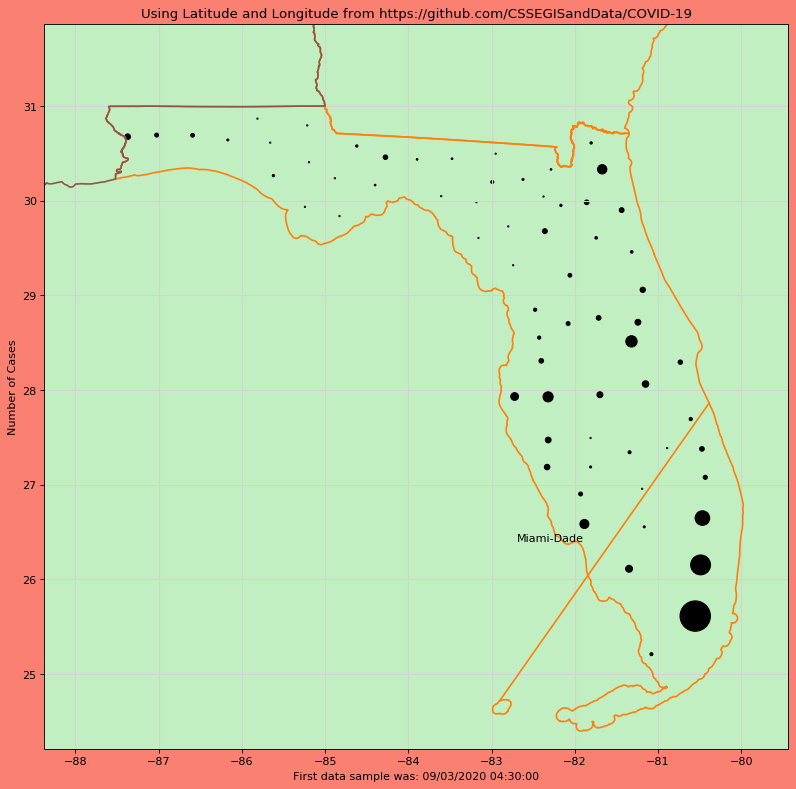

In [127]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import numpy as np
sf = shp.Reader("ShapeFiles/tl_2010_us_state10")
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv"


DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
#STate = input("What State? ")
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")

    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON

print("len(LA)",len(LA))
print("len(LO)",len(LO))
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)
print ("max(LT)",max(LT))
print ("min(LT)",min(LT))
print ('max(LG)',max(LG))
print ('min(LG)',min(LG))
print('len(LT)',len(LT))
print('len(LG)',len(LG))

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

print (min(LG))
print (max(LG))
print (min(LT))
print (max(LT))


A= (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

ax = fig.gca()
T= 'Miami-Dade'
text(0.68, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)

plt.axis([A,B,C,D])
#plt.axis([-80,-90,40,45])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)
#plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
#text(20, 40, r'$\cos(2 \pi t) \exp(-t)$')
plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
DataIn = open(LASTFILE).readlines()
cases=[]
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            cases.append(line[End])        

# Using Data from Two Files:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv<br />
<b>Using Latitude and Longitude from:<br />https://github.com/CSSEGISandData/COVID-19<br />Black is Confirmed Cases and the Red are Deaths</b>

Number of Cities:  88
Total Deaths:  1969
88
88
-80.74830218
-84.64787018
38.59743452
41.70860332
images/Ohio_Tue_26_May_2020_04_09_50_AM_GMT.png


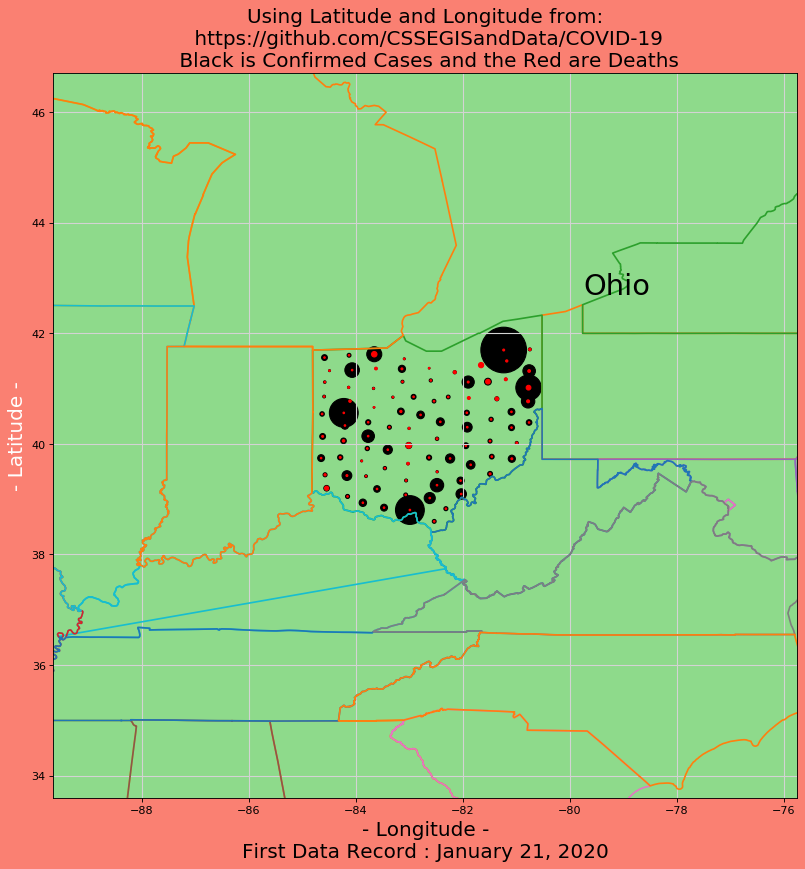

In [128]:
from matplotlib.pyplot import text
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
import time
import shapefile as shp  # Requires the pyshp package


sf = shp.Reader("ShapeFiles/tl_2010_us_state10")


LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
DataIn = open(LASTFILE).readlines()
cases=[]
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            cases.append(line[End])        

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
deaths=[]
TEXT=[]
cnt = -1
Total=0
SEARCH = "Ohio"
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and SEARCH in line[6] and "0.0" not in line:
            #if cnt>=1:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            deaths.append(line[End])        
            text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

DA = np.array(deaths,dtype=np.int)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-5
B = (max(LG))+5
C = (min(LT))-5
D = (max(LT))+5

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

Sd=1
Sized=[]
for xd in deaths:
    Sd=2+(float(xd)*.1)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

S=1
Size=[]
for x in cases:
    S=2+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)


plt.text(max(LG)+1,max(LT)+1, SEARCH, fontsize=26)
#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)




ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.scatter(LG, LT, s=sd, color="red")
plt.grid(True)

plt.xlabel('- Longitude -\nFirst Data Record : January 21, 2020', fontsize=18)
plt.title('Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths', fontsize=18)
plt.ylabel('- Latitude -', fontsize=18, color="white")
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
from PIL import Image
IM = Image.open(filename)
print(IM.size)
IM

In [112]:
!ls ShapeFiles

st99_d00.dbf	      state_bounds.prj	      tl_2010_us_state10.prj
st99_d00.shp	      state_bounds.qix	      tl_2010_us_state10.shp
st99_d00.shx	      state_bounds.sbn	      tl_2010_us_state10.shp.xml
state_bounds.dbf      state_bounds.sbx	      tl_2010_us_state10.shx
state_boundsfaq.htm   state_bounds.shp	      tl_2010_us_state10.source
state_bounds.gif      state_bounds.shp.xml    UScounties.zip
state_boundsmeta.htm  state_bounds.shx
state_boundsmeta.txt  tl_2010_us_state10.dbf
